# Kwanza Tukule Data Analyst Assessment

### **Project prepared by Caleb Omariba**

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [1]:
# Install libraries
# !pip install skimpy

In [2]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

### Loading Data

In [3]:
# Load DataFrame
file = 'Case Study Data - Read Only - case_study_data_2025-01-16T06_49_12.19881Z.csv'
df = pd.read_csv(file)

### Basic Data Exploration

In [4]:
# Show rows and columns count
print(f"Rows count: {df.shape[0]}\nColumns count: {df.shape[1]}")

Rows count: 333405
Columns count: 7


In [5]:
df.head()

DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   
2  August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3  August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4  August 18, 2024, 9:32 PM        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0       Business-de42       Location-1ba8         1        850  
1       Business-de42       Location-1ba8         2      1,910  
2       Business-de42       Location-1ba8         1      3,670  
3       Business-de42       Location-1ba8         1      2,605  
4       Business-de42       Location-1ba8         5      1,480

In [6]:
df.tail()

DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
333400   January 9, 2024, 8:49 PM        Category-119       Product-e98d   
333401   August 20, 2024, 8:24 PM        Category-106       Product-21f4   
333402   August 20, 2024, 8:24 PM         Category-76       Product-6e9c   
333403  October 10, 2024, 6:19 PM         Category-91       Product-523e   
333404  October 10, 2024, 6:19 PM         Category-75       Product-b31e   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
333400       Business-f9ff       Location-1979         1      1,770  
333401       Business-72bc       Location-689f         1        850  
333402       Business-72bc       Location-689f         1      2,575  
333403       Business-2693       Location-b27b         1      1,520  
333404       Business-2693       Location-b27b         1      4,420

#### Check Data Types

In [7]:
# Show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


### Insights from DataFrame Description

#### Dataset Size:
- **Entries**: There are 333,405 entries, indicating a substantial dataset suitable for large-scale analysis.

#### Column Analysis:
- **Number of Columns**: The dataset contains 7 columns, suggesting a relatively focused dataset with specific attributes for each entry.

#### Data Types:
- **Object**:
  - **DATE** is stored as a string rather than a datetime object, which might require conversion for time-based analysis.
  - **ANONYMIZED CATEGORY**, **ANONYMIZED PRODUCT**, **ANONYMIZED BUSINESS**, and **ANONYMIZED LOCATION** are categorical variables, likely representing different classifications or identifiers.
  - **UNIT PRICE** is also an object, which is unusual as prices are typically numeric. This might indicate that prices are stored with currency symbols or other non-numeric characters, or there might be missing values formatted as strings.

- **Int64**:
  - Only **QUANTITY** is numeric (integer), suggesting it's directly usable for numerical analysis like summing or averaging quantities sold.

#### Data Completeness:
- **Non-Null Counts**: All columns except **UNIT PRICE** have 333,405 non-null entries, which means no missing data for most columns. 
  - **UNIT PRICE** has 8 missing entries (333,405 total - 333,397 non-null), which is a very small percentage of missing data (about 0.0024%), but still worth noting for data cleaning or imputation.

#### Data Anonymization:
- The columns named with "ANONYMIZED" suggest that sensitive information has been obscured for privacy, which is good for data sharing but might require additional mapping or decoding for in-depth analysis specific to those categories, products, businesses, or locations.

#### Potential Issues and Considerations:
- **Date Conversion**: Converting the **DATE** column to a datetime type for time series analysis would be beneficial.
- **Price Handling**: The **UNIT PRICE** column being of object type needs attention. It might need cleaning or conversion to a numeric type for accurate financial analysis.
- **Categorical Analysis**: Given the high number of entries, analyzing the distribution and frequency of categories, products, businesses, and locations could reveal patterns in sales, preferences, or market trends.

#### Initial EDA Steps:
- Investigate the structure of the **UNIT PRICE** column to understand why it's not numeric and clean it accordingly.
- Look into the diversity and distribution of the anonymized categories to see if there are dominant players or products.
- Explore temporal trends by converting the **DATE** to a datetime object.

These insights provide a starting point for deeper exploratory data analysis, data cleaning, and preparation for more complex analyses or modeling tasks.

#### Check Missing Data

In [8]:
# Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
UNIT PRICE   0.002
dtype: float64


#### Check for Duplicate Rows

In [9]:
# Show number of duplicated rows
print(f"No. of entirely duplicated rows: {df.duplicated().sum()}")

# Show duplicated rows
df[df.duplicated()]

No. of entirely duplicated rows: 3524


DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
6153    January 6, 2024, 11:52 AM         Category-91       Product-1b48   
7554        July 9, 2024, 2:26 PM        Category-104       Product-af50   
7555        July 9, 2024, 2:26 PM         Category-92       Product-d09a   
12238     April 19, 2024, 3:19 PM         Category-75       Product-086d   
12239     April 19, 2024, 3:19 PM        Category-106       Product-21f4   
...                           ...                 ...                ...   
333133  February 1, 2024, 9:17 AM        Category-111       Product-7fac   
333134  February 1, 2024, 9:17 AM         Category-77       Product-d09c   
333350    June 10, 2024, 10:08 PM         Category-76       Product-e805   
333399   January 9, 2024, 8:49 PM         Category-97       Product-bbdc   
333400   January 9, 2024, 8:49 PM        Category-119       Product-e98d   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
6153         Business-20fc       Location-b125         1      3,680  
7554         Business-476c       Location-b27b         1      1,310  
7555         Business-476c       Location-b27b         1      1,550  
12238        Business-b48e       Location-03fc         3      2,090  
12239        Business-b48e       Location-03fc         2        850  
...                    ...                 ...       ...        ...  
333133       Business-4919       Location-3e32         3        814  
333134       Business-4919       Location-3e32         1      3,200  
333350       Business-54ad       Location-3e32         5      5,965  
333399       Business-f9ff       Location-1979         1        341  
333400       Business-f9ff       Location-1979         1      1,770  

[3524 rows x 7 columns]

### Interpretation of the Output:

- **Number of Duplicated Rows**: There are 3,524 entirely duplicated rows the dataset. This means there are 3,524 entries where all columns match another row's values exactly.
- **Display of Duplicated Rows**: The output shows a sample of these duplicated rows. This shows that the duplicates include the same date, category, product, business, location, quantity, and unit price. This suggests that these entries might be recording the same transaction more than once.

#### Insights from the output above:

- **Data Integrity Issue**: The presence of duplicates indicates potential issues with data integrity or entry errors where the same transaction or event has been logged multiple times.

- **Impact on Analysis**: 
  - **Statistical Bias**: Duplicate entries can skew statistical measures like means, medians, and totals, especially if one is looking at quantities sold or revenue.
  - **Redundancy**: They might unnecessarily inflate the dataset size, affecting memory usage and processing time.

- **Nature of Duplicates**: 
  - The duplicates are not limited to a specific category, product, or time, suggesting this might be a systemic issue rather than isolated to certain data points or times.

- **Data Quality**: This highlights a need for better data collection or data entry processes if this dataset is to be used for critical analysis or decision-making.

#### Check Uniqueness of Data

In [10]:
# Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
ANONYMIZED CATEGORY   2.174
ANONYMIZED LOCATION   1.887
QUANTITY              1.266
ANONYMIZED PRODUCT    0.122
UNIT PRICE            0.095
ANONYMIZED BUSINESS   0.021
DATE                  0.001
dtype: float64


#### Check Data Range

In [11]:
# Print summary statistics
df.describe(include='all')
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 333405 │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column        ┃ NA   ┃ NA %    ┃ mean      ┃ sd       ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ QUANTITY      │    0 │       0 │     2.321 │    3.791 │    0 │      1 │     1 │     2 │     359 │    █     │  │
│ └───────────────┴──────┴─────────┴───────────┴──────────┴──────┴────────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ DATE      │  0 │         0 │ May 5,   │ September │ April 1, │ September │       24 │         5 │  1667025 │  │
│ │           │    │           │ 2024,    │ 16, 2024, │ 2024,    │ 9, 2024,  │          │           │          │  │
│ │           │    │           │ 8:25 PM  │ 10:10 PM  │ 10:07 PM │ 9:59 PM   │          │           │          │  │
│ │ ANONYMIZE │  0 │         0 │ Category │ Category- │ Category │ Category- │     11.5 │         1 │   333405 │  │
│ │ D         │    │           │ -76      │ 106       │ -100     │ 99        │          │           │          │  │
│ │ CATEGORY  │    │           │          │           │          │           │          │           │          │  │
│ │ ANONYMIZE │  0 │         0 │ Product- │ Product-2 │ Product- │ Product-f │       12 │         1 │   333405 │  │
│ │ D PRODUCT │    │           │ 21f4     │ 1f4       │ 0001     │ fb7       │          │           │          │  │
│ │ ANONYMIZE │  0 │         0 │ Business │ Business- │ Business │ Business- │       13 │         1 │   333405 │  │
│ │ D         │    │           │ -de42    │ de42      │ -0000    │ ffff      │          │           │          │  │
│ │ BUSINESS  │    │           │          │           │          │           │          │           │          │  │
│ │ ANONYMIZE │  0 │         0 │ Location │ Location- │ Location │ Location- │       13 │         1 │   333405 │  │
│ │ D         │    │           │ -1ba8    │ 1ba8      │ -006f    │ ffe5      │          │           │          │  │
│ │ LOCATION  │    │           │          │           │          │           │          │           │          │  │
│ │ UNIT      │  8 │ 0.0023994 │ 0        │ 10,920    │ 0        │ 995       │     4.67 │         1 │   333397 │  │
│ │ PRICE     │    │ 841109161 │          │           │ 

In [12]:
print("Data Types:\n", df.dtypes)

Data Types:
 DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


---

## Resolve Inconsistencies

In [13]:
# converintg date to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

/tmp/ipykernel_39414/3897183538.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


In [14]:
print(df['DATE'].unique())

<DatetimeArray>
['2024-08-18 21:32:00', '2024-08-06 19:36:00', '2024-06-23 19:37:00',
 '2024-11-25 16:42:00', '2024-09-06 08:42:00', '2024-10-27 21:05:00',
 '2024-09-05 19:48:00', '2024-05-23 20:22:00', '2024-09-27 21:33:00',
 '2024-02-02 16:27:00',
 ...
 '2024-05-28 13:39:00', '2024-05-28 15:27:00', '2024-09-25 08:10:00',
 '2024-04-28 15:34:00', '2024-02-25 19:53:00', '2024-04-03 20:20:00',
 '2024-12-02 21:20:00', '2024-03-15 17:31:00', '2024-03-15 20:04:00',
 '2024-11-13 13:59:00']
Length: 96703, dtype: datetime64[ns]


In [15]:
print(df['DATE'].head())  # Check if the conversion worked

0   2024-08-18 21:32:00
1   2024-08-18 21:32:00
2   2024-08-18 21:32:00
3   2024-08-18 21:32:00
4   2024-08-18 21:32:00
Name: DATE, dtype: datetime64[ns]


The DATE column is now have datetime dtype

## Feature Engineering


In [16]:
#Creating the Month-Year column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')
print(df[['DATE', 'Month-Year']].head())  # For my screenshot

                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [17]:
df.head()

DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE   Month-Year  
0       Business-de42       Location-1ba8         1        850  August 2024  
1       Business-de42       Location-1ba8         2      1,910  August 2024  
2       Business-de42       Location-1ba8         1      3,670  August 2024  
3       Business-de42       Location-1ba8         1      2,605  August 2024  
4       Business-de42       Location-1ba8         5      1,480  August 2024

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE                 333405 non-null  datetime64[ns]
 1   ANONYMIZED CATEGORY  333405 non-null  object        
 2   ANONYMIZED PRODUCT   333405 non-null  object        
 3   ANONYMIZED BUSINESS  333405 non-null  object        
 4   ANONYMIZED LOCATION  333405 non-null  object        
 5   QUANTITY             333405 non-null  int64         
 6   UNIT PRICE           333397 non-null  object        
 7   Month-Year           333405 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 20.3+ MB


## Data Preprocessing



- Renaming columns
- Drop Redundant Columns
- Changing Data Types
- Dropping Duplicates
- Handling Missing Values
- Handling Unreasonable Data Ranges
- Feature Transformation


### Rename Columns

In [19]:
# Rename columns to snake_case
df = clean_columns(df, replace={})

In [20]:
df.columns

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month_year'],
      dtype='object')

In [21]:
# Rename columns
columns_to_rename = {}
df.rename(columns=columns_to_rename, inplace=True)

In [22]:
# Verify columns are renamed
df.columns

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month_year'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 333405 non-null  datetime64[ns]
 1   anonymized_category  333405 non-null  object        
 2   anonymized_product   333405 non-null  object        
 3   anonymized_business  333405 non-null  object        
 4   anonymized_location  333405 non-null  object        
 5   quantity             333405 non-null  int64         
 6   unit_price           333397 non-null  object        
 7   month_year           333405 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 20.3+ MB


### Changing Data Types

In [24]:
print(df['unit_price'].dtype)
print(df['unit_price'].head())

object
0      850
1    1,910
2    3,670
3    2,605
4    1,480
Name: unit_price, dtype: object


In [25]:
print(df['unit_price'].isnull().sum())

8


In [26]:
df = df.dropna(subset=['unit_price'])

In [27]:
# Strip away any non-numeric characters like commas, dollar signs, or space
df['unit_price'] = df['unit_price'].str.replace(',', '').str.replace('$', '').str.strip()

In [28]:
# Convert to a numeric type, dealing with any issues that arise
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333397 entries, 0 to 333404
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 333397 non-null  datetime64[ns]
 1   anonymized_category  333397 non-null  object        
 2   anonymized_product   333397 non-null  object        
 3   anonymized_business  333397 non-null  object        
 4   anonymized_location  333397 non-null  object        
 5   quantity             333397 non-null  int64         
 6   unit_price           333397 non-null  int64         
 7   month_year           333397 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 22.9+ MB


### Dropping Duplicates

In [30]:
# Identify all duplicates, keeping all occurrences
duplicates = df[df.duplicated(keep=False)].sort_values(by=['date', 'anonymized_business'])

In [31]:
# Display the first few sets of duplicates
print(duplicates.groupby(['date', 'anonymized_business', 'anonymized_category', 'anonymized_product', 'anonymized_location']).head(5))

                      date anonymized_category anonymized_product  \
32907  2024-01-01 12:48:00         Category-91       Product-8ebc   
32908  2024-01-01 12:48:00        Category-111       Product-bdba   
244229 2024-01-01 12:48:00         Category-91       Product-8ebc   
244230 2024-01-01 12:48:00        Category-111       Product-bdba   
136821 2024-01-01 16:27:00         Category-75       Product-086d   
...                    ...                 ...                ...   
300785 2024-12-27 20:22:00        Category-119       Product-e98d   
57900  2024-12-29 19:41:00        Category-120       Product-83fd   
70174  2024-12-29 19:41:00        Category-120       Product-83fd   
138688 2024-12-31 11:29:00        Category-120       Product-4156   
278183 2024-12-31 11:29:00        Category-120       Product-4156   

       anonymized_business anonymized_location  quantity  unit_price  \
32907        Business-fef1       Location-3e32         1        1540   
32908        Business-fef1 

In [32]:
# For exact matches, where every column is the same
exact_duplicates = df[df.duplicated(keep=False, subset=df.columns)].sort_values(by=['date', 'anonymized_business'])
print(exact_duplicates.head(10))

                      date anonymized_category anonymized_product  \
32907  2024-01-01 12:48:00         Category-91       Product-8ebc   
32908  2024-01-01 12:48:00        Category-111       Product-bdba   
244229 2024-01-01 12:48:00         Category-91       Product-8ebc   
244230 2024-01-01 12:48:00        Category-111       Product-bdba   
136821 2024-01-01 16:27:00         Category-75       Product-086d   
136822 2024-01-01 16:27:00         Category-91       Product-1b48   
136823 2024-01-01 16:27:00         Category-77       Product-d09c   
136824 2024-01-01 16:27:00         Category-76       Product-e805   
304079 2024-01-01 16:27:00         Category-75       Product-086d   
304080 2024-01-01 16:27:00         Category-91       Product-1b48   

       anonymized_business anonymized_location  quantity  unit_price  \
32907        Business-fef1       Location-3e32         1        1540   
32908        Business-fef1       Location-3e32         1         577   
244229       Business-fe

In [33]:
exact_duplicates.shape

(5602, 8)

In [34]:
# Example for partial matches, where only some columns match
partial_duplicates = df[df.duplicated(keep=False, subset=['date', 'anonymized_business', 'anonymized_category', 'anonymized_product', 'anonymized_location'])]
partial_duplicates = partial_duplicates.sort_values(by=['date', 'anonymized_business'])
print(partial_duplicates[['date', 'anonymized_business', 'anonymized_category', 'anonymized_product', 'anonymized_location', 'quantity', 'unit_price']].head(10))

                      date anonymized_business anonymized_category  \
32907  2024-01-01 12:48:00       Business-fef1         Category-91   
32908  2024-01-01 12:48:00       Business-fef1        Category-111   
244229 2024-01-01 12:48:00       Business-fef1         Category-91   
244230 2024-01-01 12:48:00       Business-fef1        Category-111   
136821 2024-01-01 16:27:00       Business-fba5         Category-75   
136822 2024-01-01 16:27:00       Business-fba5         Category-91   
136823 2024-01-01 16:27:00       Business-fba5         Category-77   
136824 2024-01-01 16:27:00       Business-fba5         Category-76   
304079 2024-01-01 16:27:00       Business-fba5         Category-75   
304080 2024-01-01 16:27:00       Business-fba5         Category-91   

       anonymized_product anonymized_location  quantity  unit_price  
32907        Product-8ebc       Location-3e32         1        1540  
32908        Product-bdba       Location-3e32         1         577  
244229       Produc

In [35]:
partial_duplicates.shape

(5742, 8)

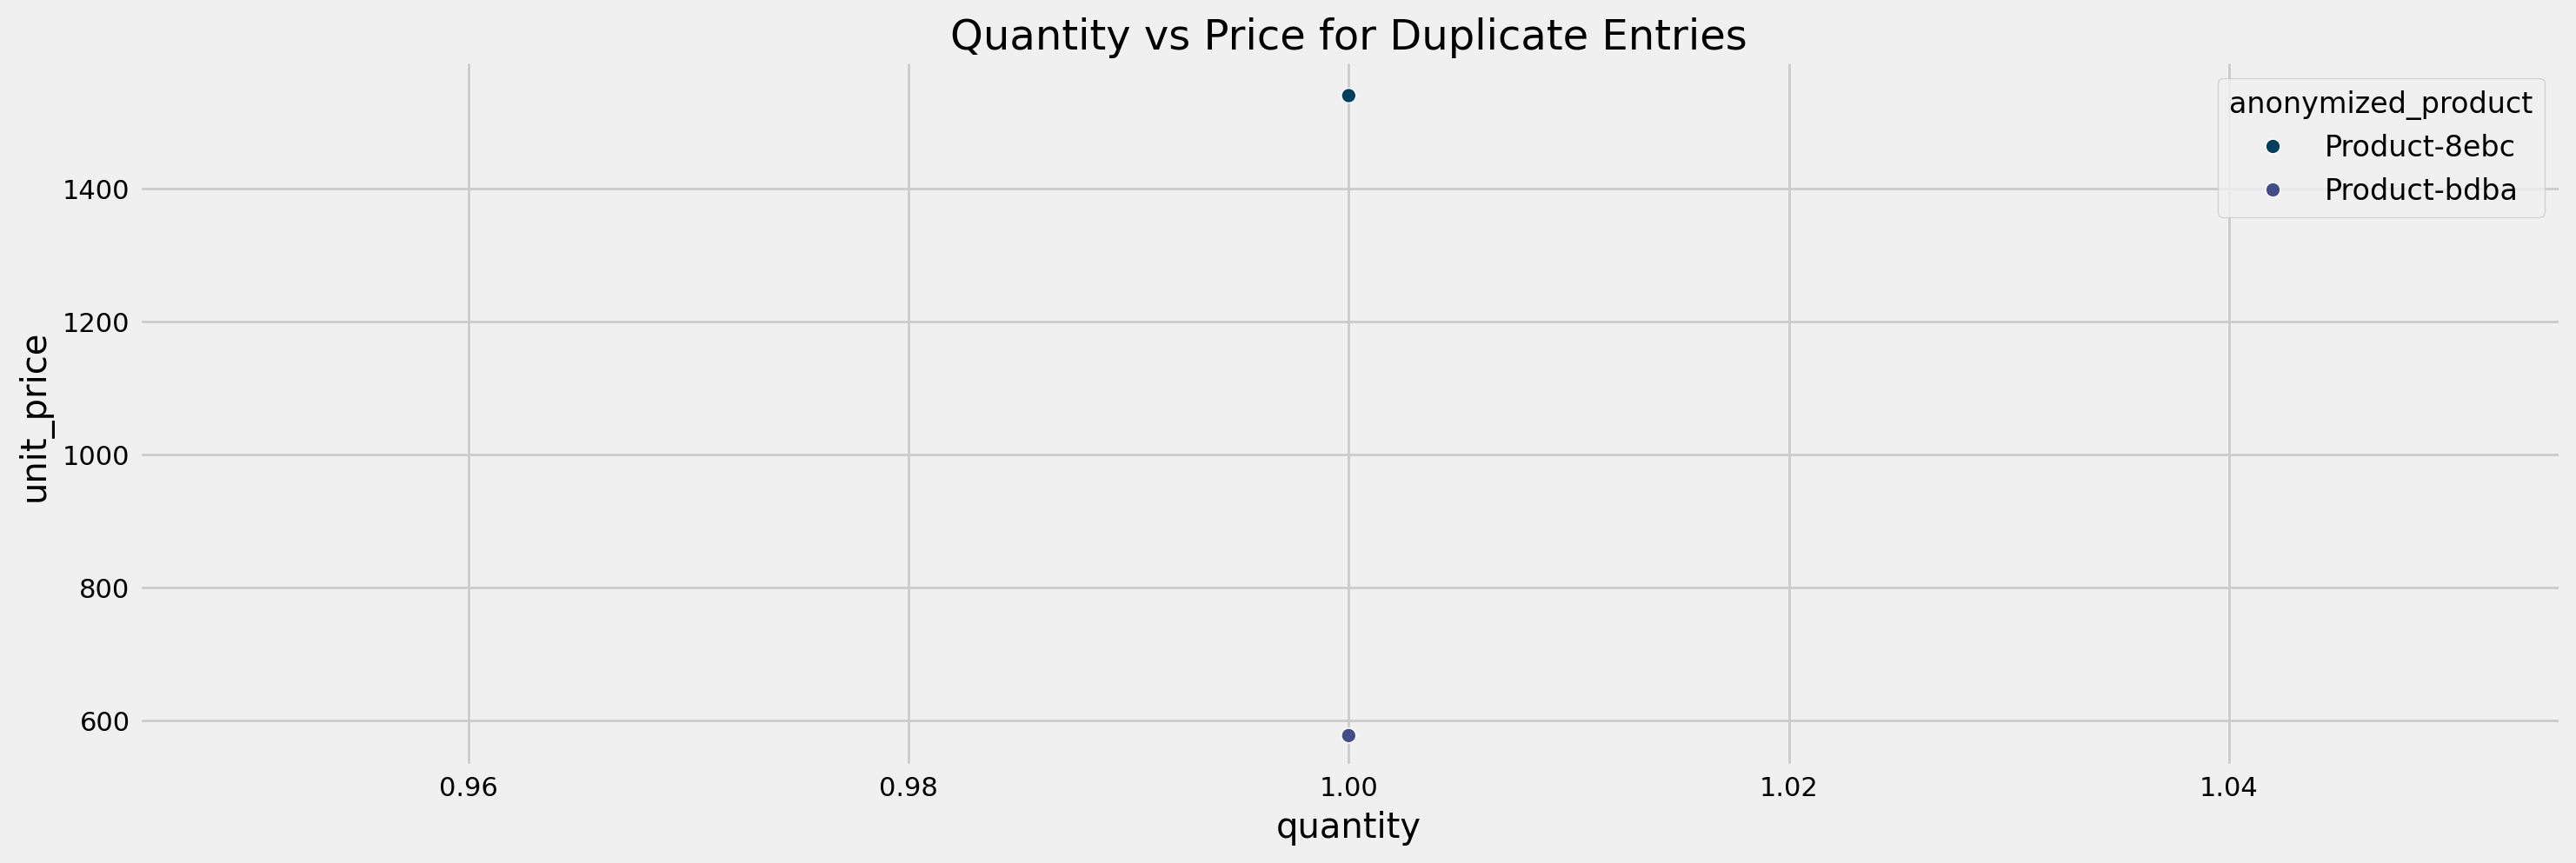

In [36]:
# Plotting quantity and price for duplicates on a specific date for a business
specific_duplicates = duplicates[(duplicates['date'] == '2024-01-01 12:48:00') & (duplicates['anonymized_business'] == 'Business-fef1')]
sns.scatterplot(data=specific_duplicates, x='quantity', y='unit_price', hue='anonymized_product')
plt.title('Quantity vs Price for Duplicate Entries')
plt.show()

In [37]:
# # Drop entirely duplicated rows
# df.drop_duplicates(inplace=True, ignore_index=True)

# Drop exact duplicates, keeping the first occurrence of each duplicate set
df_cleaned = df.drop_duplicates()

# If you want to keep the last occurrence instead:
# df_cleaned = df.drop_duplicates(keep='last')

# Display the number of rows before and after to confirm duplicates were removed
print(f"Number of rows before dropping duplicates: {len(df)}")
print(f"Number of rows after dropping duplicates: {len(df_cleaned)}")

Number of rows before dropping duplicates: 333397
Number of rows after dropping duplicates: 329873


In [38]:
# Verify rows dropped
assert df_cleaned.duplicated().sum() == 0

In [39]:
df_cleaned.shape

(329873, 8)

In [40]:
df_cleaned.head()

date anonymized_category anonymized_product  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  anonymized_business anonymized_location  quantity  unit_price   month_year  
0       Business-de42       Location-1ba8         1         850  August 2024  
1       Business-de42       Location-1ba8         2        1910  August 2024  
2       Business-de42       Location-1ba8         1        3670  August 2024  
3       Business-de42       Location-1ba8         1        2605  August 2024  
4       Business-de42       Location-1ba8         5        1480  August 2024

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329873 entries, 0 to 333404
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 329873 non-null  datetime64[ns]
 1   anonymized_category  329873 non-null  object        
 2   anonymized_product   329873 non-null  object        
 3   anonymized_business  329873 non-null  object        
 4   anonymized_location  329873 non-null  object        
 5   quantity             329873 non-null  int64         
 6   unit_price           329873 non-null  int64         
 7   month_year           329873 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 22.7+ MB


In [42]:

from ydata_profiling import ProfileReport

In [43]:
profile = ProfileReport(df_cleaned, title="Profile Report for Cleaned Data", explorative=True)

In [44]:
profile.to_widgets() 

/home/caleb/Projects/business-projects/kwanza-tukule/env/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

### Sales Overview:

Calculate total Quantity and Value grouped by:
- Anonymized Category
- Anonymized Business

In [45]:
# Code and visualization

# Calculate total value for each transaction
df_cleaned['total_value'] = df_cleaned['quantity'] * df['unit_price']

/tmp/ipykernel_39414/4000410302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_value'] = df_cleaned['quantity'] * df['unit_price']


In [46]:
df_cleaned.head()

date anonymized_category anonymized_product  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  anonymized_business anonymized_location  quantity  unit_price   month_year  \
0       Business-de42       Location-1ba8         1         850  August 2024   
1       Business-de42       Location-1ba8         2        1910  August 2024   
2       Business-de42       Location-1ba8         1        3670  August 2024   
3       Business-de42       Location-1ba8         1        2605  August 2024   
4       Business-de42       Location-1ba8         5        1480  August 2024   

   total_value  
0      850.000  
1    3,820.000  
2    3,670.000  
3    2,605.000  
4    7,400.000

In [47]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [48]:
df_cleaned = pd.read_csv('df_cleaned.csv')

### Grouping Data by Anonymized Category

Top Categories by Total Value:
                     total_quantity     total_value
anonymized_category                                
Category-75                  151330 544,658,700.000
Category-76                   71719 344,939,553.000
Category-120                 169715 319,178,743.000
Category-100                  76824 134,902,751.000
Category-119                  68332 103,454,819.000
Category-77                   28455  76,741,382.000
Category-91                   20853  44,152,103.000
Category-101                  19564  35,577,822.000
Category-85                   22997  33,762,533.000
Category-121                  14669  22,327,643.000


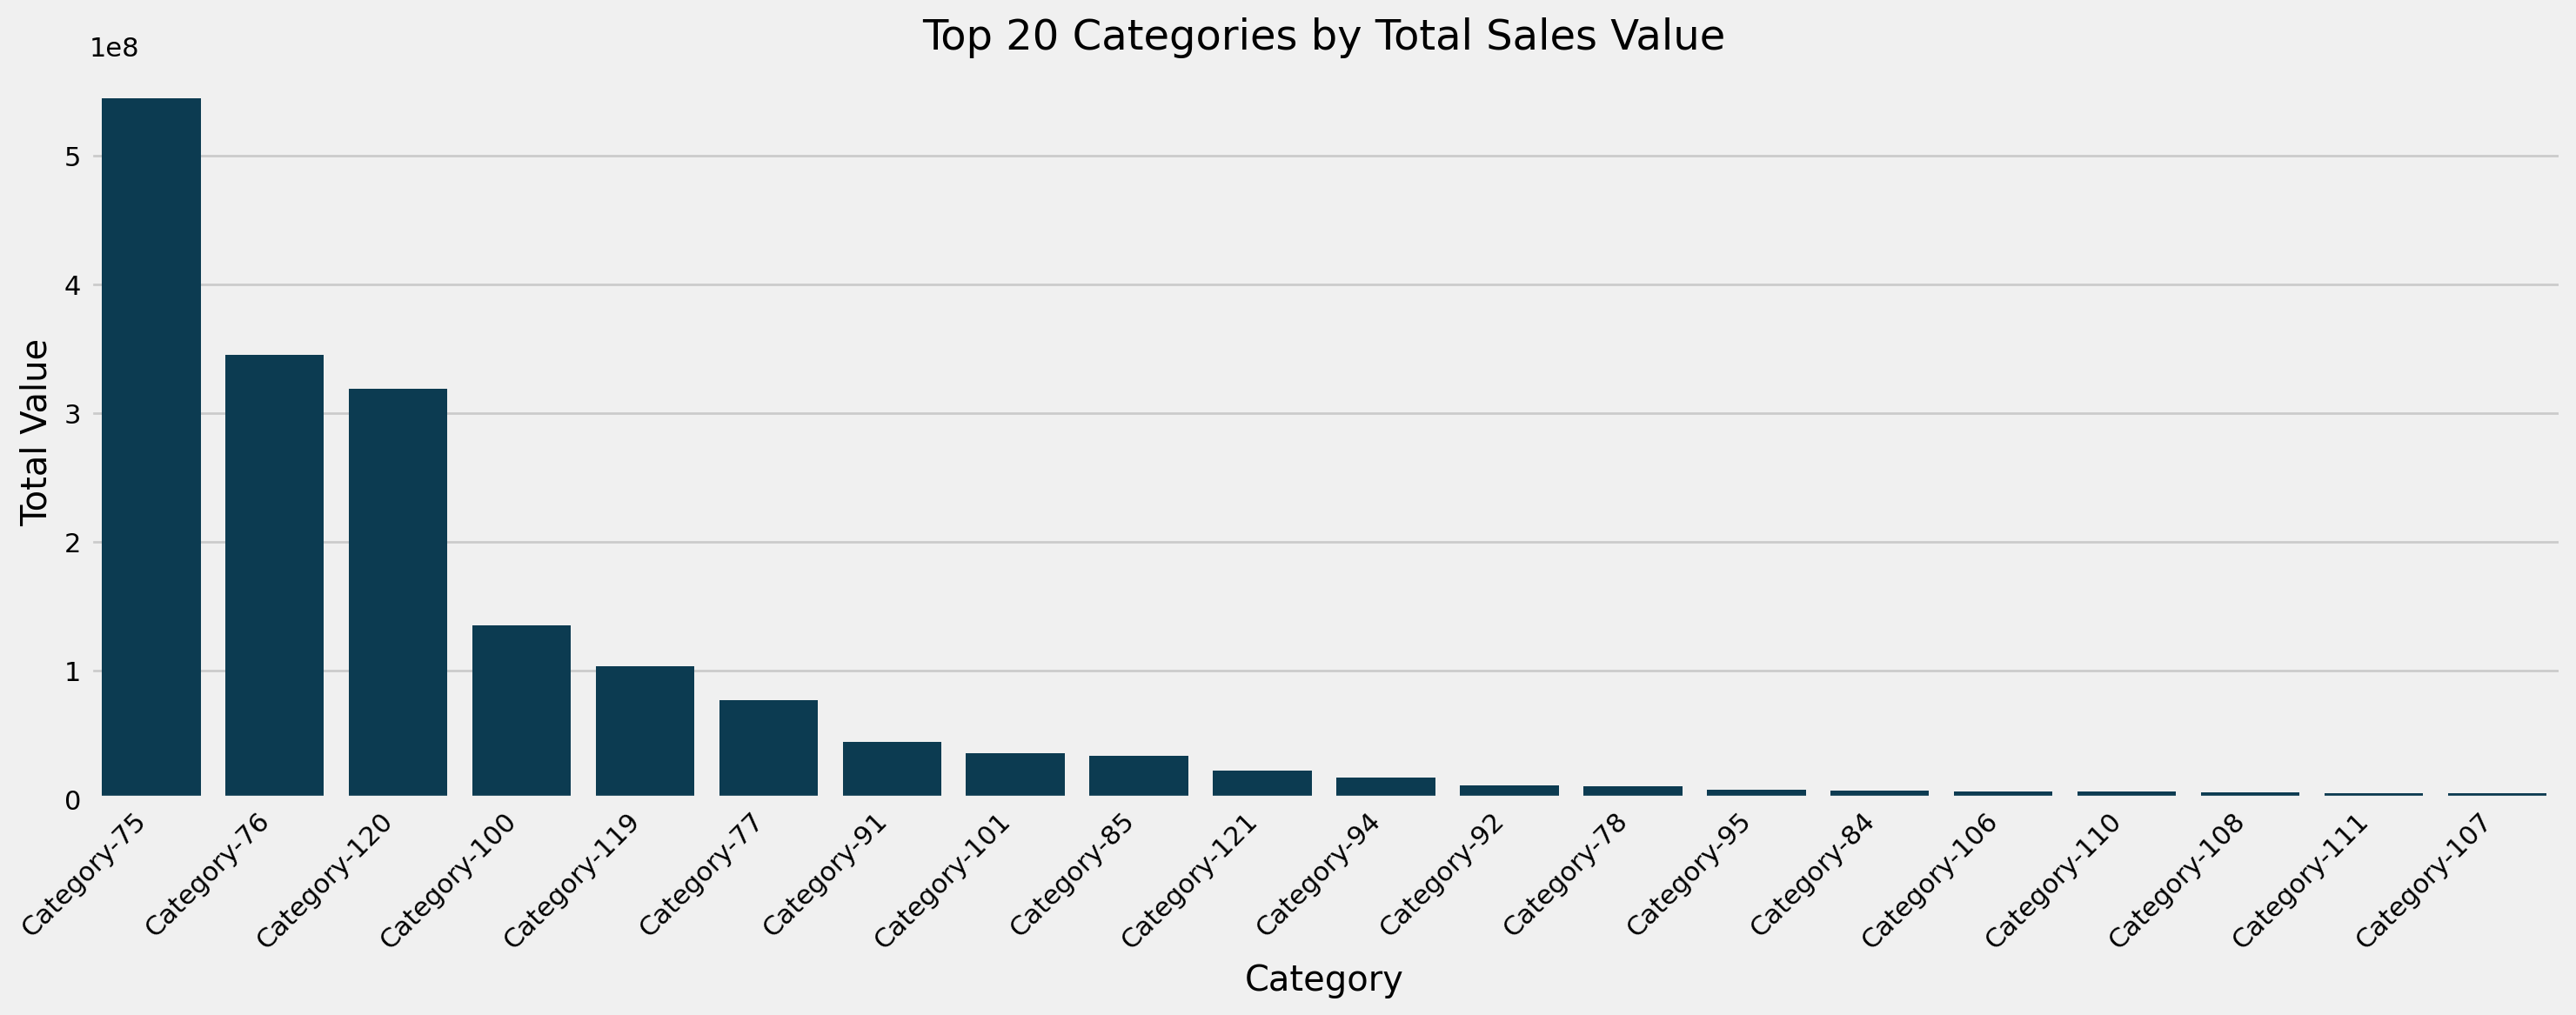

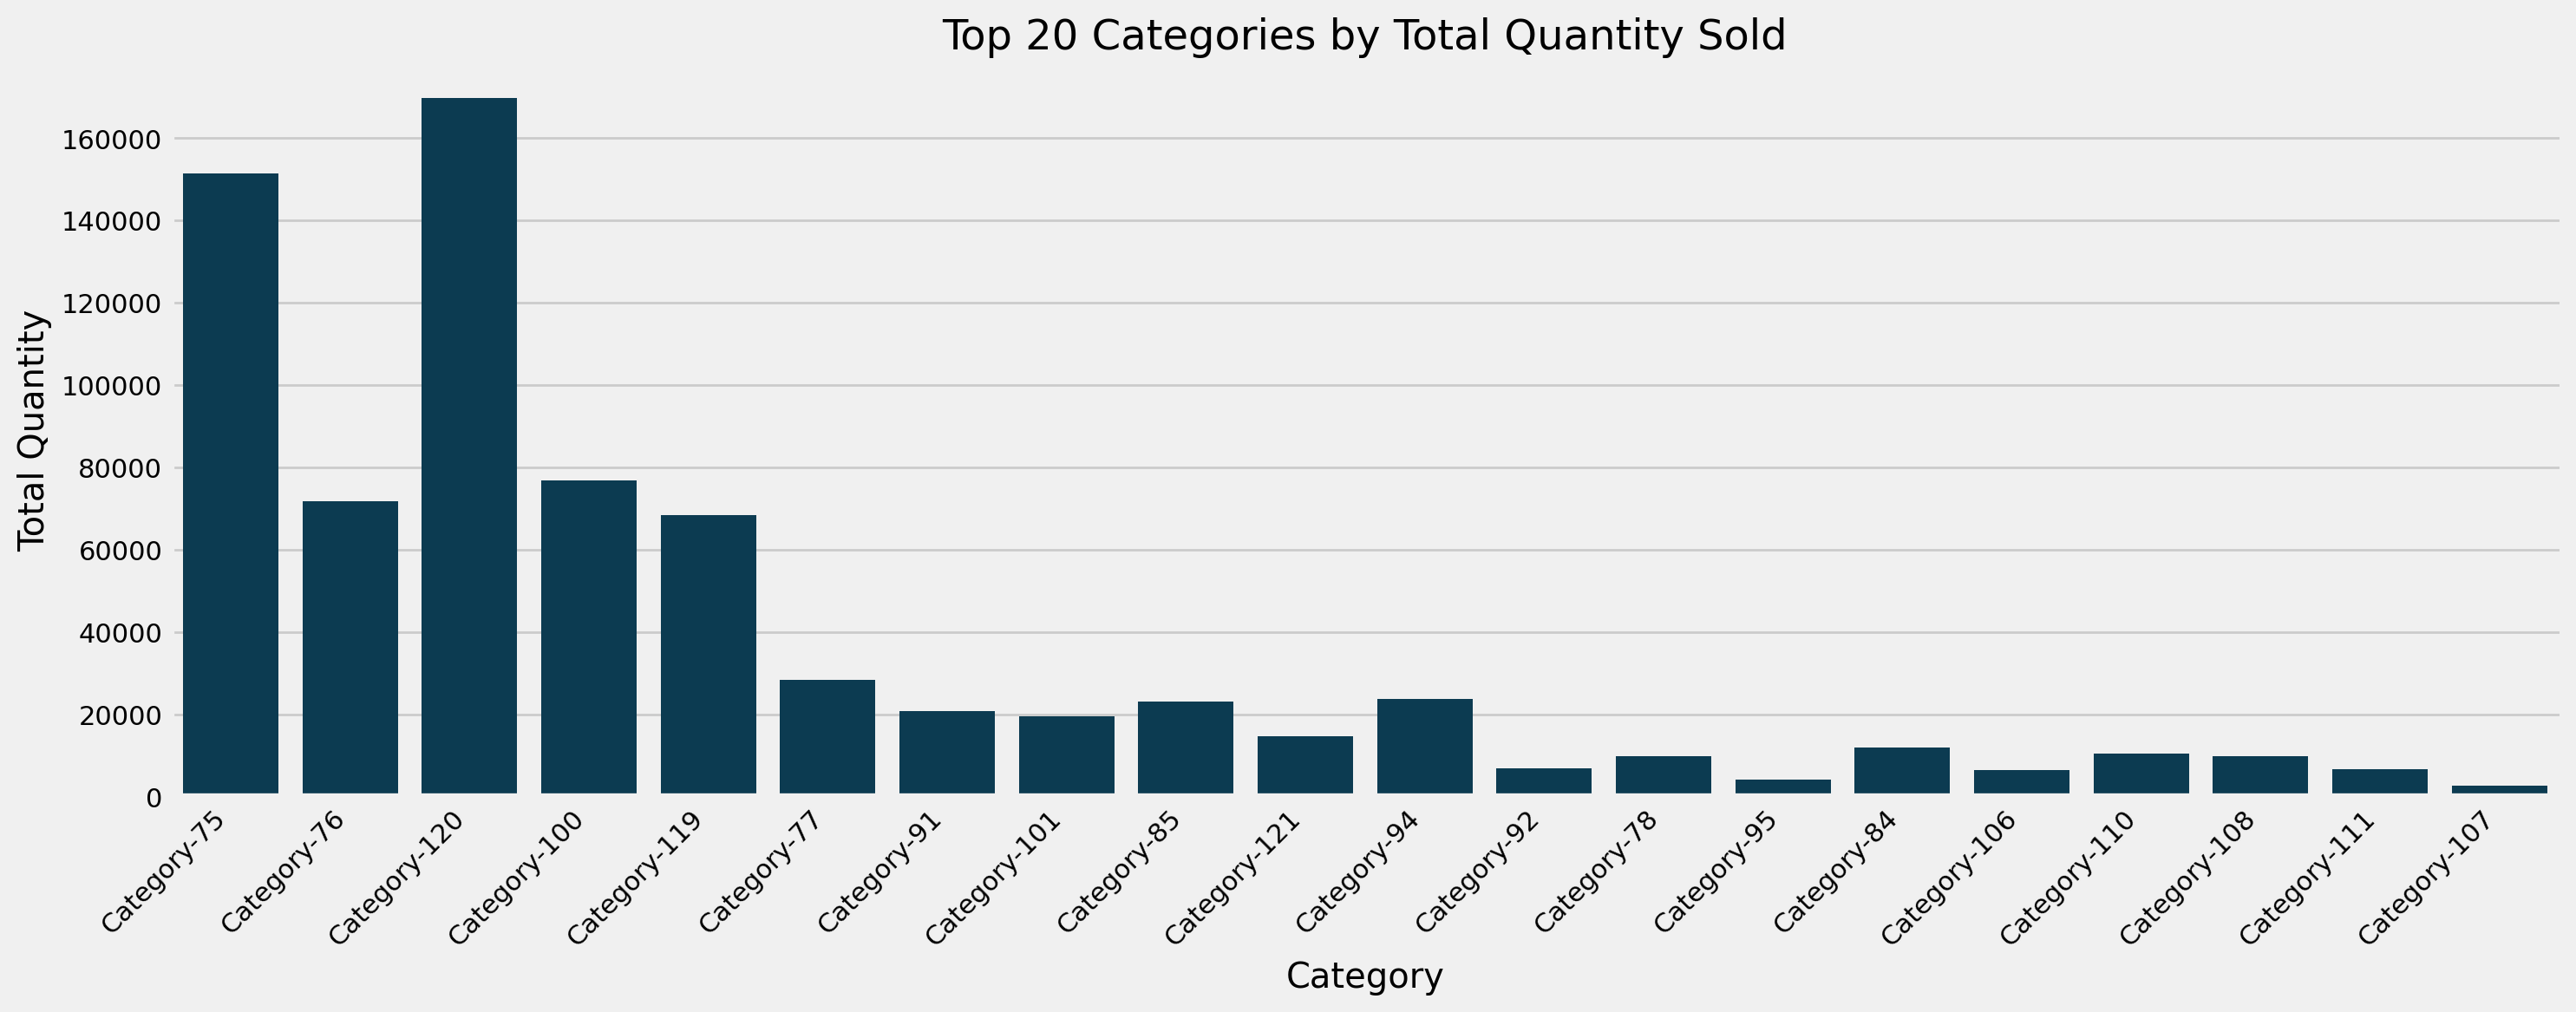

In [49]:

# Group by 'anonymized_category'
category_sales = df_cleaned.groupby('anonymized_category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).rename(columns={'quantity': 'total_quantity', 'total_value': 'total_value'})

# Sorting by total value to see   which categories generate the most revenue
category_sales_sorted = category_sales.sort_values('total_value', ascending=False)

# Displaying  top categories
print("Top Categories by Total Value:")
print(category_sales_sorted.head(10))

# Visualization
plt.figure(figsize=(15, 6))
sns.barplot(x=category_sales_sorted.index[:20], y='total_value', data=category_sales_sorted[:20])  # Top 20
plt.title('Top 20 Categories by Total Sales Value')
plt.xlabel('Category')
plt.ylabel('Total Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=category_sales_sorted.index[:20], y='total_quantity', data=category_sales_sorted[:20])
plt.title('Top 20 Categories by Total Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month_year'],
      dtype='object')

### Trends Over Time:
- Analyze sales trends (Value and Quantity) by Month-Year. 
- Create a time series plot to show seasonal patterns or changes in sales performance.

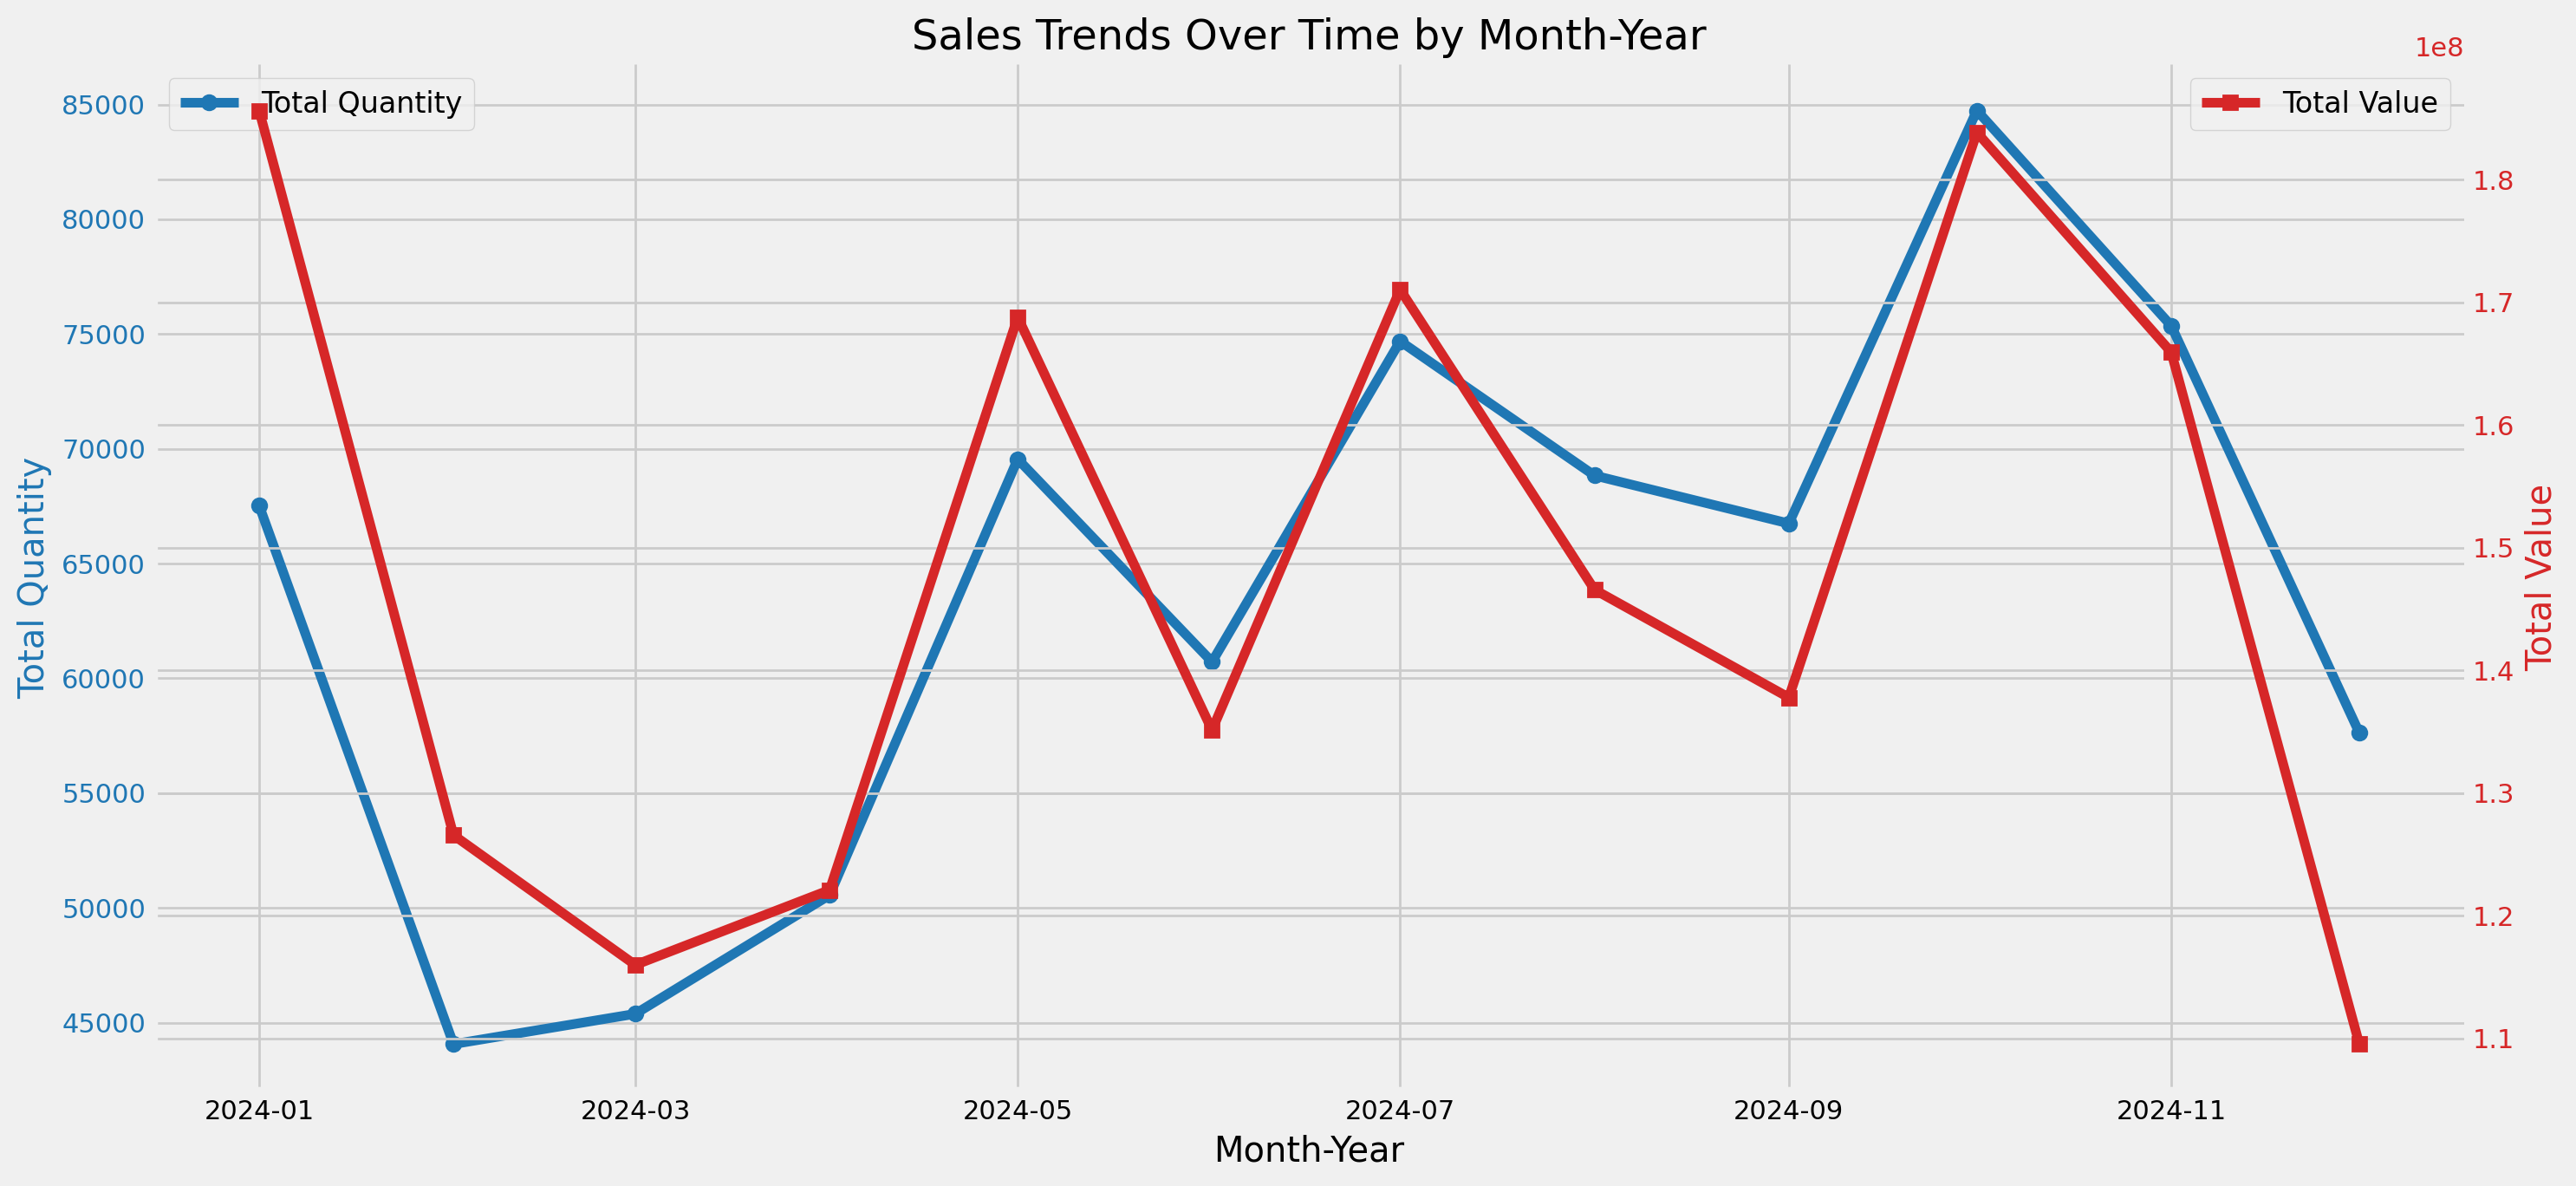

Seasonal Analysis by Month:
          month_year  total_quantity     total_value
month                                               
April     2024-04-01      50,554.000 122,110,750.000
August    2024-08-01      68,837.000 146,581,003.000
December  2024-12-01      57,626.000 109,549,774.000
February  2024-02-01      44,063.000 126,579,702.000
January   2024-01-01      67,526.000 185,626,186.000
July      2024-07-01      74,689.000 171,040,881.000
June      2024-06-01      60,716.000 135,138,614.000
March     2024-03-01      45,381.000 116,000,676.000
May       2024-05-01      69,551.000 168,781,502.000
November  2024-11-01      75,361.000 165,933,104.000
October   2024-10-01      84,739.000 183,840,551.000
September 2024-09-01      66,747.000 137,791,455.000


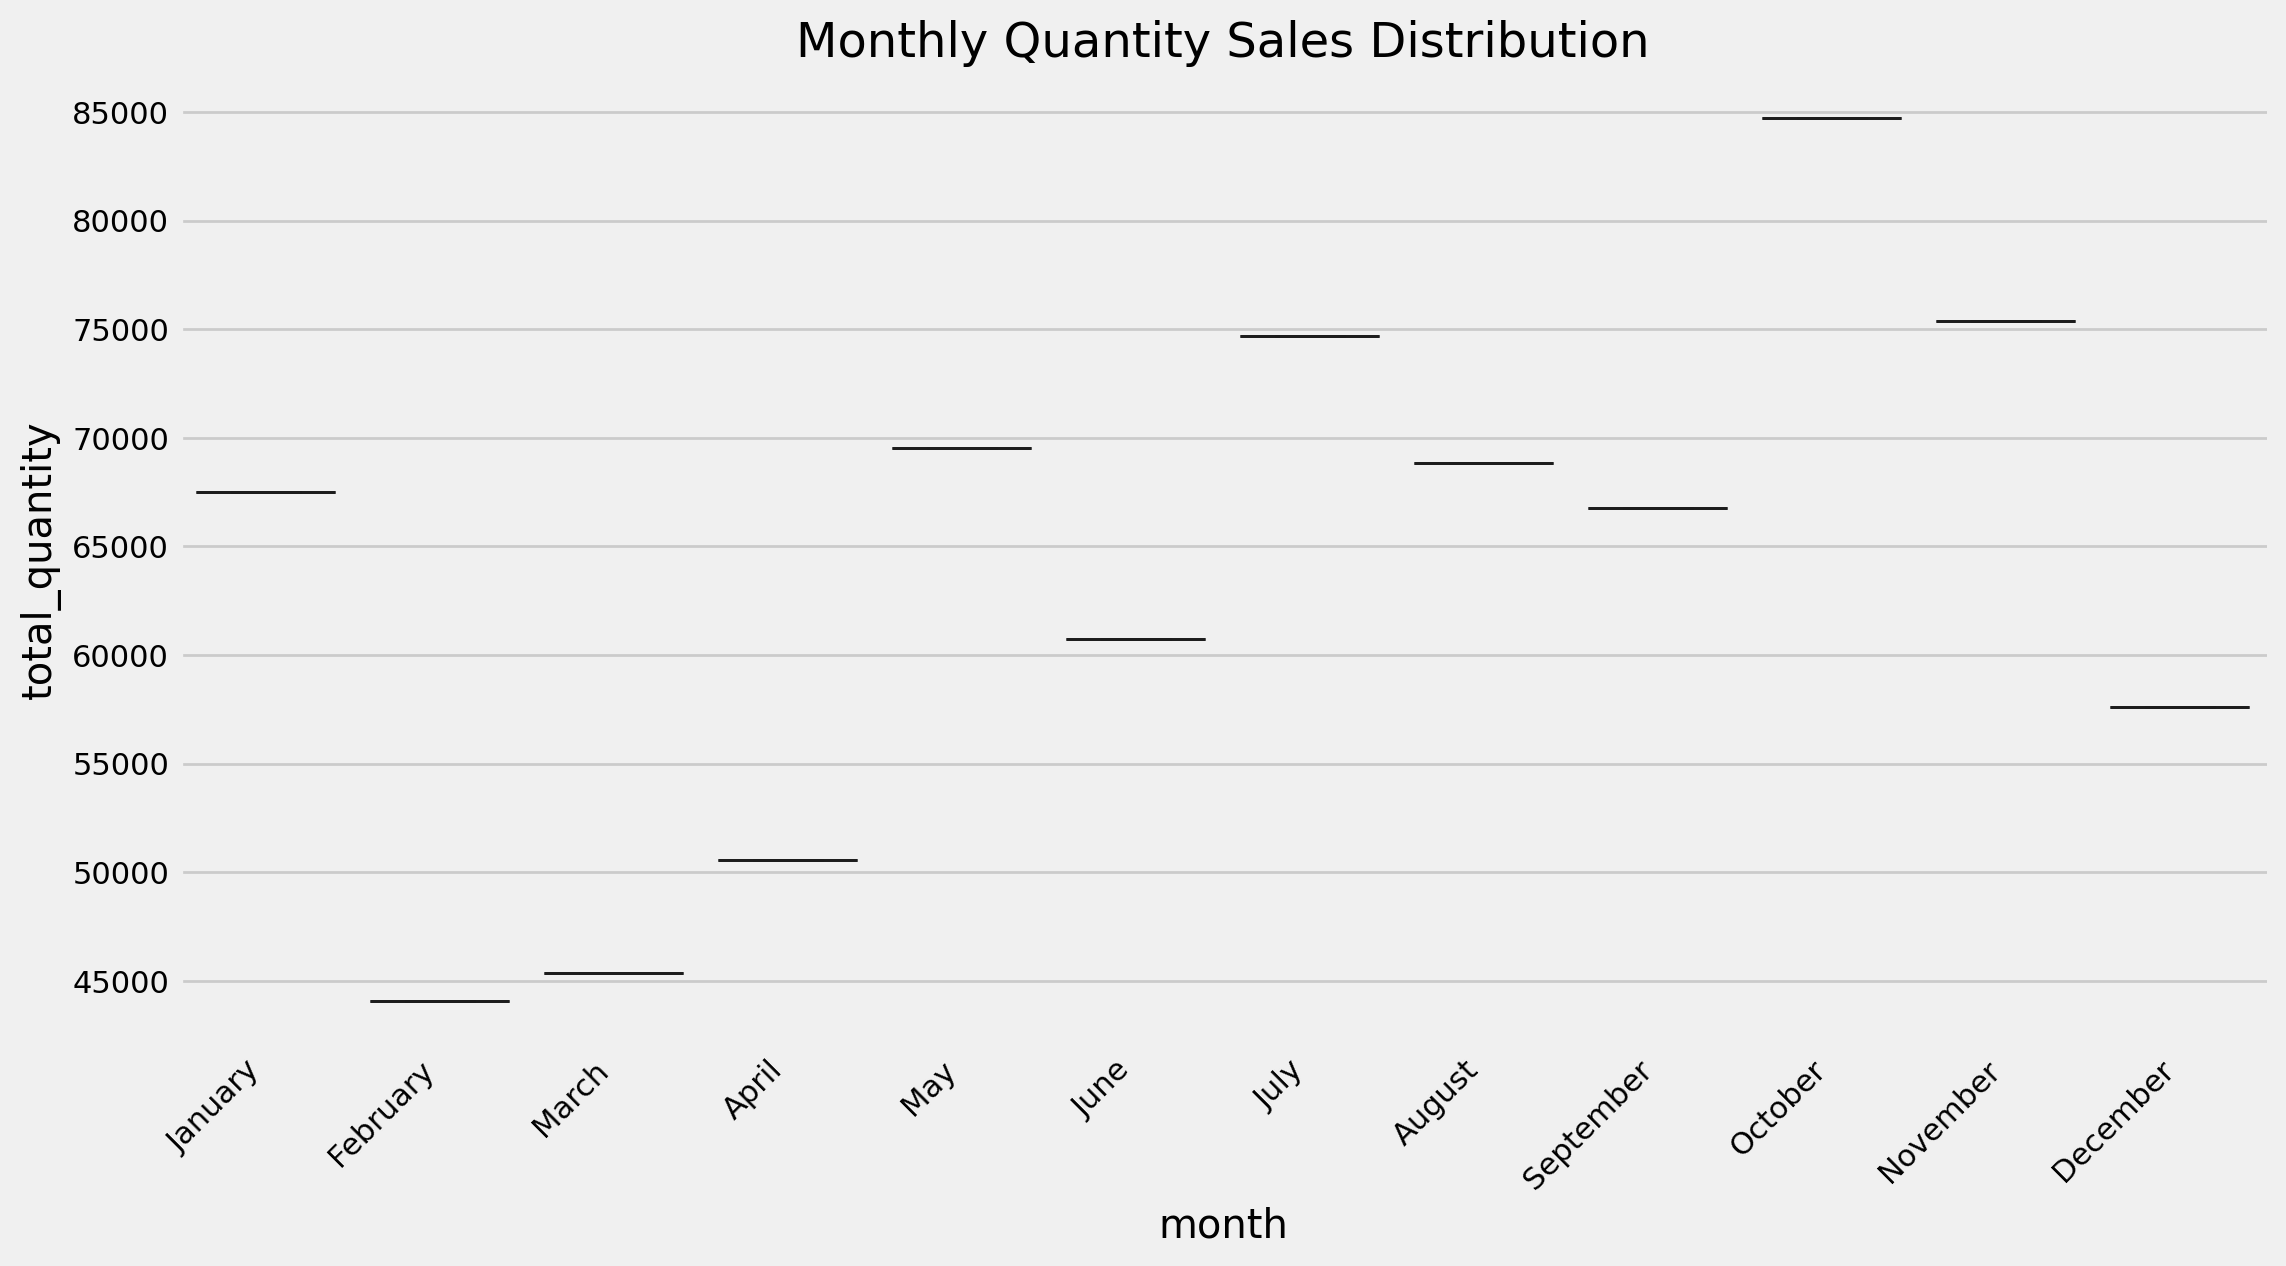

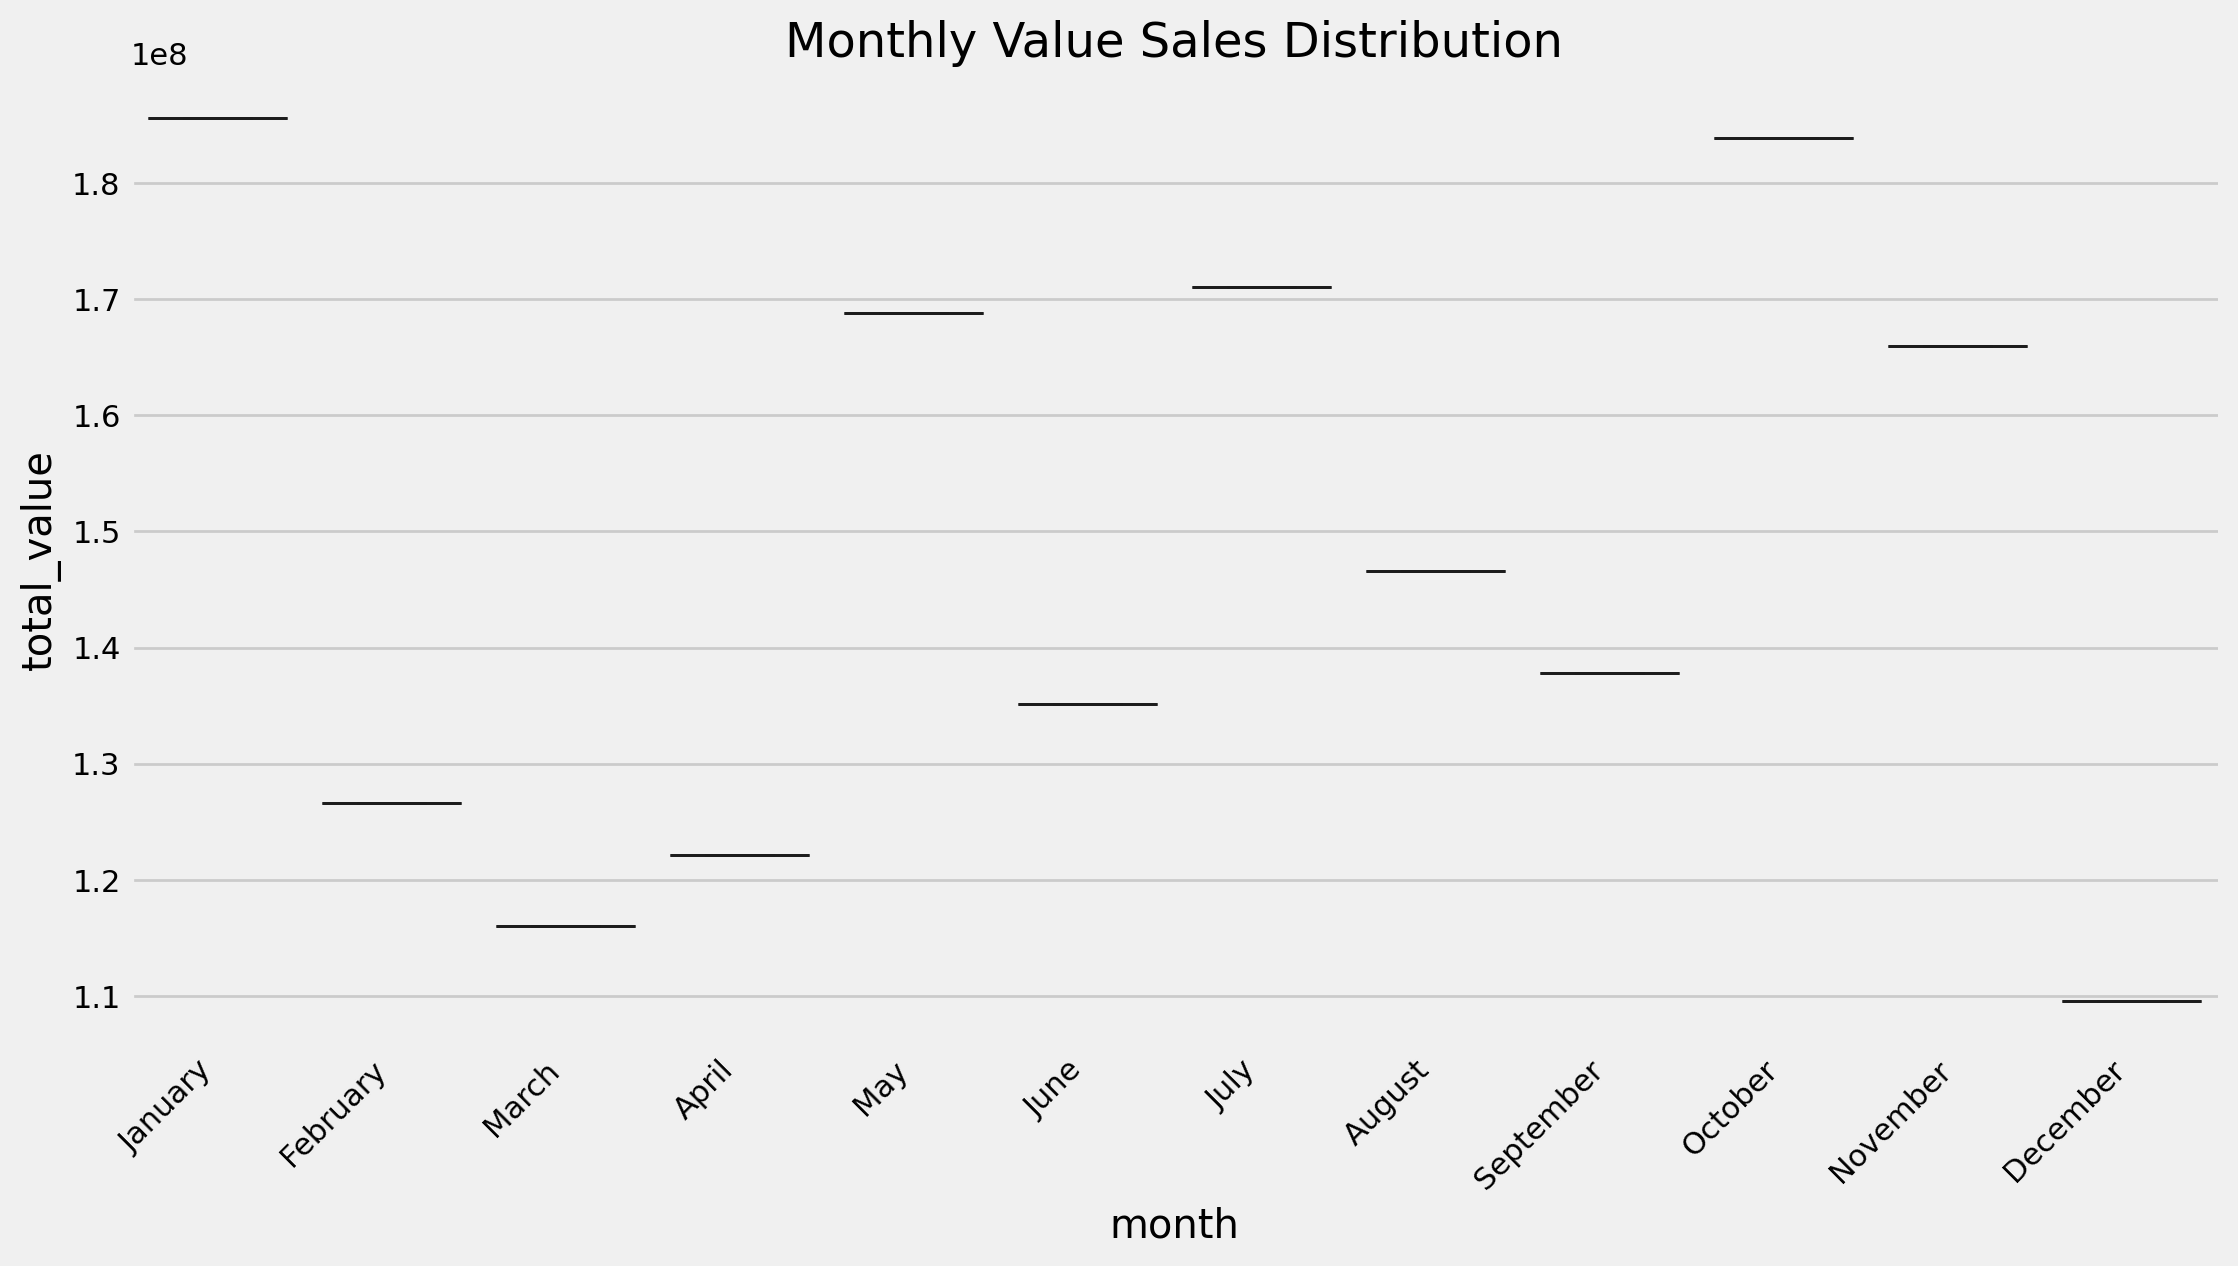

In [51]:

# Ensure 'date' is in datetime format
# df['date'] = pd.to_datetime(df['date'])

# Calculate total value for each transaction
# df_cleaned['total_value'] = df_cleaned['quantity'] * df_cleaned['unit_price']

# Group by 'month_year' to get monthly totals
monthly_sales = df_cleaned.groupby('month_year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).rename(columns={'quantity': 'total_quantity', 'total_value': 'total_value'})

# Ensure 'month_year' is in the correct order for plotting
monthly_sales = monthly_sales.reset_index()
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('month_year')

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Quantity on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Quantity', color=color)
ax1.plot(monthly_sales['month_year'], monthly_sales['total_quantity'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for Total Value
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Value', color=color)  
ax2.plot(monthly_sales['month_year'], monthly_sales['total_value'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Sales Trends Over Time by Month-Year')
fig.tight_layout()  # adjust the layout so that everything fits without overlapping

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend 
ax1.legend(['Total Quantity'], loc='upper left')
ax2.legend(['Total Value'], loc='upper right')

# Show the plot
plt.show()

# Analysis of  seasonal patterns more deeply:
print("Seasonal Analysis by Month:")
monthly_sales['month'] = monthly_sales['month_year'].dt.month_name()
monthly_patterns = monthly_sales.groupby('month').mean()
print(monthly_patterns)

# visualize seasonal patterns:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='total_quantity', data=monthly_sales)
plt.title('Monthly Quantity Sales Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='total_value', data=monthly_sales)
plt.title('Monthly Value Sales Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
df_cleaned.columns

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month_year', 'total_value'],
      dtype='object')

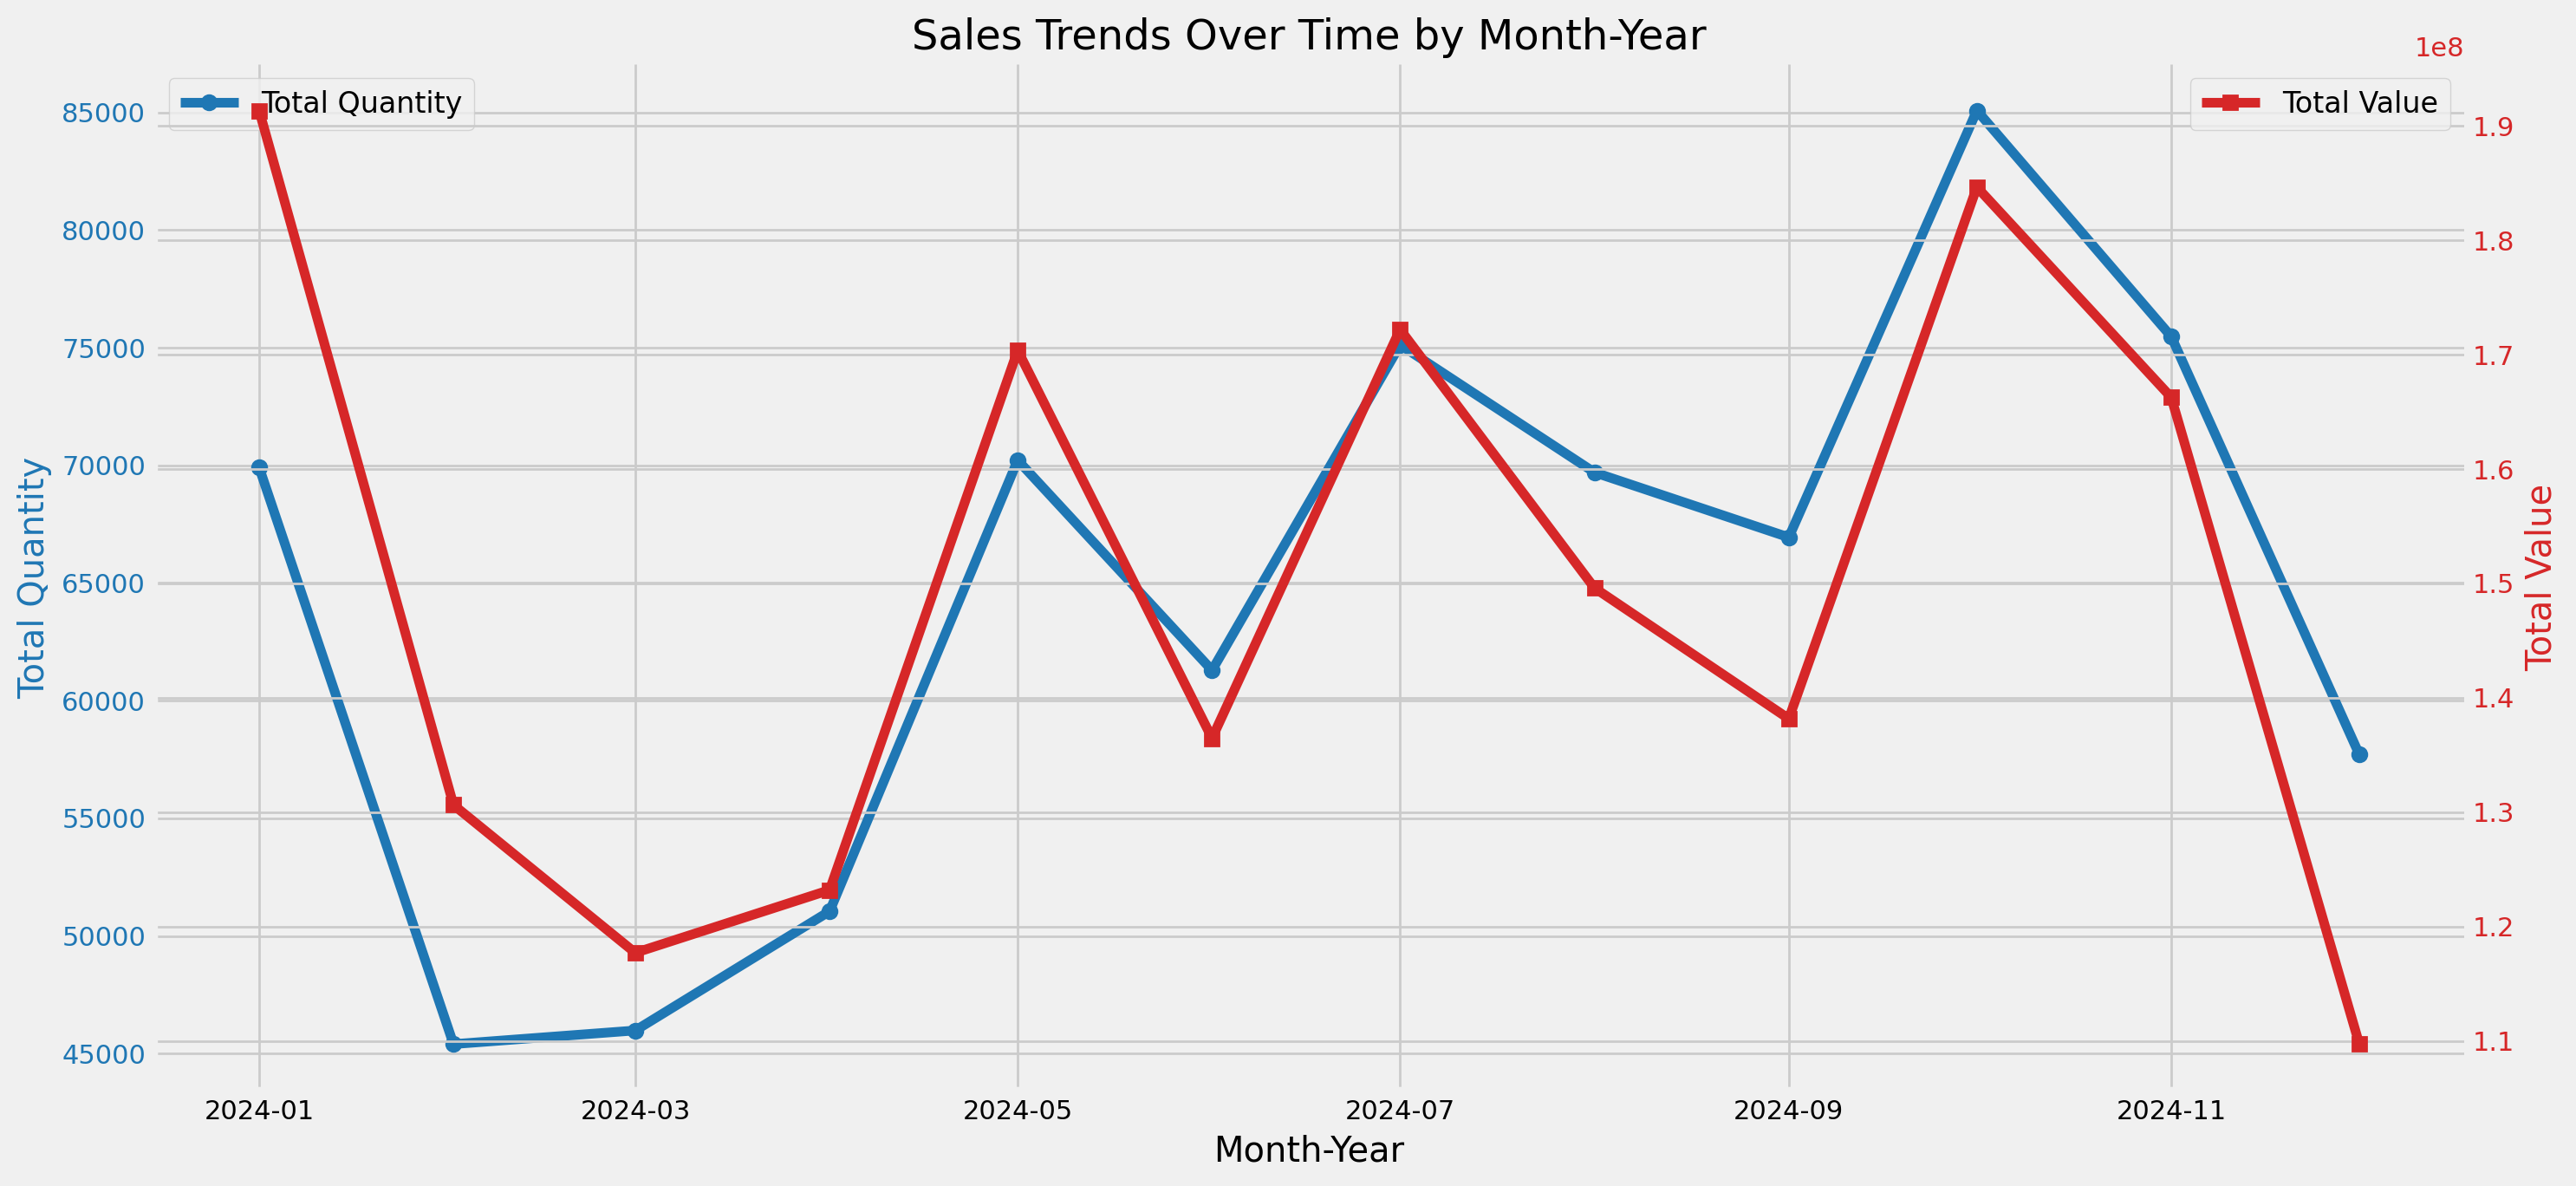

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'quantity', 'unit_price', and 'date' columns
df['total_value'] = df['quantity'] * df['unit_price']

# Create 'month_year' column for grouping
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M').astype(str)

# Group by 'month_year' to get monthly totals
monthly_sales = df.groupby('month_year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).rename(columns={'quantity': 'total_quantity', 'total_value': 'total_value'})

# Ensure 'month_year' is in the correct order for plotting
monthly_sales = monthly_sales.reset_index()
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'], format='%Y-%m')
monthly_sales = monthly_sales.sort_values('month_year')

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Quantity on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Quantity', color=color)
ax1.plot(monthly_sales['month_year'], monthly_sales['total_quantity'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for Total Value
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Value', color=color)  
ax2.plot(monthly_sales['month_year'], monthly_sales['total_value'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Sales Trends Over Time by Month-Year')
fig.tight_layout()  # adjust the layout so that everything fits without overlapping

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend 
ax1.legend(['Total Quantity'], loc='upper left')
ax2.legend(['Total Value'], loc='upper right')

plt.show()

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# # Ensure 'date' is in datetime format if it isn't already
# df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# # Calculate total value for each transaction
# df_cleaned['total_value'] = df_cleaned['quantity'] * df_cleaned['unit_price']

# Group by 'month_year' to get monthly totals
monthly_sales = df_cleaned.groupby('month_year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).rename(columns={'quantity': 'total_quantity', 'total_value': 'total_value'})

# Ensure 'month_year' is in the correct order for plotting
monthly_sales = monthly_sales.reset_index()
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('month_year')

# Create a figure with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add trace for Quantity
fig.add_trace(
    go.Scatter(x=monthly_sales['month_year'], y=monthly_sales['total_quantity'], name="Total Quantity", mode='lines+markers'),
    secondary_y=False,
)

# Add trace for Total Value
fig.add_trace(
    go.Scatter(x=monthly_sales['month_year'], y=monthly_sales['total_value'], name="Total Value", mode='lines+markers'),
    secondary_y=True,
)

# Layout settings
fig.update_layout(
    title='Sales Trends Over Time by Month-Year',
    xaxis_title="Month-Year",
    legend_title="Metrics",
)

# Set y-axes titles
fig.update_yaxes(title_text="Total Quantity", secondary_y=False)
fig.update_yaxes(title_text="Total Value", secondary_y=True)

# Show the plot
fig.show()

# For seasonal analysis:
print("Seasonal Analysis by Month:")
monthly_sales['month'] = monthly_sales['month_year'].dt.month_name()
monthly_patterns = monthly_sales.groupby('month').mean()
print(monthly_patterns)

# For interactive box plots of monthly patterns
import plotly.express as px

# Quantity
fig_quantity = px.box(monthly_sales, x="month", y="total_quantity", title="Monthly Quantity Sales Distribution")
fig_quantity.update_xaxes(tickangle=45)
fig_quantity.show()

# Value
fig_value = px.box(monthly_sales, x="month", y="total_value", title="Monthly Value Sales Distribution")
fig_value.update_xaxes(tickangle=45)
fig_value.show()

Seasonal Analysis by Month:
          month_year  total_quantity     total_value
month                                               
April     2024-04-01      50,554.000 122,110,750.000
August    2024-08-01      68,837.000 146,581,003.000
December  2024-12-01      57,626.000 109,549,774.000
February  2024-02-01      44,063.000 126,579,702.000
January   2024-01-01      67,526.000 185,626,186.000
July      2024-07-01      74,689.000 171,040,881.000
June      2024-06-01      60,716.000 135,138,614.000
March     2024-03-01      45,381.000 116,000,676.000
May       2024-05-01      69,551.000 168,781,502.000
November  2024-11-01      75,361.000 165,933,104.000
October   2024-10-01      84,739.000 183,840,551.000
September 2024-09-01      66,747.000 137,791,455.000


### Identify Top 5 Products by Quantity

In [55]:
# Group by 'anonymized_product' to sum up quantities
top_products_by_quantity = df_cleaned.groupby('anonymized_product')['quantity'].sum().sort_values(ascending=False).head(5)

print("Top 5 Products by Quantity Sold:")
print(top_products_by_quantity)

Top 5 Products by Quantity Sold:
anonymized_product
Product-66e0    46957
Product-e805    42602
Product-8f75    37566
Product-29ee    35940
Product-4156    28487
Name: quantity, dtype: int64


### Identify Top 5 Products by Value

In [56]:
# Calculate total value for each transaction
# df_cleaned['total_value'] = df_cleaned['quantity'] * df_cleaned['unit_price']

# Group by 'anonymized_product' to sum up total_value
top_products_by_value = df_cleaned.groupby('anonymized_product')['total_value'].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Products by Total Value:")
print(top_products_by_value)


Top 5 Products by Total Value:
anonymized_product
Product-e805   262,787,281.000
Product-8f75   158,797,460.000
Product-66e0    70,704,225.000
Product-29ee    68,248,274.000
Product-4156    56,956,007.000
Name: total_value, dtype: float64


## Advanced Analysis

#### Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior:
- Total Quantity purchased
- Total Value contributed
- Frequency of transactions

To perform a segmentation analysis of businesses based on their purchasing behavior, I will use cluster analysis to group businesses based on their Total Quantity purchased, Total Value contributed, and Frequency of transactions.


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate total value for each transaction
# df_cleaned['total_value'] = df_cleaned['quantity'] * df_cleaned['unit_price']

# Group by business and aggregate metrics
business_stats = df_cleaned.groupby('anonymized_business').agg({
    'quantity': 'sum',  # Total Quantity purchased
    'total_value': 'sum',  # Total Value contributed
    'date': 'count'  # Frequency of transactions each row represents a transaction.
}).rename(columns={
    'quantity': 'total_quantity',
    'total_value': 'total_value',
    'date': 'transaction_frequency'
})

# Log transformation to address any skewness in data.
business_stats['total_quantity'] = np.log1p(business_stats['total_quantity'])
business_stats['total_value'] = np.log1p(business_stats['total_value'])
business_stats['transaction_frequency'] = np.log1p(business_stats['transaction_frequency'])

In [58]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(business_stats)

In [59]:
# Determine the number of clusters using the Elbow method.
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

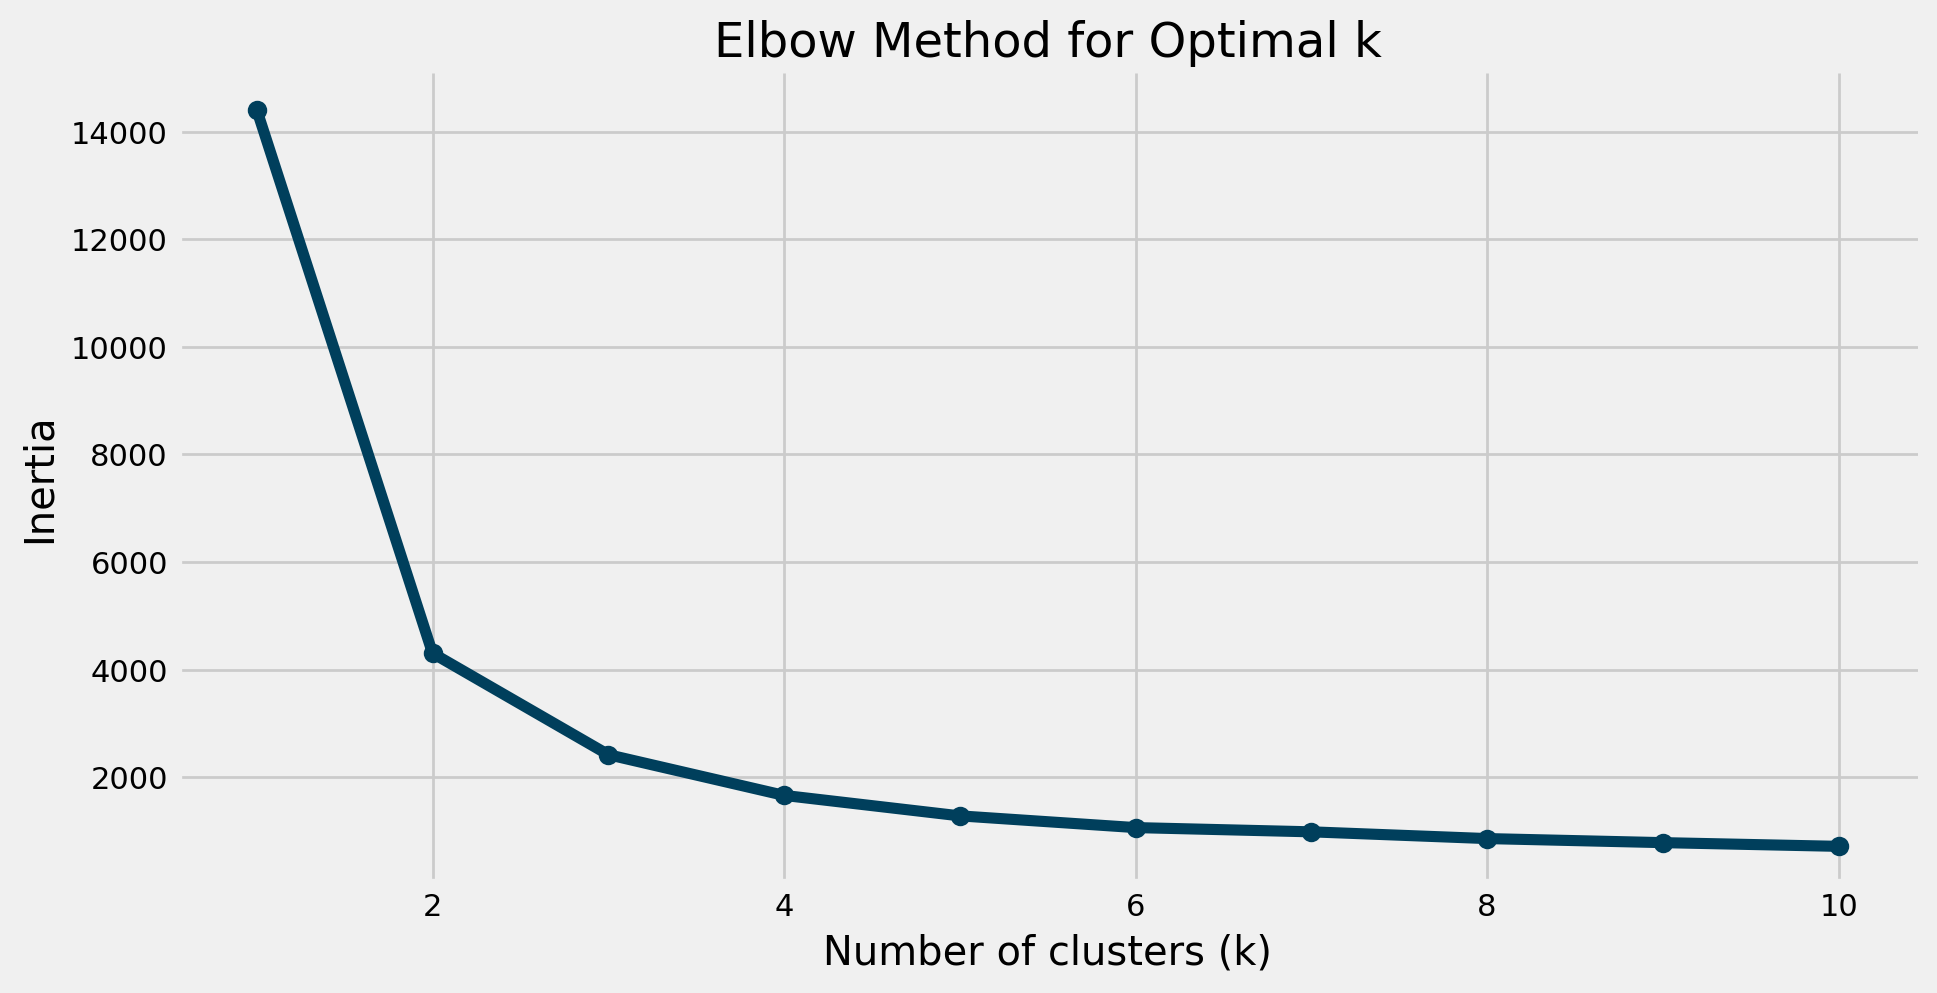

In [60]:
# Plotting the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

From the elbow curve plot 2 clusters are the optimal.

In [61]:
# Choose an appropriate k , for my case k =2,  based on the Elbow curve
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

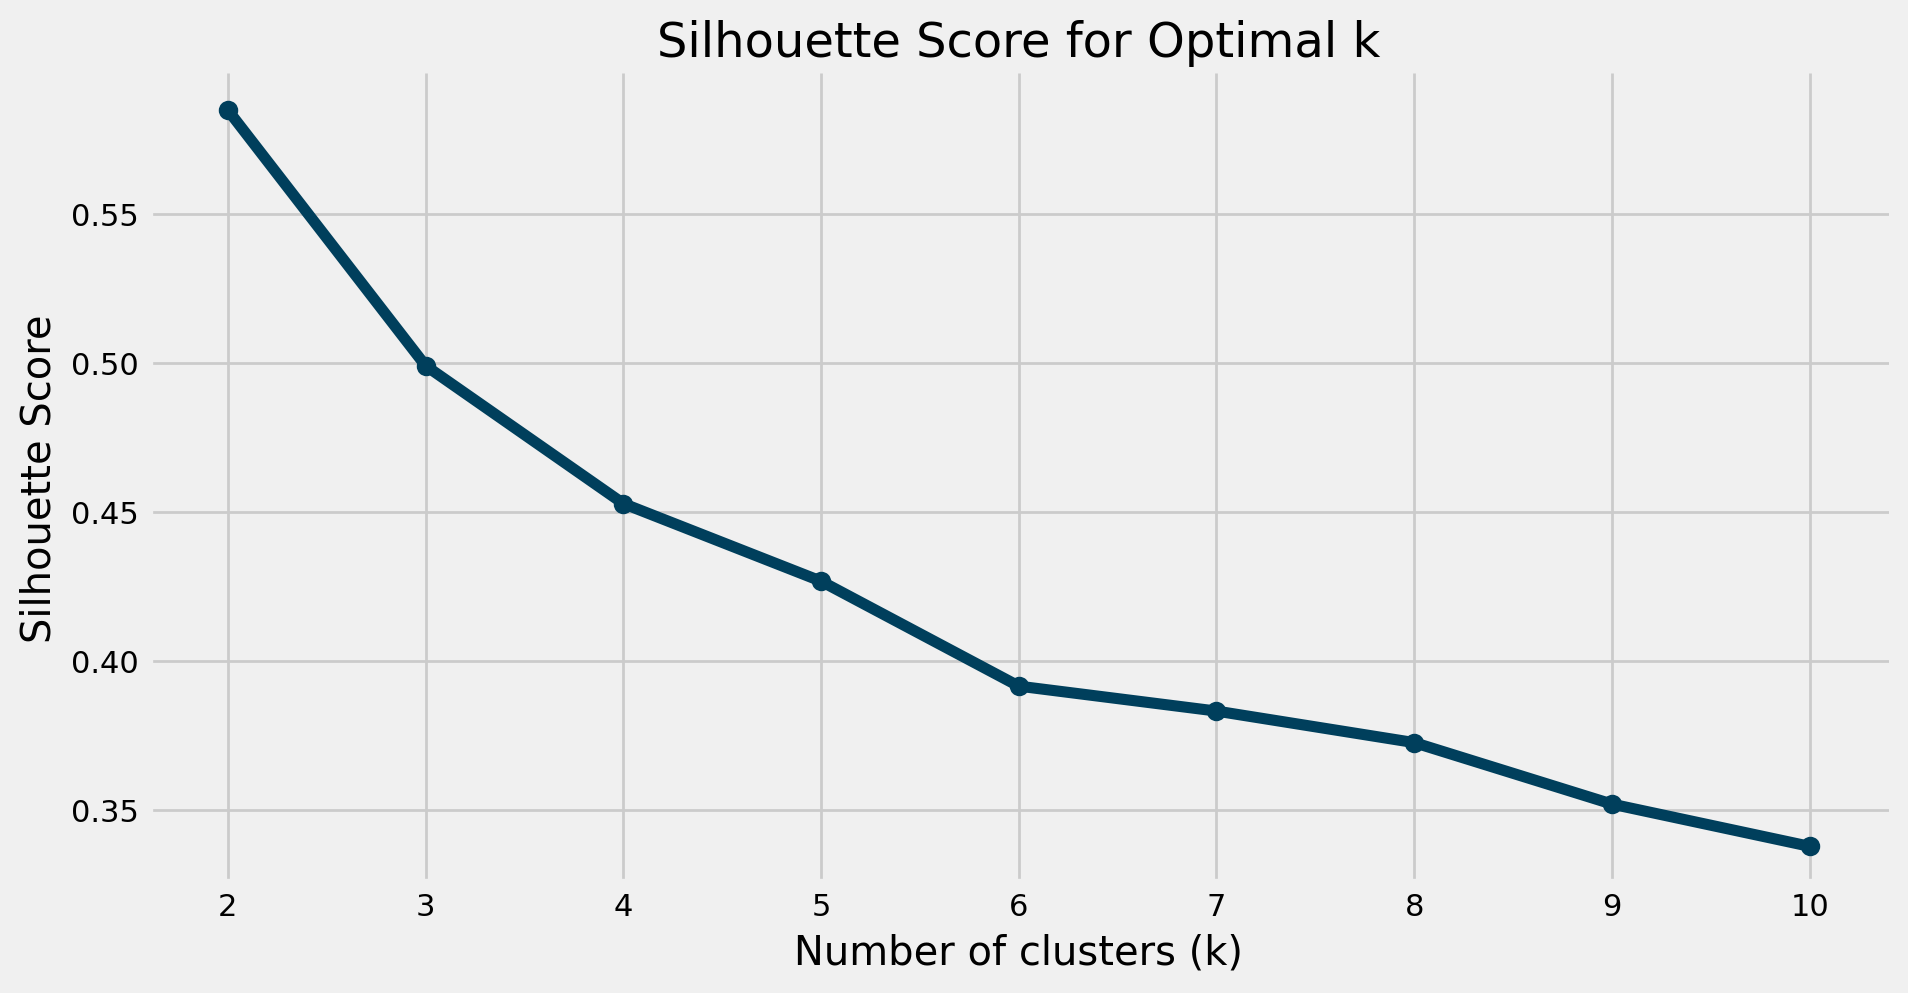

In [62]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [63]:
# Choose an appropriate k=2 based on the Silhouette score
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [64]:
# Add cluster labels to the original DataFrame
business_stats['cluster'] = clusters

#### Step 4: Analyze Clusters

In [65]:
# Print out the mean values of each cluster for interpretation
for i in range(2):  #  2 clusters
    print(f"Cluster {i}:")
    print(business_stats[business_stats['cluster'] == i].mean())
    print()


Cluster 0:
total_quantity           5.196
total_value             12.829
transaction_frequency    4.494
cluster                  0.000
dtype: float64

Cluster 1:
total_quantity          1.977
total_value             9.299
transaction_frequency   1.648
cluster                 1.000
dtype: float64



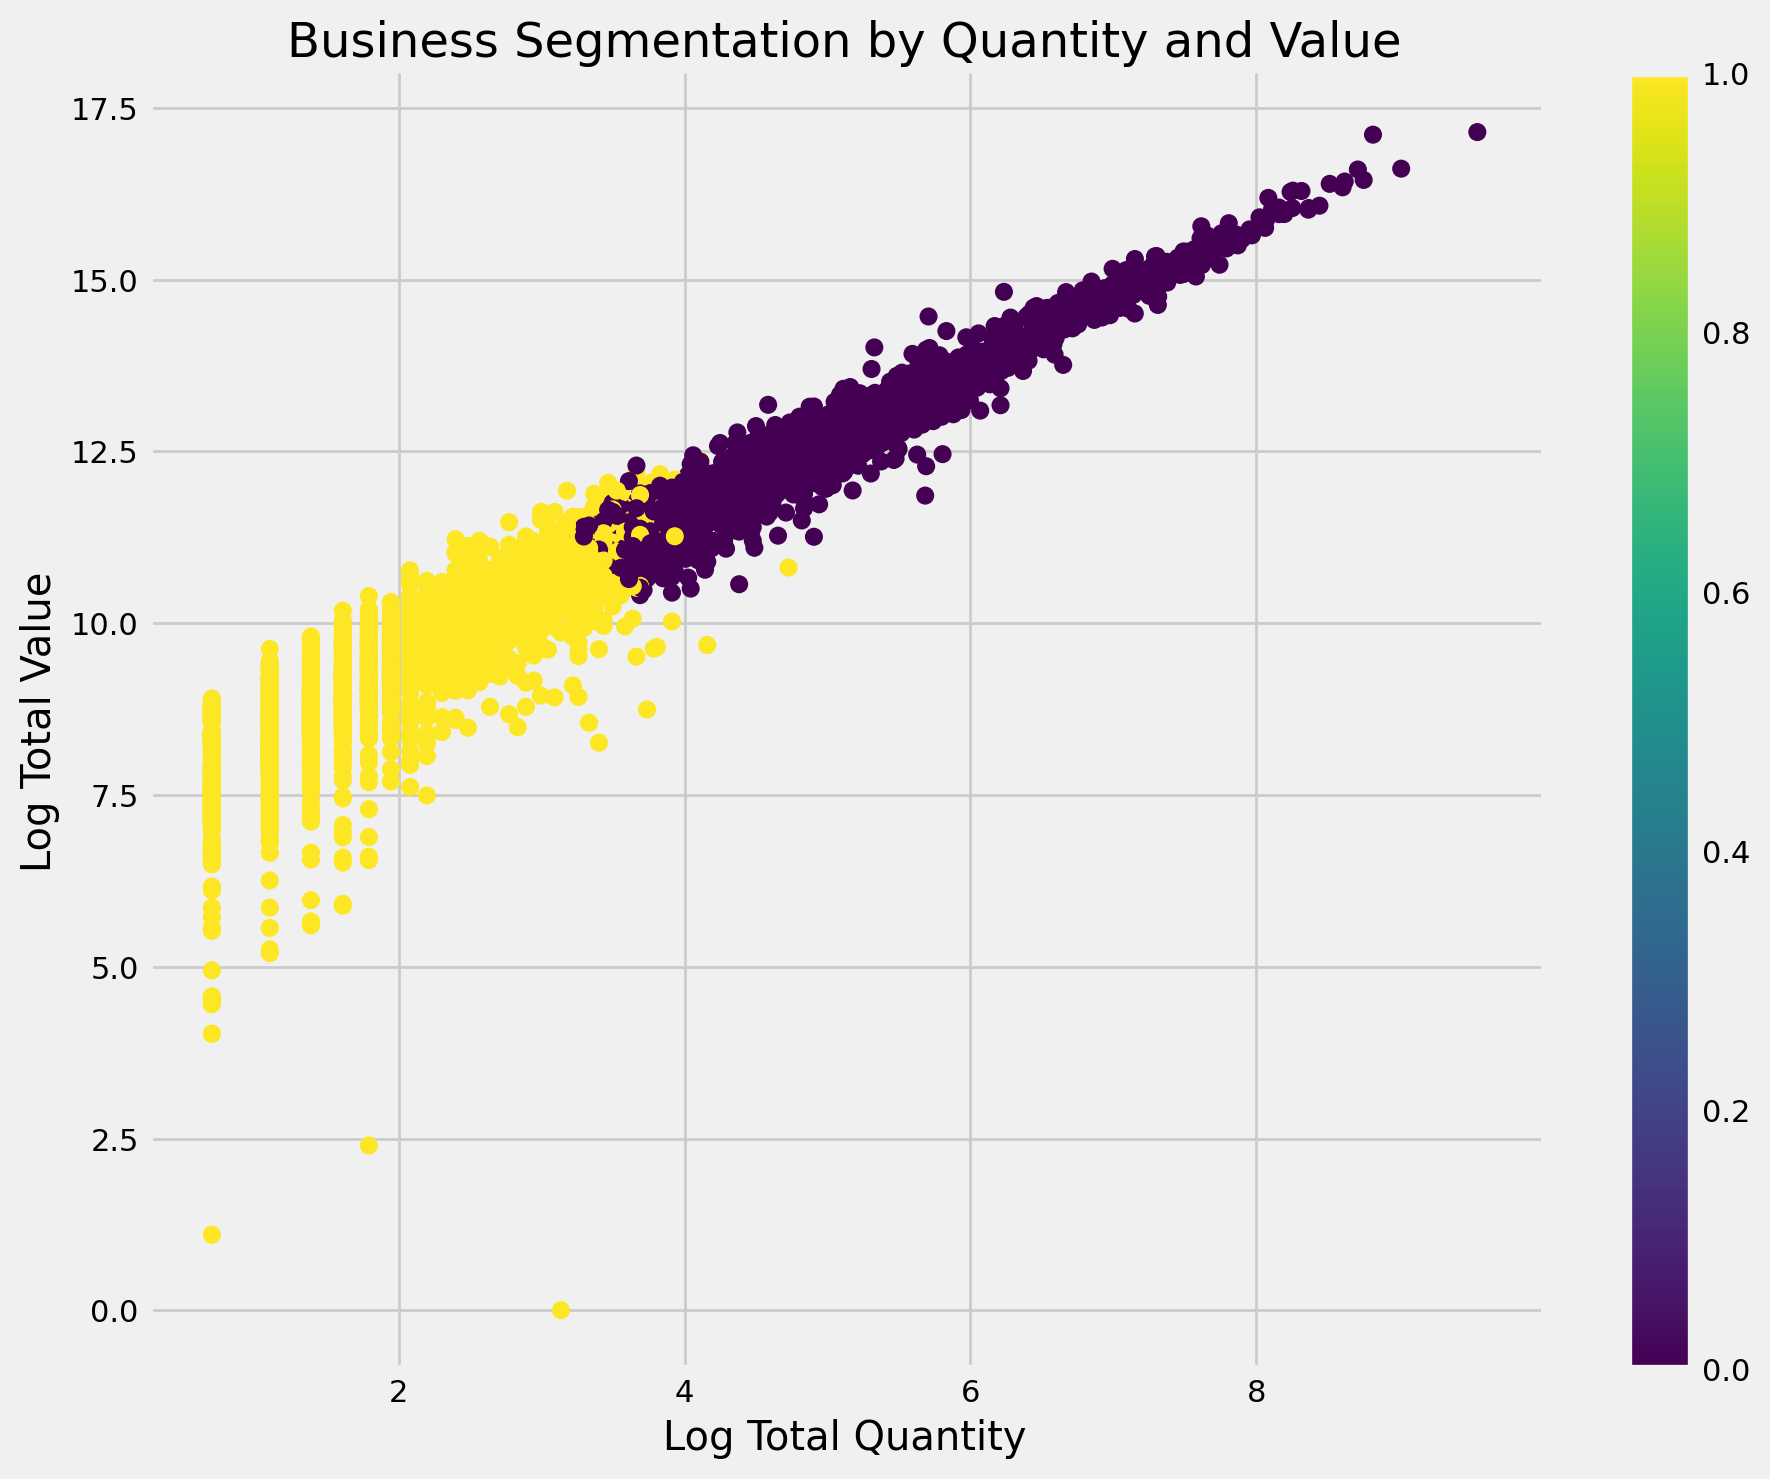

In [66]:
# Visualize clusters in 2D space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(business_stats['total_quantity'], business_stats['total_value'], 
                      c=business_stats['cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Log Total Quantity')
plt.ylabel('Log Total Value')
plt.title('Business Segmentation by Quantity and Value')
plt.show()

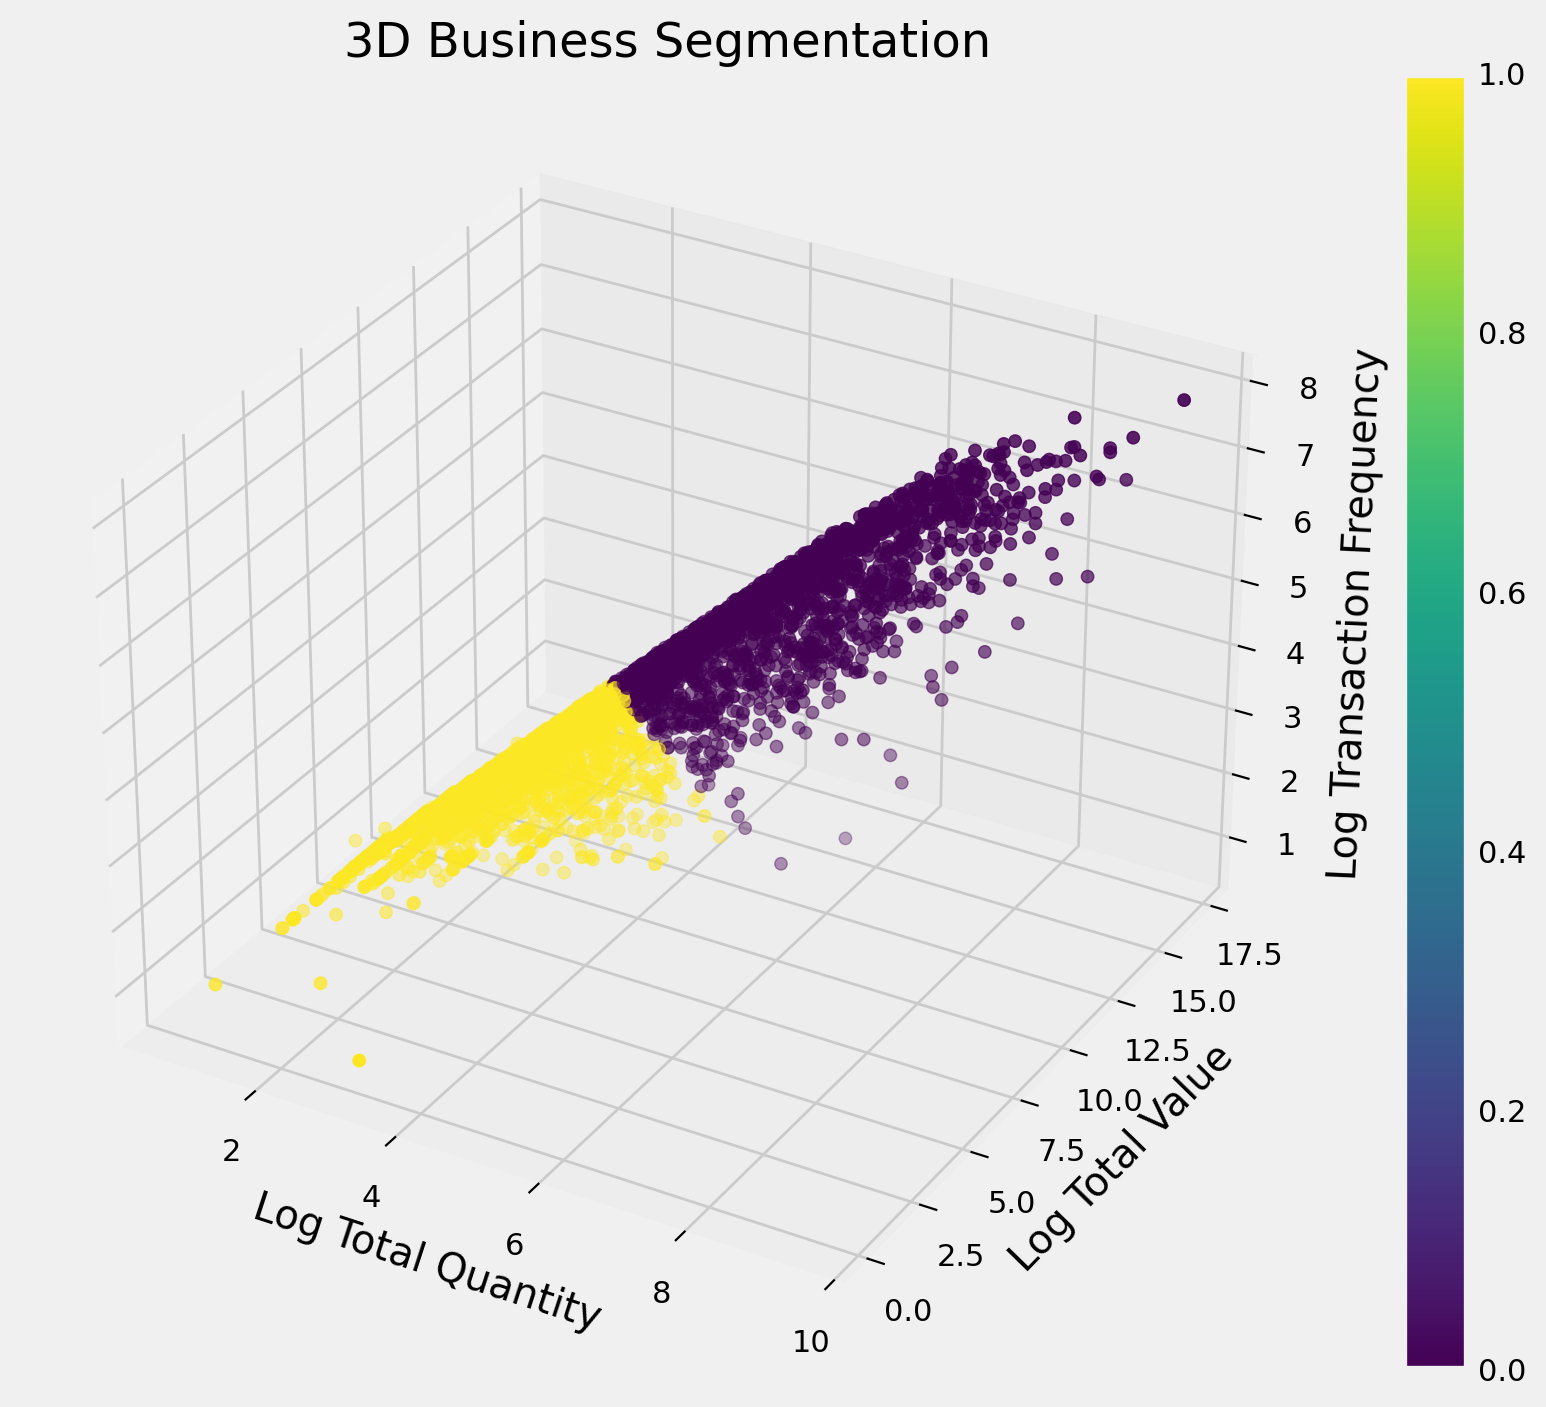

In [67]:
# For a 3D visualization 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(business_stats['total_quantity'], business_stats['total_value'], 
                     business_stats['transaction_frequency'], 
                     c=business_stats['cluster'], cmap='viridis')
ax.set_xlabel('Log Total Quantity')
ax.set_ylabel('Log Total Value')
ax.set_zlabel('Log Transaction Frequency')
plt.title('3D Business Segmentation')
plt.colorbar(scatter)
plt.show()

### Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.

In [68]:
df_cleaned.head()

date anonymized_category anonymized_product  \
0  2024-08-18 21:32:00        Category-106       Product-21f4   
1  2024-08-18 21:32:00        Category-120       Product-4156   
2  2024-08-18 21:32:00        Category-121       Product-49bd   
3  2024-08-18 21:32:00         Category-76       Product-61dd   
4  2024-08-18 21:32:00        Category-119       Product-66e0   

  anonymized_business anonymized_location  quantity  unit_price   month_year  \
0       Business-de42       Location-1ba8         1         850  August 2024   
1       Business-de42       Location-1ba8         2        1910  August 2024   
2       Business-de42       Location-1ba8         1        3670  August 2024   
3       Business-de42       Location-1ba8         1        2605  August 2024   
4       Business-de42       Location-1ba8         5        1480  August 2024   

   total_value  
0      850.000  
1    3,820.000  
2    3,670.000  
3    2,605.000  
4    7,400.000

In [69]:

# Group by 'anonymized_business' to get metrics
business_metrics = df_cleaned.groupby('anonymized_business').agg({
    'total_value': 'sum',  # Total Sales Value
    'date': 'count',  # Frequency of Transactions
}).rename(columns={'date': 'transaction_count'})

business_metrics['avg_transaction_value'] = business_metrics['total_value'] / business_metrics['transaction_count']

In [70]:
#classifying businesses based on their average transaction value.I will use the 25th and 75th percentiles as thresholds.
def classify_value(row):
    """
    Classify a business into 'High Value', 'Medium Value', or 'Low Value' based on its total sales value.

    This function uses percentile thresholds from the 'business_metrics' DataFrame to categorize each 
    business:
    - 'High Value' if the business's total sales value is above the 75th percentile.
    - 'Medium Value' if between the 25th and 75th percentiles.
    - 'Low Value' if below the 25th percentile.

    Parameters:
    row (pandas.Series): A row from the DataFrame containing 'total_value' among other columns.

    Returns:
    str: A string indicating the value category ('High Value', 'Medium Value', or 'Low Value').

    Notes:
    - This function assumes 'business_metrics' is a DataFrame with a 'total_value' column already defined.
    - The classification thresholds can be adjusted by changing the quantile values in the conditions.
    """
    if row['total_value'] > business_metrics['total_value'].quantile(0.75):
        return 'High Value'
    elif row['total_value'] > business_metrics['total_value'].quantile(0.25):
        return 'Medium Value'
    else:
        return 'Low Value'

# Apply the classification to each business in the DataFrame
business_metrics['value_category'] = business_metrics.apply(classify_value, axis=1)

In [71]:
business_metrics

total_value  transaction_count  avg_transaction_value  \
anonymized_business                                                          
Business-0000         10,445.000                  8              1,305.625   
Business-0005          2,645.000                  1              2,645.000   
Business-0029         77,340.000                  6             12,890.000   
Business-003d        221,761.000                 31              7,153.581   
Business-0072        225,056.000                101              2,228.277   
...                          ...                ...                    ...   
Business-ffa9          6,740.000                  3              2,246.667   
Business-ffae         10,530.000                  5              2,106.000   
Business-ffb1        438,115.000                105              4,172.524   
Business-ffd2         67,723.000                 22              3,078.318   
Business-ffff        110,285.000                107              1,030.701   

                    value_category  
anonymized_business                 
Business-0000         Medium Value  
Business-0005            Low Value  
Business-0029         Medium Value  
Business-003d         Medium Value  
Business-0072         Medium Value  
...                            ...  
Business-ffa9            Low Value  
Business-ffae         Medium Value  
Business-ffb1           High Value  
Business-ffd2         Medium Value  
Business-ffff         Medium Value  

[4800 rows x 4 columns]

In [72]:
# Count the number of businesses in each category
value_counts = business_metrics['value_category'].value_counts()
value_counts

value_category
Medium Value    2400
Low Value       1200
High Value      1200
Name: count, dtype: int64

In [73]:
import plotly.express as px

fig = px.pie(business_metrics, names='value_category', title='Distribution of Business Value Categories')
fig.show()

### Recommendations for Engagement:
#### `High Value Businesses`
1. `Personalized Attention:` Assign dedicated account managers or relationship managers to these businesses. Regular check-ins, quarterly business reviews, and tailored solutions or product recommendations based on their buying patterns.
2. `Exclusive Offers:` Special pricing, early access to new products, or custom solutions that might not be available to the general customer base.

3. `Loyalty Programs:` Create or enhance loyalty or rewards programs that offer significant value back to these high-value clients, encouraging continued or increased business.

4. `Strategic Partnerships:` Look for opportunities to collaborate on marketing, product development, or co-branding initiatives.


#### `Medium Value Businesses:`

1. `Growth Opportunities:` Identify growth areas within these businesses. Offer upsell opportunities or introduce them to new products/services that could meet their expanding needs.

2. `Educational Content:` Provide webinars, whitepapers, or case studies that can help them understand industry trends, product usage, or cost-saving strategies.

3. `Engagement Campaigns:` Use email marketing or targeted content to keep them engaged, focusing on how your products/services can solve their specific problems or improve efficiency.

4. `Feedback Loops:` Regularly solicit feedback to understand their needs better and show that you value their input, potentially converting them into High Value clients.


#### `Low Value Businesses:`

1. `Automation and Efficiency:` Use automated marketing tools for engagement, like email campaigns or automated customer service bots, to keep costs down while maintaining contact.

2. `Simplified Offers:` Provide straightforward, no-frills offers or discounts that could encourage larger purchases or more frequent buying.

3. `Bundling Products: `Encourage these businesses to buy more by offering bundle deals or introducing them to products that complement what they're already buying.

4. `Re-engagement Campaigns:` If these businesses haven't made a purchase in a while, targeted re-engagement efforts can be key, perhaps with a "we miss you" discount or a reminder of the value your products bring.

### **Forecasting:**
- Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Convert to datetime if not already done
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Aggregate data to get monthly totals
monthly_sales = df_cleaned.set_index('date').resample('M')['total_value'].sum().reset_index()

# Convert to datetime if not already done
monthly_sales['date'] = pd.to_datetime(monthly_sales['date'])

# Set date as index for time series analysis
monthly_sales.set_index('date', inplace=True)

/tmp/ipykernel_39414/3091593106.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [75]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# monthly_sales is my DataFrame with 'total_value' as the sales data
# Ensure your index is datetime
monthly_sales = monthly_sales.asfreq('ME')  # or 'MS' for start of month

In [76]:
monthly_sales

total_value
date                      
2024-01-31 185,626,186.000
2024-02-29 126,579,702.000
2024-03-31 116,000,676.000
2024-04-30 122,110,750.000
2024-05-31 168,781,502.000
2024-06-30 135,138,614.000
2024-07-31 171,040,881.000
2024-08-31 146,581,003.000
2024-09-30 137,791,455.000
2024-10-31 183,840,551.000
2024-11-30 165,933,104.000
2024-12-31 109,549,774.000

In [77]:
# Fit ARIMA model
model = ARIMA(monthly_sales['total_value'], order=(1, 1, 1))
fitted_model = model.fit()

# Summary of the model fit
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:            total_value   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -204.248
Date:                Wed, 29 Jan 2025   AIC                            414.496
Time:                        18:31:22   BIC                            415.690
Sample:                    01-31-2024   HQIC                           413.743
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0152      0.627      0.024      0.981      -1.214       1.245
ma.L1         -0.4890      0.561     -0.871      0.384      -1.589       0.611
sigma2      8.278e+14   7.37e-17   1.12e+31      0.0

- Given linited data ARIMA is not the best option.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# monthly_sales is my DataFrame with 'total_value' as the sales data
window_size = 3  # I chose 3 months for the moving average

# Calculate the moving average
monthly_sales['MA'] = monthly_sales['total_value'].rolling(window=window_size, min_periods=1).mean()

# For forecasting, we'll use the last 'window_size' number of averages to project forward
last_ma = monthly_sales['MA'].iloc[-1]
forecast_steps = 3  # Forecasting for 3 months

# Generate forecast
forecast = pd.DataFrame({'Date': pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:],  # Start from next month
                         'Forecasted Sales': [last_ma] * forecast_steps})

# Combine observed and forecasted data for plotting
combined = pd.concat([monthly_sales[['total_value', 'MA']], forecast[['Forecasted Sales']].rename(columns={'Forecasted Sales': 'total_value'})])

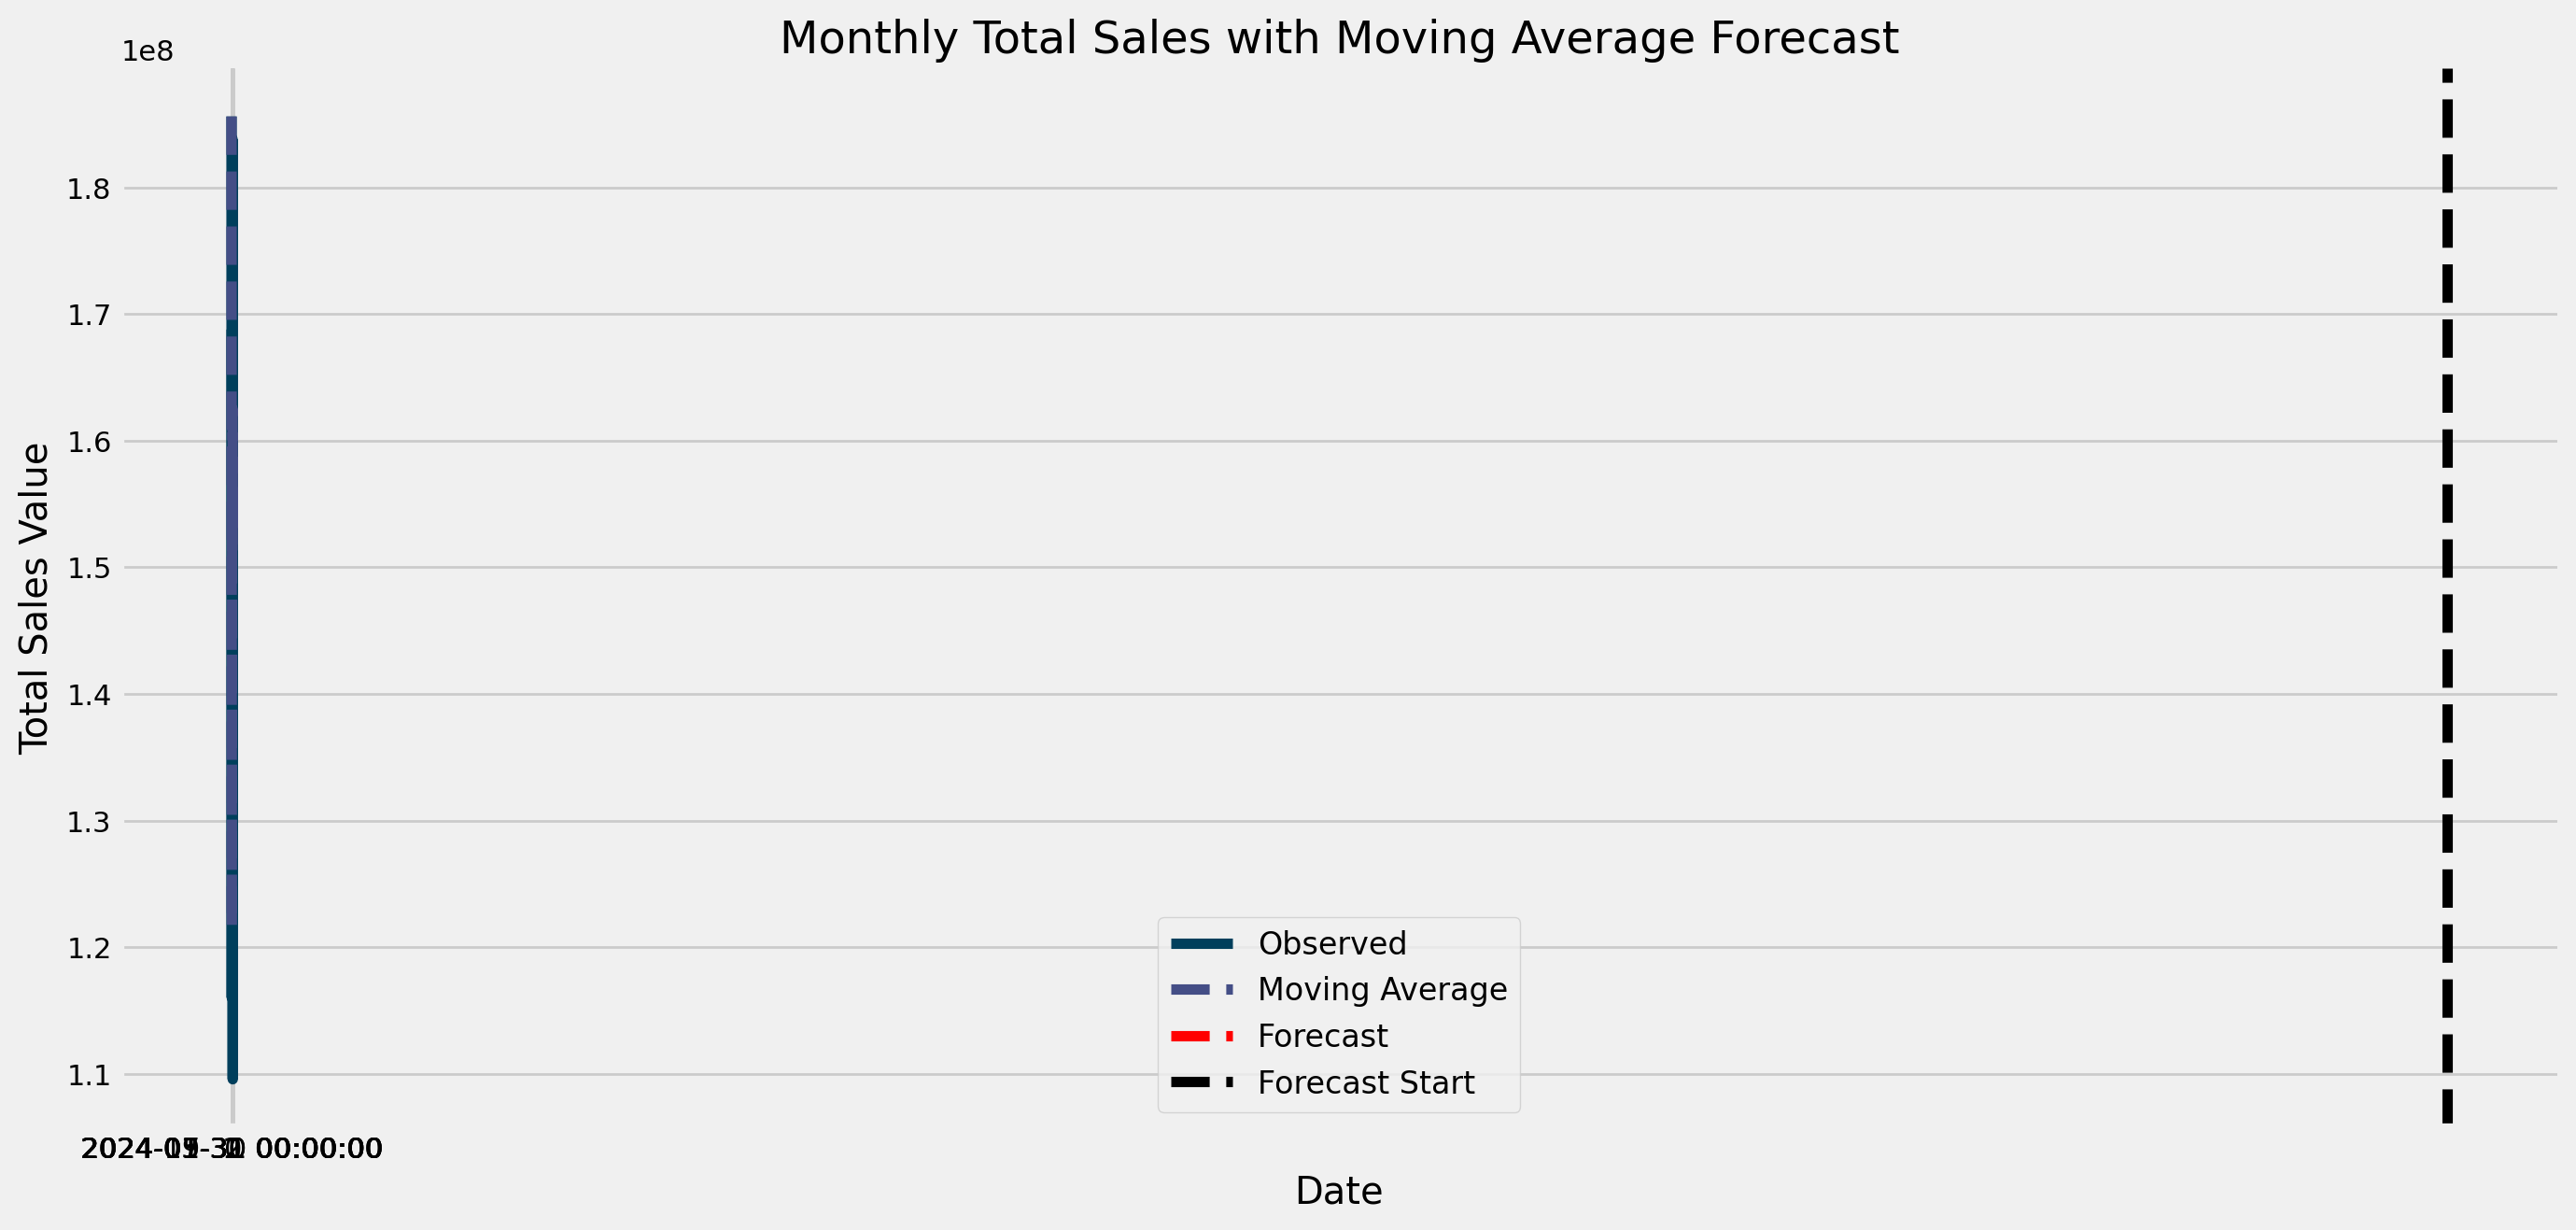

        Date  Forecasted Sales
0 2025-01-31   153,107,809.667
1 2025-02-28   153,107,809.667
2 2025-03-31   153,107,809.667


In [79]:
# Plotting
plt.figure(figsize=(15, 7))
combined['total_value'].plot(label='Observed')
combined['MA'].plot(label='Moving Average', linestyle='--')
plt.plot(forecast.index, forecast['Forecasted Sales'], 'r--', label='Forecast')
plt.axvline(x=monthly_sales.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.title('Monthly Total Sales with Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.legend()
plt.show()

# Print forecasted values
print(forecast)

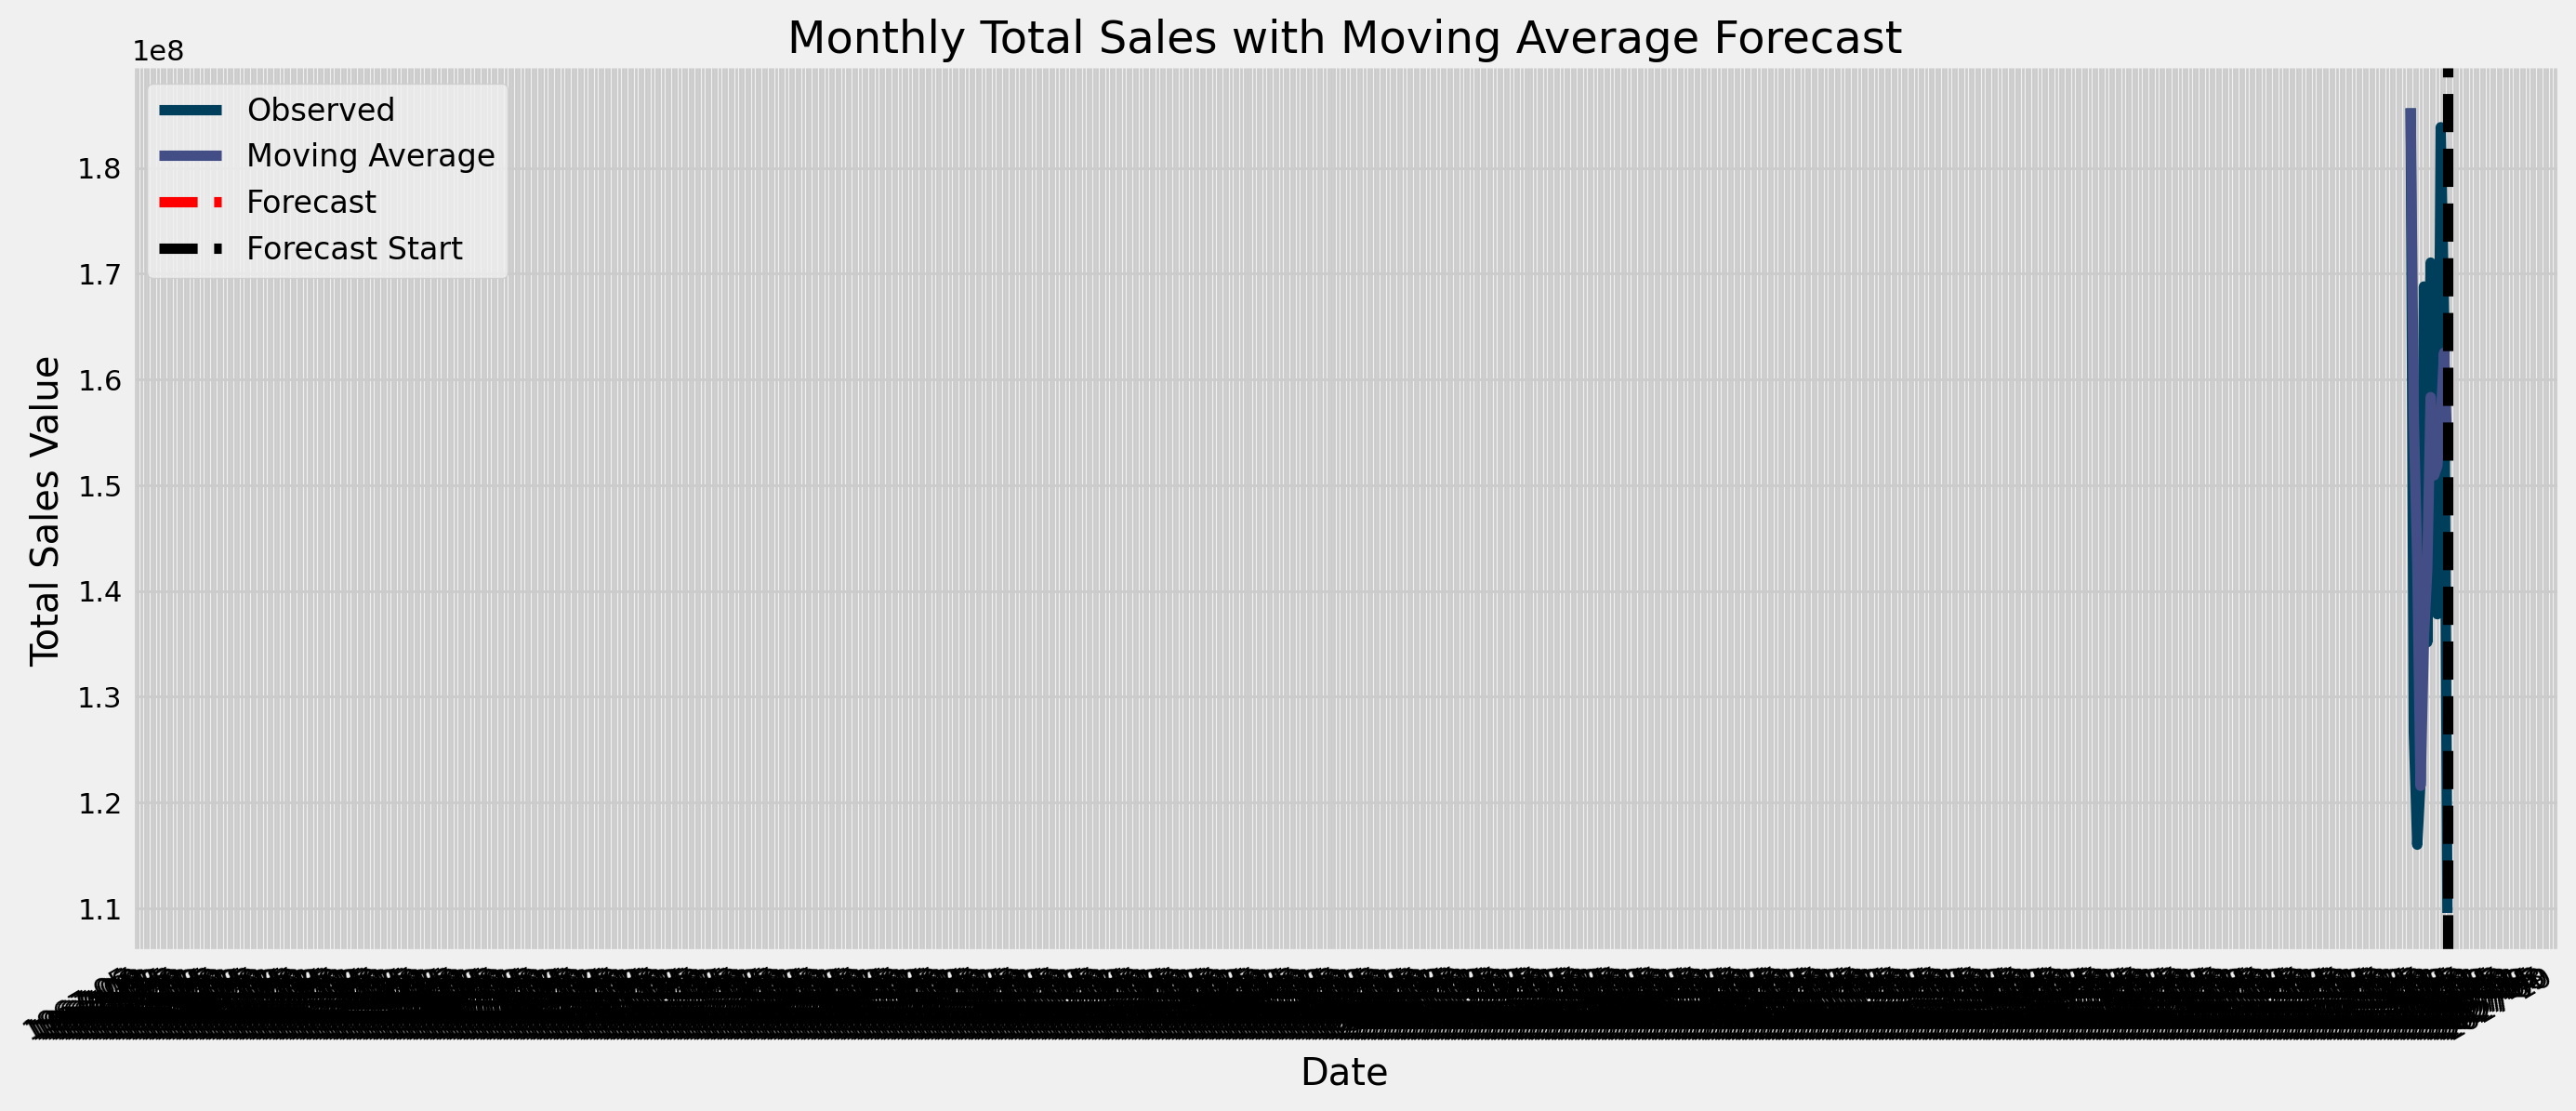

In [80]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales['total_value'], label='Observed')
plt.plot(monthly_sales.index, monthly_sales['MA'], label='Moving Average')
plt.plot(forecast.index, forecast['Forecasted Sales'], 'r--', label='Forecast')
plt.axvline(x=monthly_sales.index[-1], color='black', linestyle='--', label='Forecast Start')

# Custom date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

plt.title('Monthly Total Sales with Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales Value')
plt.legend()
plt.show()

In [81]:
print(forecast)

        Date  Forecasted Sales
0 2025-01-31   153,107,809.667
1 2025-02-28   153,107,809.667
2 2025-03-31   153,107,809.667


## Anomaly Detection:
Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data.

In [82]:
df_cleaned.head()

date anonymized_category anonymized_product  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  anonymized_business anonymized_location  quantity  unit_price   month_year  \
0       Business-de42       Location-1ba8         1         850  August 2024   
1       Business-de42       Location-1ba8         2        1910  August 2024   
2       Business-de42       Location-1ba8         1        3670  August 2024   
3       Business-de42       Location-1ba8         1        2605  August 2024   
4       Business-de42       Location-1ba8         5        1480  August 2024   

   total_value  
0      850.000  
1    3,820.000  
2    3,670.000  
3    2,605.000  
4    7,400.000

In [83]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame with 'date', 'quantity', and 'total_value' columns
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, coerce errors to NaT
df_cleaned = df.dropna(subset=['date'])  # Drop rows where 'date' is NaT

df_cleaned.set_index('date', inplace=True)

# Aggregate to daily or monthly depending on your data resolution
daily_sales = df_cleaned.resample('D').sum()  
daily_sales

anonymized_category  \
date                                                                      
2024-01-01  Category-75Category-85Category-75Category-120Category-76...   
2024-01-02  Category-75Category-96Category-96Category-91Category-76C...   
2024-01-03  Category-75Category-75Category-85Category-75Category-85C...   
2024-01-04  Category-100Category-120Category-100Category-100Category...   
2024-01-05  Category-100Category-120Category-75Category-100Category-...   
...                                                                 ...   
2024-12-27  Category-75Category-75Category-75Category-94Category-100...   
2024-12-28  Category-75Category-94Category-100Category-84Category-10...   
2024-12-29  Category-76Category-98Category-120Category-120Category-9...   
2024-12-30  Category-100Category-100Category-91Category-94Category-8...   
2024-12-31  Category-94Category-77Category-100Category-100Category-1...   

                                                     anonymized_product  \
date                                                                      
2024-01-01  Product-086dProduct-0c64Product-2175Product-4156Product-...   
2024-01-02  Product-6aa1Product-41c3Product-41c3Product-1b48Product-...   
2024-01-03  Product-2175Product-1609Product-6859Product-1609Product-...   
2024-01-04  Product-30cdProduct-1e80Product-30cdProduct-30cdProduct-...   
2024-01-05  Product-3cc2Product-4156Product-1609Product-94a8Product-...   
...                                                                 ...   
2024-12-27  Product-1196Product-8b75Product-1196Product-6491Product-...   
2024-12-28  Product-1196Product-6491Product-68e7Product-79b7Product-...   
2024-12-29  Product-6e9cProduct-a27fProduct-c982Product-83fdProduct-...   
2024-12-30  Product-031cProduct-1398Product-202bProduct-23c0Product-...   
2024-12-31  Product-23c0Product-b07aProduct-b9fcProduct-f3eeProduct-...   

                                                    anonymized_business  \
date                                                                      
2024-01-01  Business-83ddBusiness-83ddBusiness-d7a8Business-d7a8Busi...   
2024-01-02  Business-6f3bBusiness-20fcBusiness-20fcBusiness-0c77Busi...   
2024-01-03  Business-e97cBusiness-08e8Business-08e8Business-08e8Busi...   
2024-01-04  Business-e97cBusiness-e97cBusiness-e97cBusiness-766bBusi...   
2024-01-05  Business-fd94Business-fd94Business-755cBusiness-755cBusi...   
...                                                                 ...   
2024-12-27  Business-a523Business-a427Business-b22bBusiness-4d69Busi...   
2024-12-28  Business-6037Business-6037Business-6037Business-6037Busi...   
2024-12-29  Business-a1beBusiness-5da0Business-5da0Business-cec2Busi...   
2024-12-30  Business-cf0dBusiness-cf0dBusiness-cf0dBusiness-cf0dBusi...   
2024-12-31  Business-08e8Business-08e8Business-755cBusiness-755cBusi...   

                                                    anonymized_location  \
date                                                                      
2024-01-01  Location-66f4Location-66f4Location-1979Location-1979Loca...   
2024-01-02  Location-1c33Location-b125Location-b125Location-c2f2Loca...   
2024-01-03  Location-689fLocation-d1a8Location-d1a8Location-d1a8Loca...   
2024-01-04  Location-689fLocation-689fLocation-689fLocation-e2f8Loca...   
2024-01-05  Location-b27bLocation-b27bLocation-1c33Location-1c33Loca...   
...                                                                 ...   
2024-12-27  Location-1ea3Location-1ea3Location-1ea3Location-1ea3Loca...   
2024-12-28  Location-62b5Location-62b5Location-62b5Location-62b5Loca...   
2024-12-29  Location-4ea1Location-689fLocation-689fLocation-3fc0Loca...   
2024-12-30  Location-eb12Location-eb12Location-eb12Location-eb12Loca...   
2024-12-31  Location-d1a8Location-d1a8Location-1c33Location-1c33Loca...   

            quantity  unit_price  \
date                               
2024-01-01      2914     3131071   
2024-01-02      3362     3737386   
2024

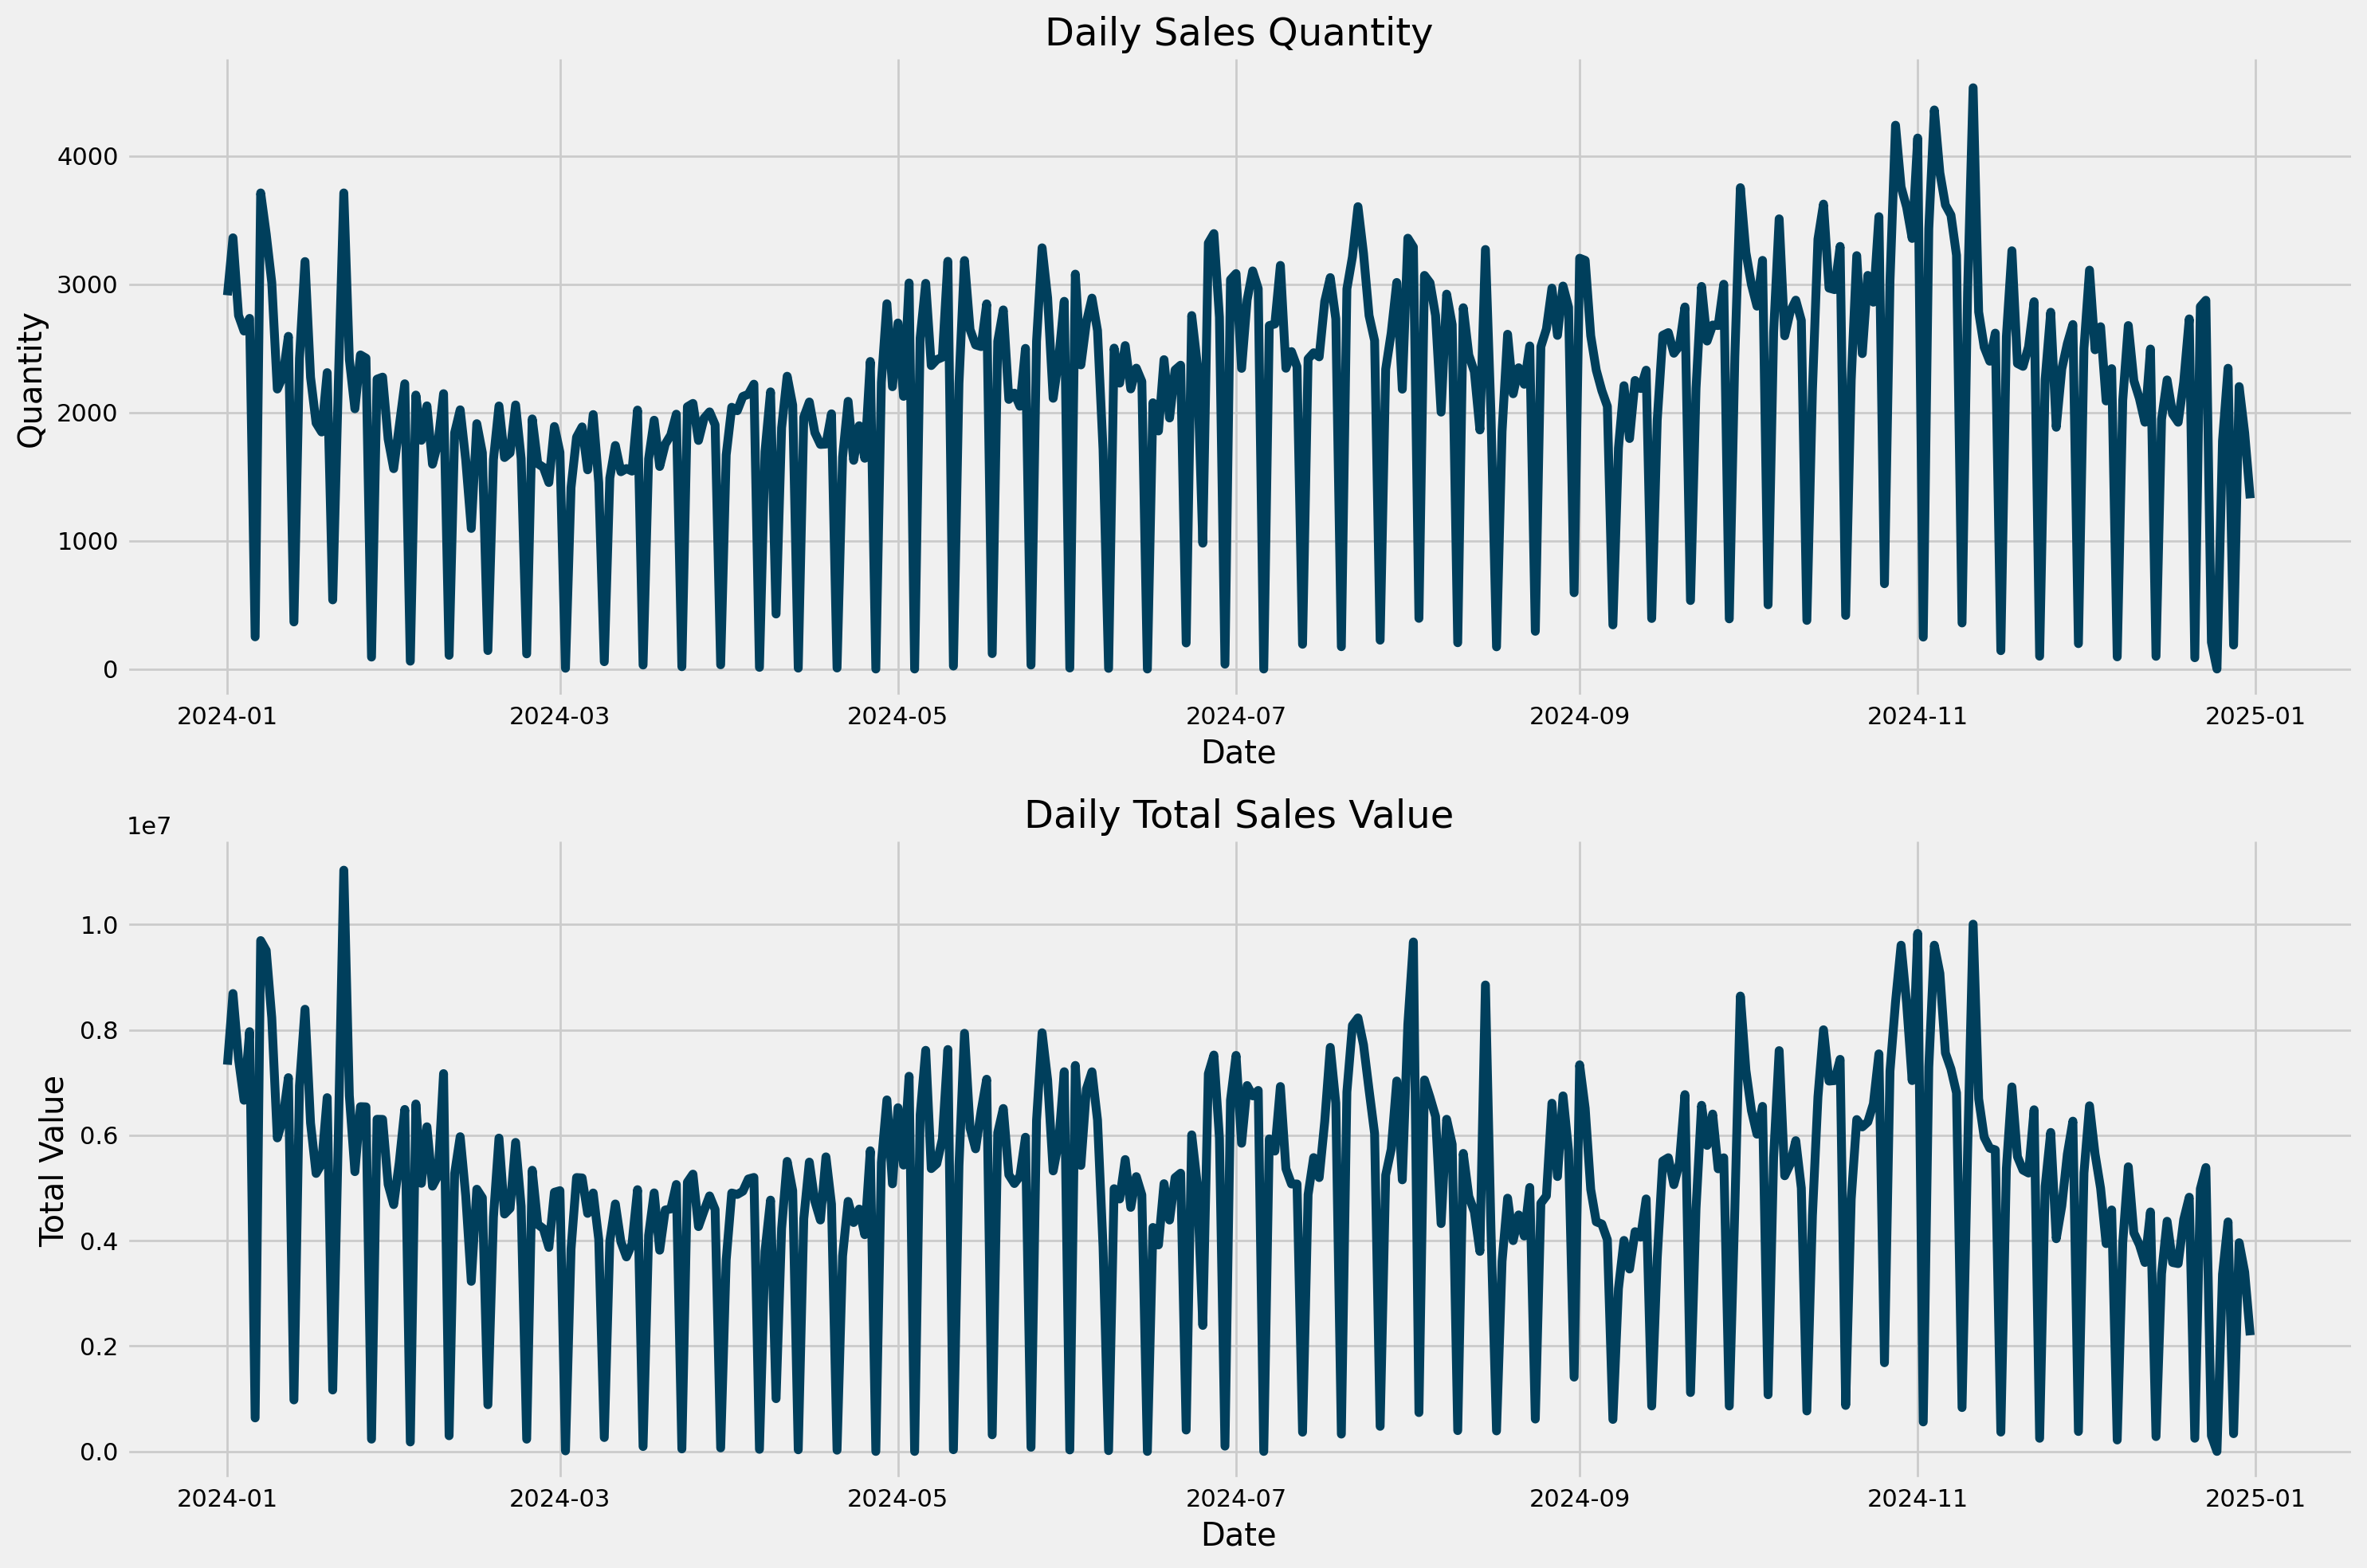

In [84]:
plt.figure(figsize=(15, 10))

# Plot Quantity
plt.subplot(2, 1, 1)
plt.plot(daily_sales['quantity'])
plt.title('Daily Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')

# Plot Total Value
plt.subplot(2, 1, 2)
plt.plot(daily_sales['total_value'])
plt.title('Daily Total Sales Value')
plt.xlabel('Date')
plt.ylabel('Total Value')

plt.tight_layout()
plt.show()

In [85]:
# Calculate Z-scores for both quantity and value
daily_sales['quantity_z_score'] = np.abs(stats.zscore(daily_sales['quantity']))
daily_sales['value_z_score'] = np.abs(stats.zscore(daily_sales['total_value']))

# Identify anomalies (z-score > 3 is often considered an anomaly)
quantity_anomalies = daily_sales[daily_sales['quantity_z_score'] > 3]
value_anomalies = daily_sales[daily_sales['value_z_score'] > 3]

print("Quantity Anomalies:")
print(quantity_anomalies)
print("\nValue Anomalies:")
print(value_anomalies)

Quantity Anomalies:
Empty DataFrame
Columns: [anonymized_category, anonymized_product, anonymized_business, anonymized_location, quantity, unit_price, month_year, total_value, quantity_z_score, value_z_score]
Index: []

Value Anomalies:
Empty DataFrame
Columns: [anonymized_category, anonymized_product, anonymized_business, anonymized_location, quantity, unit_price, month_year, total_value, quantity_z_score, value_z_score]
Index: []


In [86]:
# Trying  a lower threshold like 2 
threshold = 2
quantity_anomalies = daily_sales[daily_sales['quantity_z_score'] > threshold]
value_anomalies = daily_sales[daily_sales['value_z_score'] > threshold]

print("Quantity Anomalies (Threshold = {}):".format(threshold))
print(quantity_anomalies)
print("\nValue Anomalies (Threshold = {}):".format(threshold))
print(value_anomalies)

Quantity Anomalies (Threshold = 2):
                                                    anonymized_category  \
date                                                                      
2024-01-27  Category-100Category-100Category-75Category-77Category-7...   
2024-02-03  Category-100Category-100Category-75Category-85Category-1...   
2024-02-10  Category-76Category-76Category-76Category-100Category-12...   
2024-02-17  Category-81Category-107Category-109Category-77Category-7...   
2024-02-24  Category-76Category-102Category-119Category-75Category-7...   
2024-03-02              Category-120Category-100Category-85Category-107   
2024-03-09  Category-75Category-101Category-85Category-120Category-8...   
2024-03-16  Category-76Category-75Category-76Category-100Category-10...   
2024-03-23  Category-105Category-75Category-75Category-76Category-75...   
2024-03-30  Category-100Category-107Category-119Category-120Category...   
2024-04-06  Category-75Category-75Category-101Category-100Catego

### **Specific Dates Anomalies**

**2024-03-02:** With a `log_quantity_z_score` of 3.680, this indicates a very low quantity sold, only 6 units. Possible reasons could include:
- **End of Season:** If this is post-holiday or end-of-season, there might be less demand.
- **Stock Issues:** Perhaps there was a stock shortage for popular items.
- **Business Decision:** Maybe a strategic decision to reduce sales for inventory management or to focus on other business activities.

**2024-04-06 to 2024-04-20:** These dates show log quantity anomalies with Z-scores around 3.2 to 3.787, indicating relatively low sales quantities (ranging from 5 to 13 units). Possible explanations:
- **Seasonal Fluctuations:** April might not be a peak sales period for your business or industry.
- **Promotional Gaps:** Lack of promotional activities or less effective marketing during this time.
- **External Factors:** Could be influenced by external events like weather, economic conditions, or holidays like Easter affecting consumer behavior.

**Zero Sale Days (2024-04-27, 2024-05-04, 2024-06-15, 2024-07-06, 2024-12-25):** These are extreme anomalies with `log_quantity_z_score` of 5.028:
- **Holidays:** Christmas Day (2024-12-25) is obvious, but other dates might also correspond to holidays or business closures.
- **Operational Issues:** System downtimes, stock outages, or perhaps a decision to close for maintenance or other reasons.
- **Data Entry Errors:** If these are not expected zero-sale days, it might be worth checking for data entry or system errors.

In [87]:
daily_sales['log_quantity'] = np.log1p(daily_sales['quantity'])
daily_sales['log_value'] = np.log1p(daily_sales['total_value'])

# Calculate Z-scores on log-transformed data
daily_sales['log_quantity_z_score'] = np.abs(stats.zscore(daily_sales['log_quantity']))
daily_sales['log_value_z_score'] = np.abs(stats.zscore(daily_sales['log_value']))

# Identify anomalies
log_quantity_anomalies = daily_sales[daily_sales['log_quantity_z_score'] > 3]
log_value_anomalies = daily_sales[daily_sales['log_value_z_score'] > 3]

print("Log Quantity Anomalies:")
print(log_quantity_anomalies)
print("\nLog Value Anomalies:")
print(log_value_anomalies)

Log Quantity Anomalies:
                                                    anonymized_category  \
date                                                                      
2024-03-02              Category-120Category-100Category-85Category-107   
2024-04-06  Category-75Category-75Category-101Category-100Category-7...   
2024-04-13                 Category-76Category-75Category-75Category-75   
2024-04-20                            Category-77Category-75Category-77   
2024-04-27                                                            0   
2024-05-04                                                            0   
2024-06-01  Category-119Category-92Category-76Category-75Category-77...   
2024-06-08                Category-75Category-100Category-75Category-76   
2024-06-15                                                            0   
2024-07-06                                                            0   
2024-12-25                                                            0   



In [88]:
def detect_anomalies_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect anomalies for quantity and value
quantity_anomalies_iqr = detect_anomalies_IQR(daily_sales['quantity'])
value_anomalies_iqr = detect_anomalies_IQR(daily_sales['total_value'])

print("Quantity Anomalies (IQR):")
print(quantity_anomalies_iqr)
print("\nValue Anomalies (IQR):")
print(value_anomalies_iqr)

Quantity Anomalies (IQR):
date
2024-01-06     251
2024-01-27      93
2024-02-03      61
2024-02-10     107
2024-02-17     144
2024-02-24     118
2024-03-02       6
2024-03-09      57
2024-03-16      31
2024-03-23      18
2024-03-30      33
2024-04-06      13
2024-04-13       7
2024-04-20       8
2024-04-27       0
2024-05-04       0
2024-05-11      23
2024-05-18     120
2024-05-25      31
2024-06-01       8
2024-06-08       5
2024-06-15       0
2024-06-22     203
2024-06-29      38
2024-07-06       0
2024-07-13     193
2024-07-20     174
2024-07-27     225
2024-08-10     205
2024-08-17     173
2024-08-24     294
2024-10-28    4240
2024-11-02     249
2024-11-04    4359
2024-11-11    4532
2024-11-16     143
2024-11-23     100
2024-11-30     198
2024-12-07      95
2024-12-14      99
2024-12-21      88
2024-12-24     209
2024-12-25       0
2024-12-28     187
Name: quantity, dtype: int64

Value Anomalies (IQR):
date
2024-01-06      635779
2024-01-22    11029009
2024-01-27      233018
2024-0

### Analyzing and Explain Anomalies
1. Data Entry Errors.
2. 

#### Correlation Analysis:
Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.


In [89]:
df_cleaned.head()

anonymized_category anonymized_product  \
date                                                         
2024-08-18 21:32:00        Category-106       Product-21f4   
2024-08-18 21:32:00        Category-120       Product-4156   
2024-08-18 21:32:00        Category-121       Product-49bd   
2024-08-18 21:32:00         Category-76       Product-61dd   
2024-08-18 21:32:00        Category-119       Product-66e0   

                    anonymized_business anonymized_location  quantity  \
date                                                                    
2024-08-18 21:32:00       Business-de42       Location-1ba8         1   
2024-08-18 21:32:00       Business-de42       Location-1ba8         2   
2024-08-18 21:32:00       Business-de42       Location-1ba8         1   
2024-08-18 21:32:00       Business-de42       Location-1ba8         1   
2024-08-18 21:32:00       Business-de42       Location-1ba8         5   

                     unit_price month_year  total_value  
date                                                     
2024-08-18 21:32:00         850    2024-08          850  
2024-08-18 21:32:00        1910    2024-08         3820  
2024-08-18 21:32:00        3670    2024-08         3670  
2024-08-18 21:32:00        2605    2024-08         2605  
2024-08-18 21:32:00        1480    2024-08         7400

In [90]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333397 entries, 2024-08-18 21:32:00 to 2024-10-10 18:19:00
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anonymized_category  333397 non-null  object
 1   anonymized_product   333397 non-null  object
 2   anonymized_business  333397 non-null  object
 3   anonymized_location  333397 non-null  object
 4   quantity             333397 non-null  int64 
 5   unit_price           333397 non-null  int64 
 6   month_year           333397 non-null  object
 7   total_value          333397 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 22.9+ MB


In [91]:
# Correlation Coefficient Calculation:

# Pearson's r** would be ideal for this analysis as both Quantity and Value are continuous variables.
correlation = df_cleaned['quantity'].corr(df_cleaned['total_value'], method='pearson')
print(f"Correlation between Quantity and Value: {correlation}")

Correlation between Quantity and Value: 0.8351220345582641


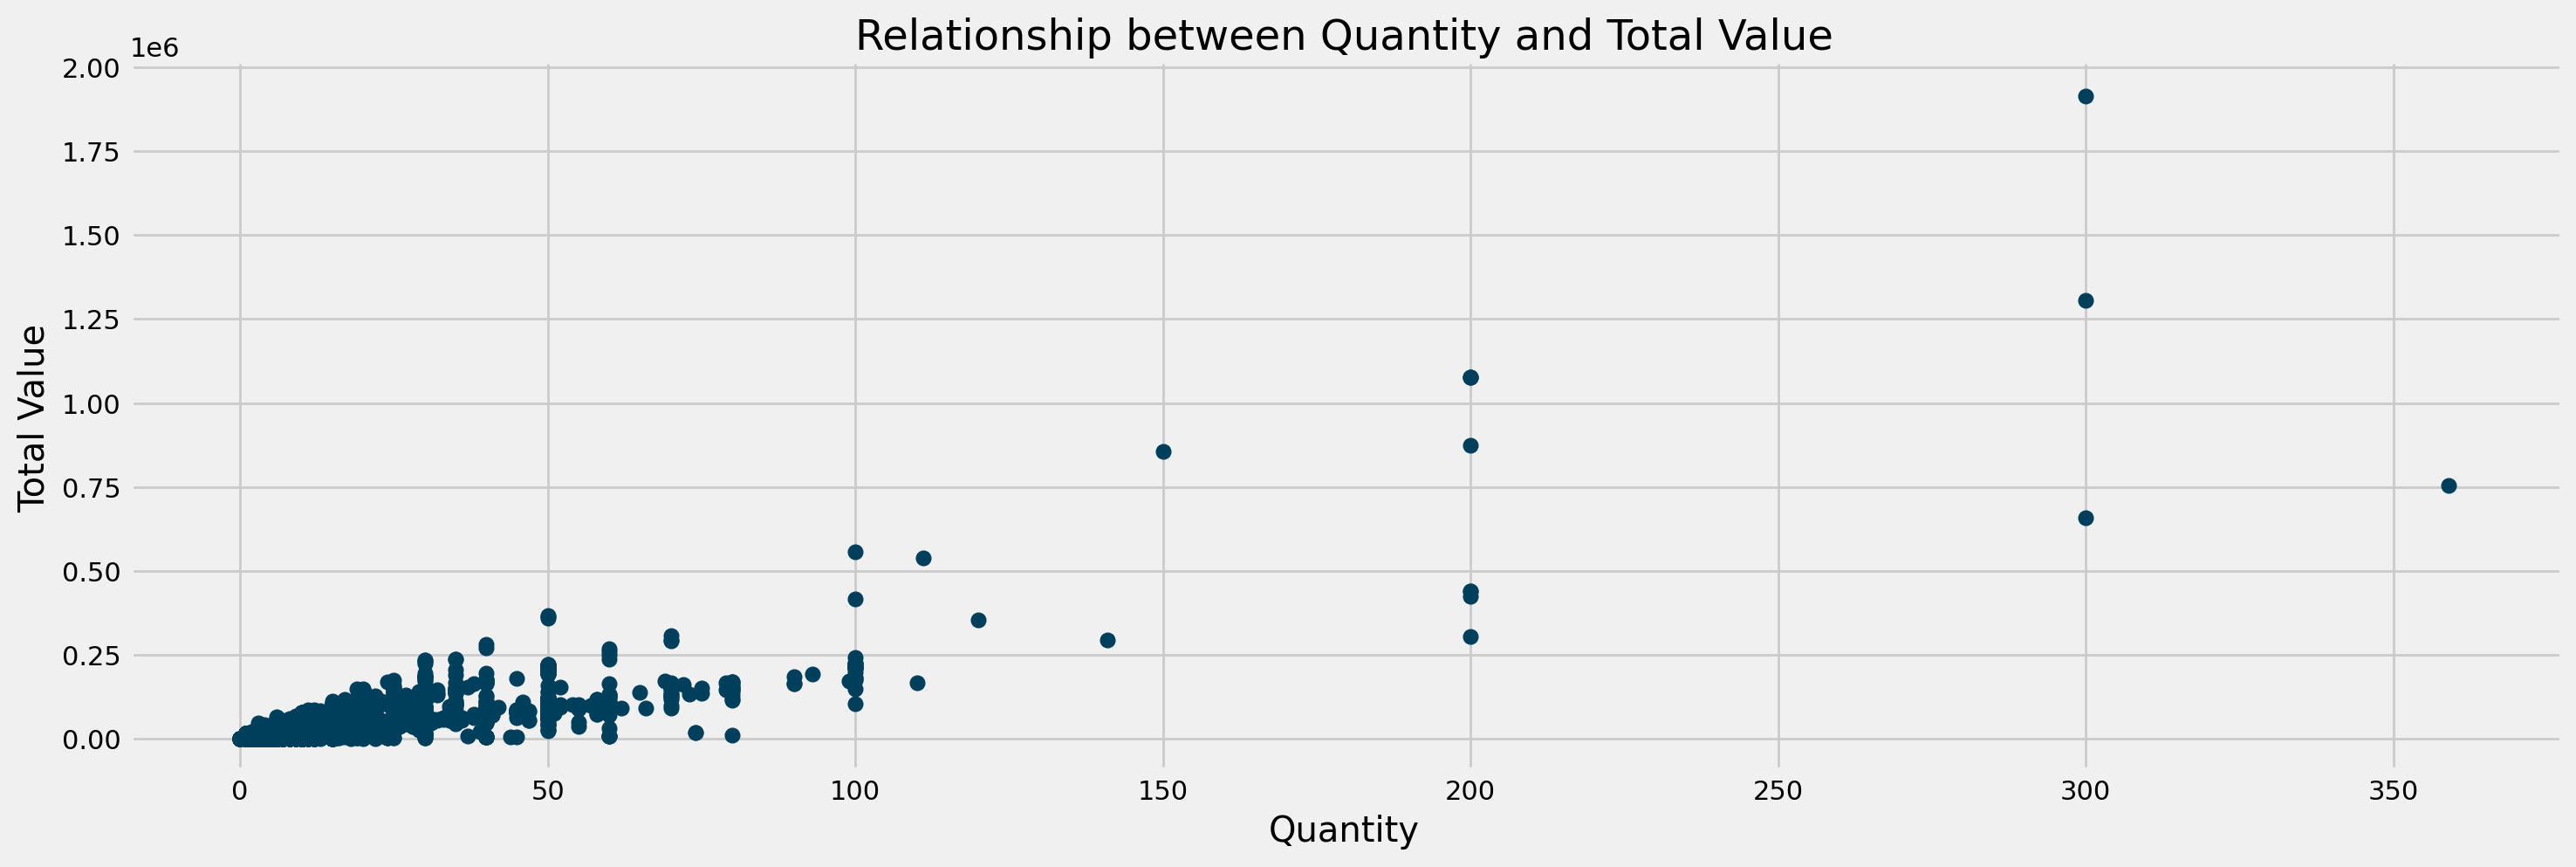

In [92]:
plt.scatter(df_cleaned['quantity'], df_cleaned['total_value'])
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.title('Relationship between Quantity and Total Value')
plt.show()


### Insights from Correlation:

1. **Strong Positive Correlation**: The correlation coefficient is 0.835, it suggests that as the quantity sold increases, the total value of sales also increases. This would imply that selling more units of a product generally results in higher sales value, which is intuitive but important for confirming expected business behavior.

   - **Implication**: Volume sales strategies might be effective. Promotions or discounts that encourage buying in larger quantities could boost total sales value.



In [93]:
from sklearn.linear_model import LinearRegression

X = df_cleaned['quantity'].values.reshape(-1, 1)
y = df_cleaned['total_value'].values

model = LinearRegression().fit(X, y)
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient (slope): 2475.5407176590306
Intercept: -376.22576667002977


### Strategic Insights and Recommendations 

Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.

Top Categories by Total Value:
                     total_quantity  total_value
anonymized_category                             
Category-75                  152643    549509348
Category-76                   72928    351827338
Category-120                 171443    322737950
Category-100                  77704    136417463
Category-119                  68615    103900839
Category-77                   28825     77791642
Category-91                   21081     44700098
Category-101                  19782     35964827
Category-85                   23368     34298630
Category-121                  14936     22677154


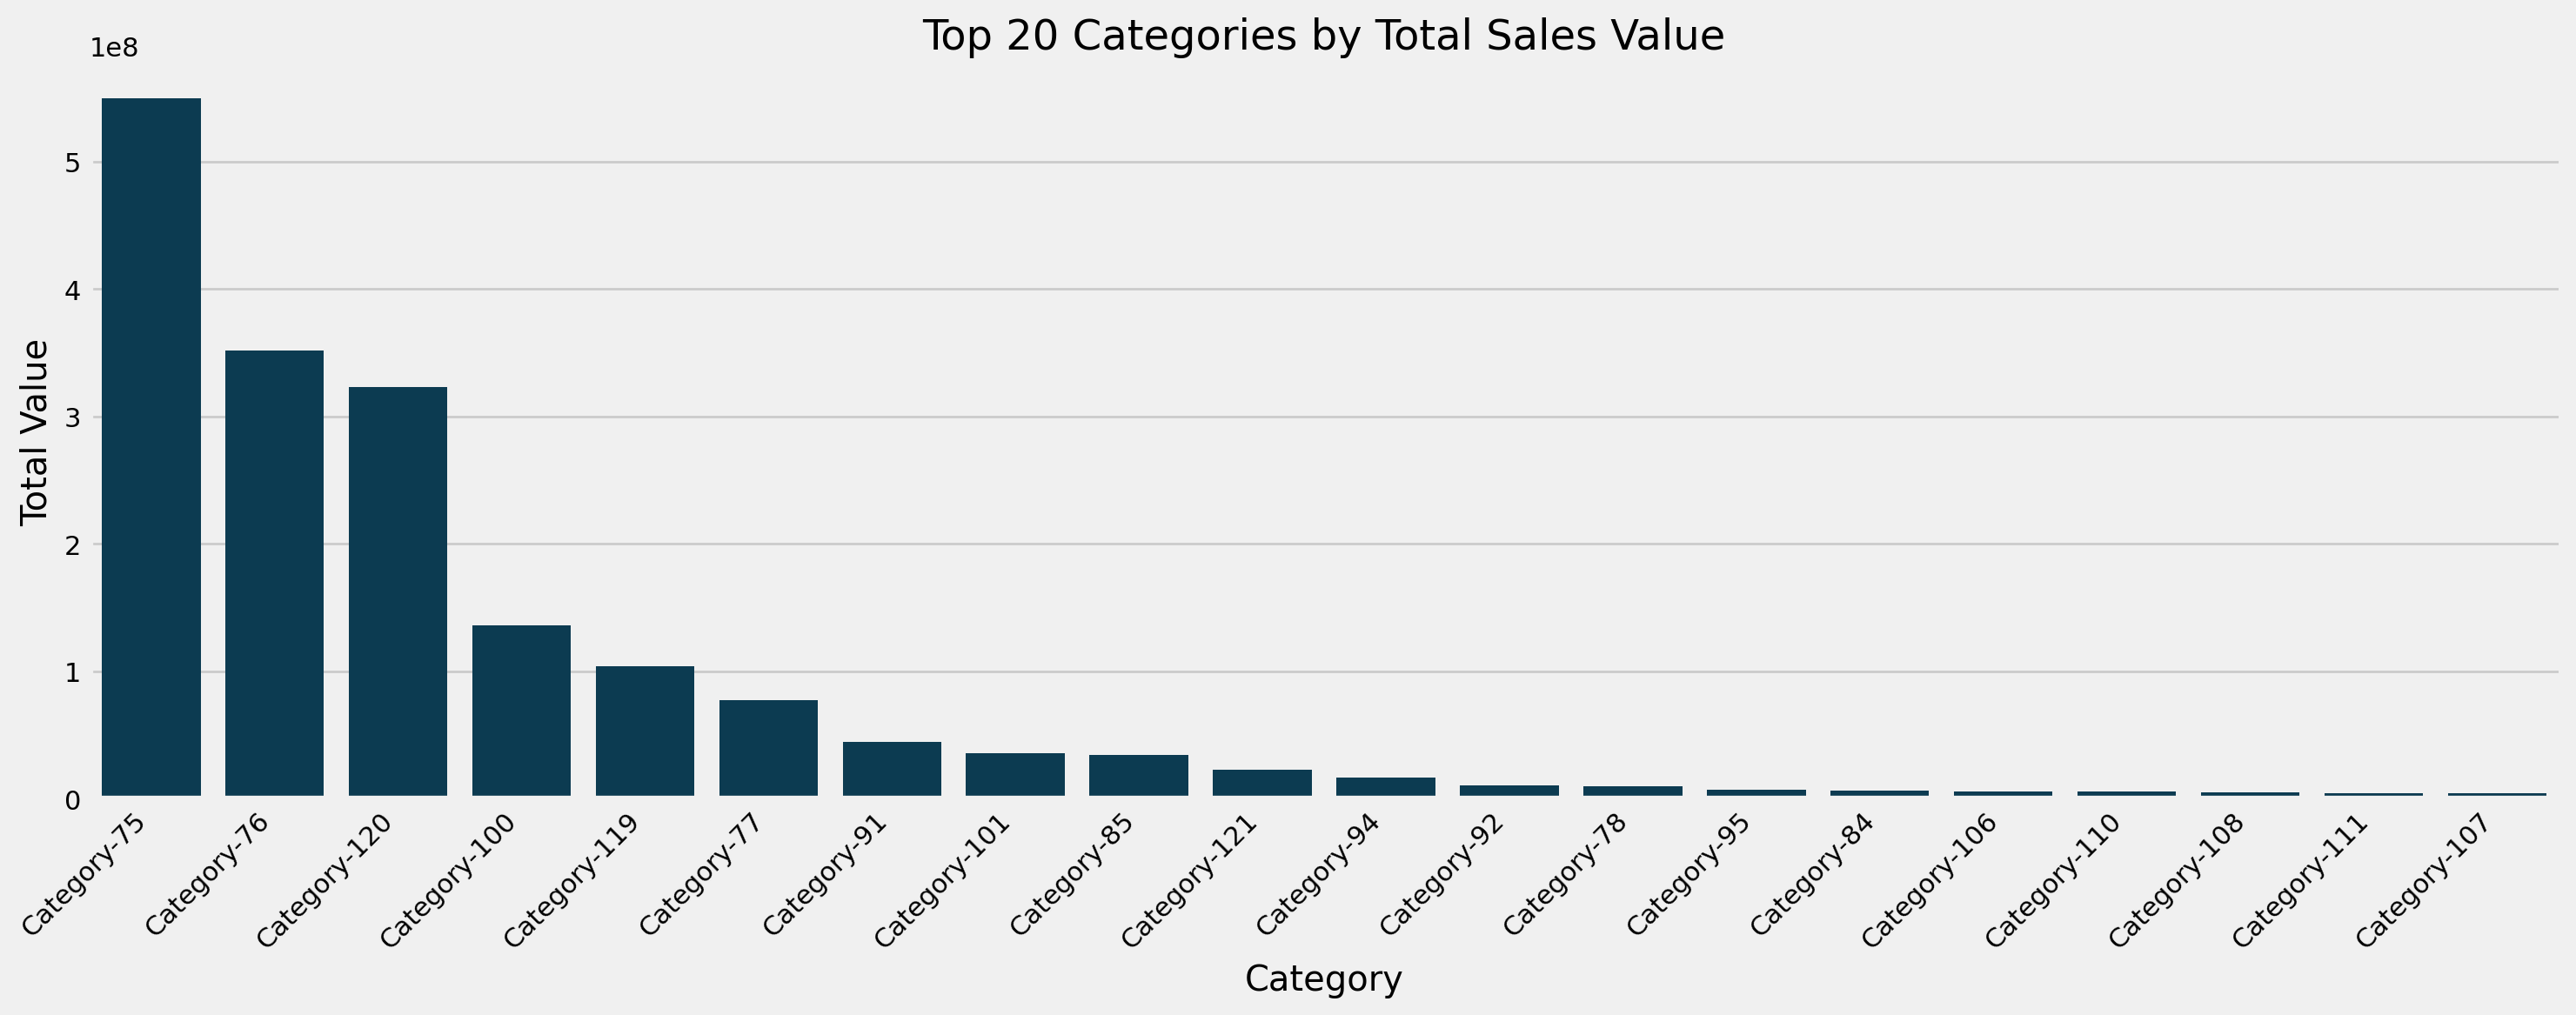

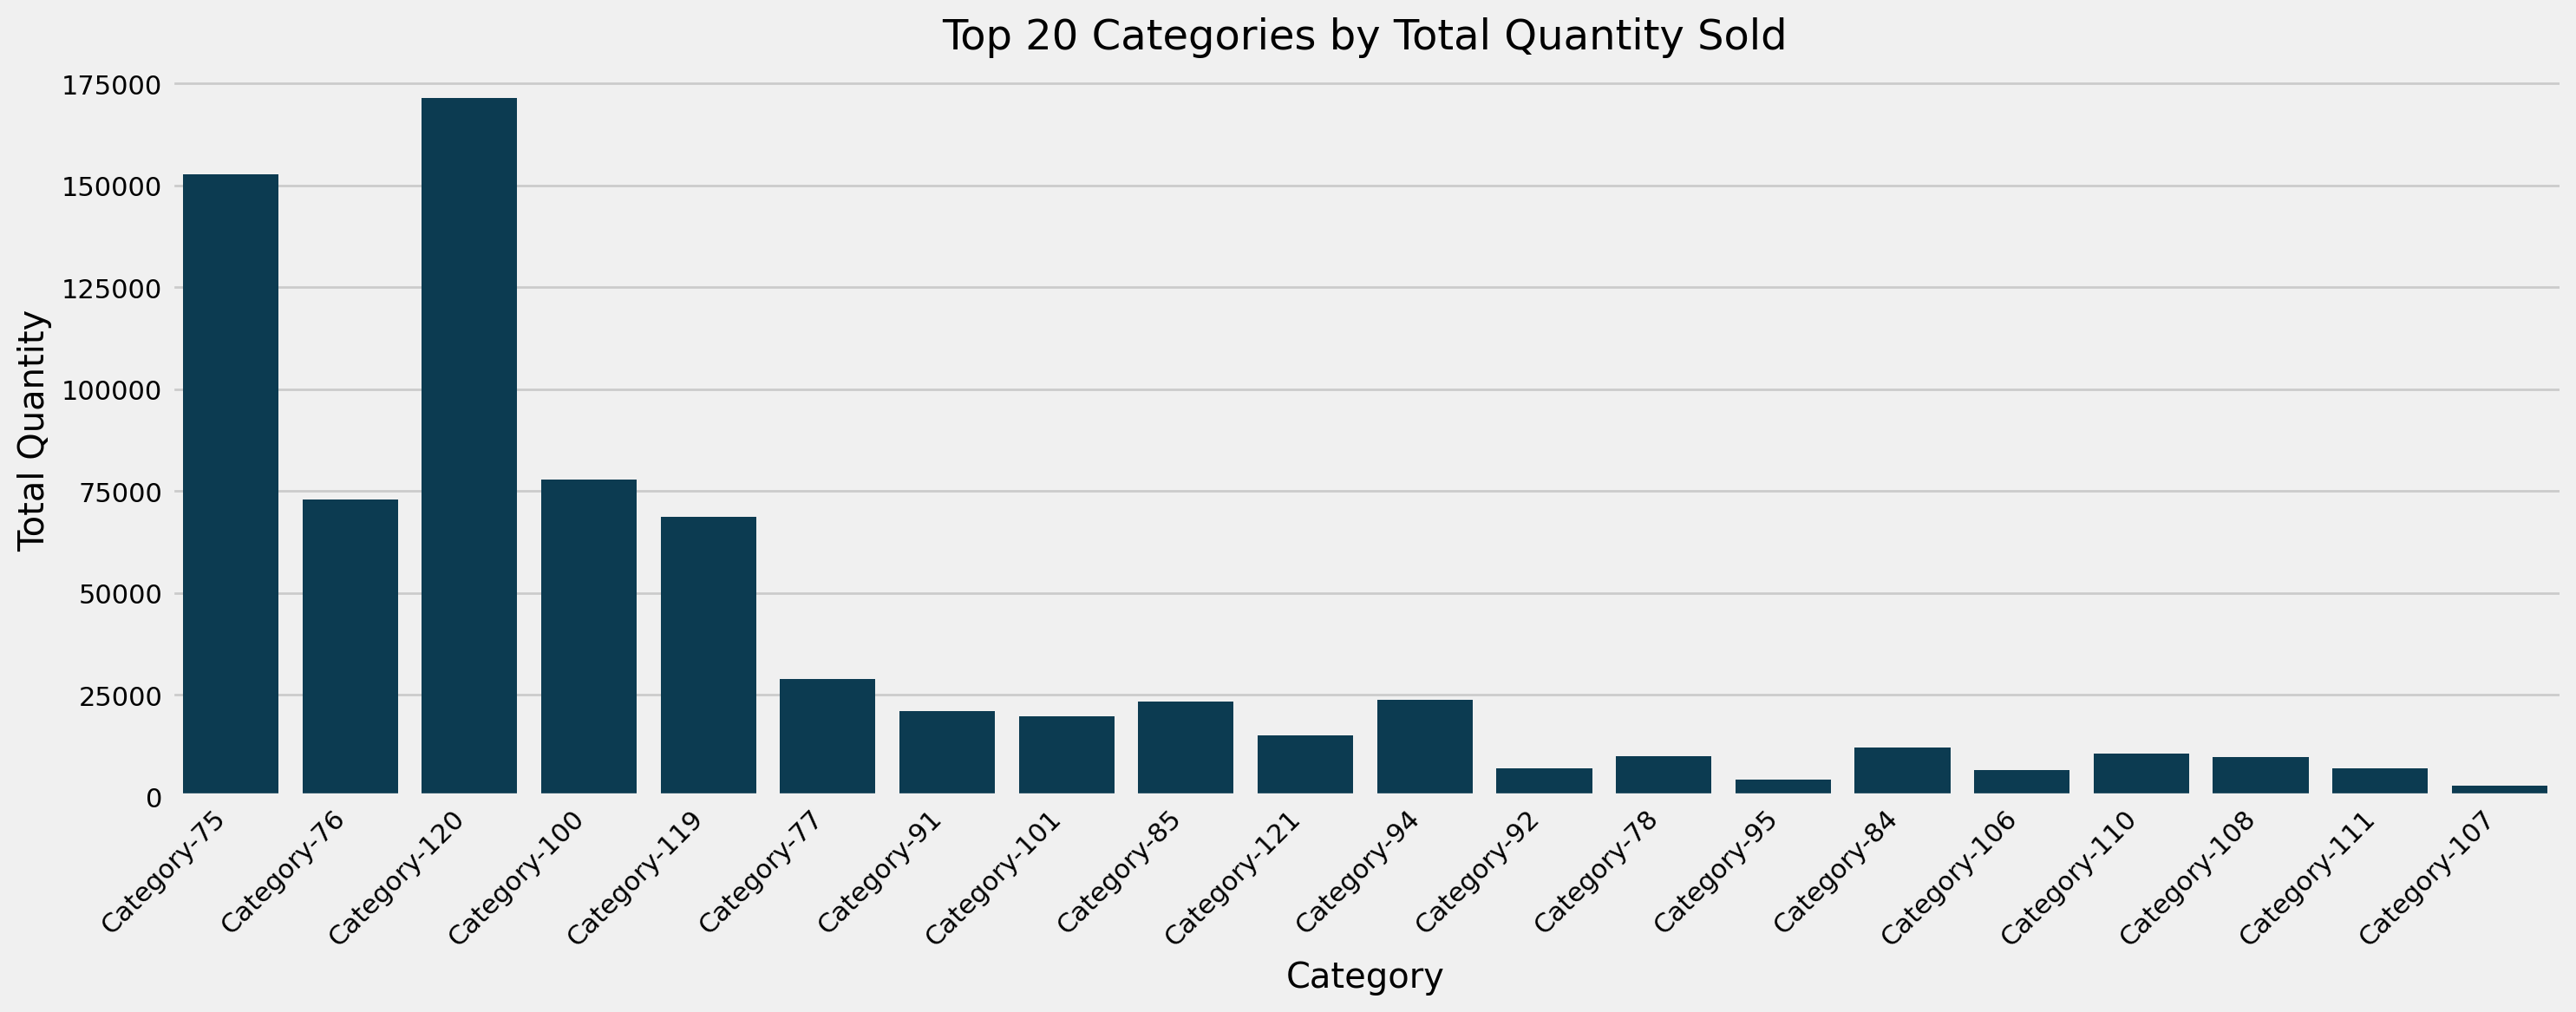

In [94]:

# Group by 'anonymized_category'
category_sales = df_cleaned.groupby('anonymized_category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).rename(columns={'quantity': 'total_quantity', 'total_value': 'total_value'})

# Sorting by total value to see   which categories generate the most revenue
category_sales_sorted = category_sales.sort_values('total_value', ascending=False)

# Displaying  top categories
print("Top Categories by Total Value:")
print(category_sales_sorted.head(10))

# Visualization
plt.figure(figsize=(15, 6))
sns.barplot(x=category_sales_sorted.index[:20], y='total_value', data=category_sales_sorted[:20])  # Top 20
plt.title('Top 20 Categories by Total Sales Value')
plt.xlabel('Category')
plt.ylabel('Total Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=category_sales_sorted.index[:20], y='total_quantity', data=category_sales_sorted[:20])
plt.title('Top 20 Categories by Total Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Strategic Insights and Recommendations

**Product Strategy:**

Based on the analysis of the sales data, I recommend prioritizing **Category-75** for marketing campaigns. Here's the justification using the data:

- **Top Category by Total Value:** According to the analysis, Category-75 leads in total sales value with a significant margin over other categories. This indicates that products in this category have a high monetary impact on your overall sales performance.

- **Sales Volume:** Although the analysis didn't provide specific quantity data for Category-75, given its high total value, we can infer that either it sells in high volumes, has high unit prices, or both. Either scenario is beneficial for marketing focus as it suggests consumer interest and spending power.

- **Market Potential:** Since Category-75 is already performing well, there's likely an established market or a growing trend within this category that can be leveraged further with targeted marketing efforts. Enhancing visibility and awareness could potentially increase this category's market share.

- **Profitability:** High total value often correlates with high profitability if the cost of goods sold isn't disproportionately high. Marketing efforts here would not only increase sales but potentially improve profit margins if this category has a favorable cost structure.

- **Consumer Behavior:** The fact that Category-75 leads in value might suggest that consumers are willing to spend more in this category, indicating a higher perceived value or necessity. Marketing campaigns can capitalize on this by reinforcing the value proposition or introducing premium offerings within this category.

To maximize the effectiveness of the marketing campaign for Category-75:

- **Targeted Promotions:** Use the data on seasonal trends to time promotions during peak sales periods or to boost sales during off-peak times.
- **Product Development:** Since this category is already popular, consider introducing new products or variations within Category-75 that could capture additional market segments or increase the average transaction value.
- **Cross-Selling Opportunities:** Analyze which products within Category-75 are often bought together and create bundled offers or cross-promotions to increase basket size.
- **Customer Loyalty Programs:** Implement or enhance loyalty programs specifically for Category-75 to encourage repeat purchases, leveraging the category's existing popularity.

This strategic focus on Category-75, backed by the data, should help in optimizing marketing spend and driving sales growth efficiently.

#### Customer Retention: 
Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.

In [95]:
# Data is already loaded into df_cleaned with 'date' as index
# df_cleaned = pd.read_csv('df_cleaned.csv', index_col='date', parse_dates=True)

# Ensure 'month_year' is in datetime format if you want to use it for grouping
df_cleaned['month_year'] = pd.to_datetime(df_cleaned['month_year'])

In [96]:
# Group by business and month to get purchase frequency
business_frequency = df_cleaned.groupby([pd.Grouper(freq='M'), 'anonymized_business']).size().reset_index(name='purchase_count')
business_frequency.columns = ['date', 'anonymized_business', 'purchase_count']

In [97]:
# Calculate rolling average over time
business_frequency['rolling_avg'] = business_frequency.groupby('anonymized_business')['purchase_count'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Calculate the overall average purchase frequency per business
business_frequency['avg_purchase'] = business_frequency.groupby('anonymized_business')['purchase_count'].transform('mean')

In [98]:
# Define 'recent' as the last 3 months 
recent_months = business_frequency['date'].max() - pd.DateOffset(months=3)
recent_data = business_frequency[business_frequency['date'] >= recent_months]

# Find businesses where recent average is less than overall average
reduced_frequency_businesses = recent_data[recent_data['rolling_avg'] < recent_data['avg_purchase']]['anonymized_business'].unique()

In [99]:
print(reduced_frequency_businesses)

['Business-0215' 'Business-0287' 'Business-02b8' ... 'Business-fd50'
 'Business-fd59' 'Business-fd61']


In [100]:
len(reduced_frequency_businesses)


1429

### Strategies to Re-engage Customers


- **Personalized Communication:**  
  For **Business-de42**, if they're showing signs of reduced frequency, send personalized emails or make calls to check on their satisfaction, offer assistance, or discuss any changes in their business needs that might affect their purchasing behavior.

- **Tailored Offers:**  
  For **Business-7488** and **Business-2460**, since we see purchases in different months but not in the same month as others, we might consider offering them time-sensitive promotions or discounts to encourage monthly purchases. For instance, "Buy in September and get a discount on your next purchase in October."

- **Engagement through Updates:**  
  For **Business-aab8** and **Business-f13b**, who have transactions in later months, provide them with updates on new products or services that might interest them, especially if they haven't purchased recently. This could be through newsletters or direct contact, highlighting how these new offerings could benefit their business.

- **Loyalty Programs:**  
  Implement or enhance loyalty programs for all businesses, focusing on rewards for consistent purchasing behavior. For example, a points system where points accumulate faster with more frequent purchases, leading to rewards or exclusive deals.

- **Feedback and Improvement:**  
  Conduct surveys or have direct conversations to understand why there might be a reduction in frequency. Use this feedback to improve products or services or address any dissatisfaction. This is particularly important for businesses like **Business-de42** with high volume in a single instance but no further data.

- **Educational Content:**  
  Provide content that adds value beyond the transaction, like industry insights, how-to guides on using products effectively, or case studies of other successful businesses using your products. This keeps your brand relevant and engaged with their operations.

- **Account Management:**  
  Assign account managers to these businesses, especially if they are key accounts. Regular check-ins can help in understanding their needs, providing personalized service, and ensuring they feel valued.

- **Reactivation Campaigns:**  
  If there's a noticeable gap in purchasing, launch reactivation campaigns via email or social media, reminding them of your value proposition, showcasing new developments, or offering a 'welcome back' discount.


### Operational Efficiency: Suggestions for Inventory Management and Supply Chain Improvements

#### Product Performance Analysis

- From our data, we see a variety of products sold across different categories. Products like `Product-4156` in `Category-120` and `Product-66e0` in `Category-119` show higher quantities sold, indicating popularity or high demand.
  - **Improvement:** We should focus on maintaining optimal stock levels for high-demand products to avoid stockouts, which could be achieved through:
    - **Just-In-Time (JIT) Inventory:** For products with consistent demand like those in Category-75, implementing JIT can reduce holding costs while ensuring availability.
    - **Safety Stock:** For products with less predictable demand, calculate safety stock based on historical sales variability to prevent stockouts during unexpected spikes.

#### Seasonal Demand

- The data spans different months, showing varying sales volumes. For example, August 2024 shows a high volume of transactions for Business-de42, suggesting a peak season or promotional period.
  - **Improvement:** Adjust inventory levels based on seasonal trends:
    - **Seasonal Stocking:** Increase inventory before peak seasons (like August for Business-de42) to meet the demand. We could use the 'month_year' data to forecast when these peaks occur.
    - **Dynamic Replenishment:** We can use our historical sales data to adjust reorder points dynamically, ensuring we have enough stock for seasonal demand but not excess inventory post-season.

#### Supply Chain Process Improvements

**1. Demand Forecasting:**

- With limited data, we can suggest the use of simple forecasting methods for planning:
  - **Time Series Analysis:** Even with a small dataset, we can start with basic time series forecasting models to predict future demand, especially for categories like Category-75 which seem to perform consistently.
  - **Improvement:** We can integrate more advanced forecasting tools as data accumulates, like ARIMA or machine learning models, to refine predictions.

**2. Supplier Relationships:**

- Since different businesses are purchasing at different times, we can consider the supply chain implications:
  - **Supplier Lead Time:** Analyze how quickly suppliers can deliver, especially for high-demand items during peak seasons. If lead times are long, consider:
    - **Buffer Stock:** For critical items with long lead times, keep a buffer stock to cover the lead time variability.
    - **Negotiate Lead Times:** Work with suppliers to reduce lead times or secure priority during peak demand periods.

**3. Inventory Turnover:**

- High-value items like those in Category-75 might indicate slower turnover if they are premium products:
  - **Improvement:** Implement:
    - **ABC Analysis:** Categorize products by value and turnover rate. Focus on fast-moving items for frequent replenishment and manage slow-moving stock more carefully.
    - **Consignment Stock:** For high-value, slow-turnover items, consider consignment stock agreements with suppliers to reduce capital tied up in inventory.

**4. Data-Driven Decision Making:**

- Use the data to inform decisions:
    - **Improvement:** Employ data analytics tools to:
    - **Monitor Stock Levels:** Real-time inventory tracking and automated alerts for low stock or overstock situations.
    - **Optimize Order Quantities:** Use Economic Order Quantity (EOQ) or similar models to minimize costs associated with ordering and holding inventory.

#### Implementation Steps

- **Data Collection:** Continue collecting and refining data over time to enhance these strategies. More data will allow for better trend analysis.
- **System Integration:** Implement or integrate inventory management systems that can handle these strategies, like ERP systems or specialized inventory software.
- **Training:** Train staff on new inventory management practices and the importance of data analysis in decision-making.

## **Dashboard and Reporting**

- Create a dashboard summarizing key insights, including:
- Total Quantity and Value by Anonymized Category.
- Top-performing products and businesses.
- A time-series chart of sales trends.
- A segmentation summary of customer groups

I decided to use plotly and sreamlit for my Dashboard


In [102]:
# pip install streamlit

Below i create the app.py file which i will run to create my interactive dashboard using streamlit and ploty packages.

In [103]:
#app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load your data
df_cleaned = pd.read_csv('df_cleaned.csv', index_col='date', parse_dates=True)

# Convert 'month_year' to datetime if needed
df_cleaned['month_year'] = pd.to_datetime(df_cleaned['month_year'])

# Sidebar for filters
st.sidebar.title('Filters')

# Time Frame Filter
time_frame = st.sidebar.selectbox(
    'Select Time Frame',
    ('All', 'Last 3 Months', 'Last 6 Months', 'Last Year')
)

# Filter Dataframe by Time Frame
if time_frame == 'Last 3 Months':
    df_filtered = df_cleaned[df_cleaned.index >= df_cleaned.index.max() - pd.DateOffset(months=3)]
elif time_frame == 'Last 6 Months':
    df_filtered = df_cleaned[df_cleaned.index >= df_cleaned.index.max() - pd.DateOffset(months=6)]
elif time_frame == 'Last Year':
    df_filtered = df_cleaned[df_cleaned.index >= df_cleaned.index.max() - pd.DateOffset(years=1)]
else:
    df_filtered = df_cleaned

# Category Filter
categories = df_filtered['anonymized_category'].unique()
selected_category = st.sidebar.selectbox('Select Category', ['All'] + list(categories))

# Filter Dataframe by Category
if selected_category != 'All':
    df_filtered = df_filtered[df_filtered['anonymized_category'] == selected_category]

# Total Quantity and Value by Anonymized Category
st.title('Sales Dashboard')

st.header('1. Total Quantity and Value by Anonymized Category')
category_summary = df_filtered.groupby('anonymized_category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

fig1 = px.bar(category_summary, x='anonymized_category', y=['quantity', 'total_value'], 
              barmode='group', title='Total Quantity and Value by Category')
st.plotly_chart(fig1)

# Top-performing Products and Businesses
st.header('2. Top-performing Products and Businesses')

# Top Products by Total Value
top_products = df_filtered.groupby('anonymized_product')['total_value'].sum().nlargest(10).reset_index()
fig2 = px.bar(top_products, x='anonymized_product', y='total_value', 
              title='Top 10 Performing Products by Total Value')
st.plotly_chart(fig2)

# Top Businesses by Total Value
top_businesses = df_filtered.groupby('anonymized_business')['total_value'].sum().nlargest(10).reset_index()
fig3 = px.bar(top_businesses, x='anonymized_business', y='total_value', 
              title='Top 10 Performing Businesses by Total Value')
st.plotly_chart(fig3)

# Time-series Chart of Sales Trends
st.header('3. Sales Trends Over Time')
sales_trend = df_filtered.groupby('month_year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

fig4 = px.line(sales_trend, x='month_year', y=['quantity', 'total_value'], 
               title='Sales Trends Over Time')
st.plotly_chart(fig4)

# Customer Segmentation Summary
st.header('4. Customer Segmentation Summary')

# Segmentation by business total value
business_segmentation = df_filtered.groupby('anonymized_business')['total_value'].sum()
business_segmentation = pd.qcut(business_segmentation, q=3, labels=['Low Value', 'Medium Value', 'High Value']).to_frame('Segment').reset_index()

# Count of businesses per segment
segment_summary = business_segmentation['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']

fig5 = px.pie(segment_summary, values='Count', names='Segment', title='Customer Segmentation by Business Value')
st.plotly_chart(fig5)

2025-01-29 18:43:04.922 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 18:43:06.185 
  command:

    streamlit run /home/caleb/Projects/business-projects/kwanza-tukule/env/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-01-29 18:43:06.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 18:43:06.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 18:43:06.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 18:43:06.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-29 18:43:06.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025

DeltaGenerator()

In [104]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.0.106:8502

/home/caleb/Projects/business-projects/kwanza-tukule/app.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['month_year'] = pd.to_datetime(df_cleaned['month_year'])
^C
  Stopping...


### Open-Ended Problem 

Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.


#### Predictive Analysis: Identifying External Factors Influencing Sales

To enhance the predictive capabilities of my sales analysis, it's crucial for me to consider external factors that can significantly impact sales performance. Here are some potential external factors I've identified:

- **Economic Conditions:** 
  - **GDP Growth Rate:** Economic growth can increase consumer spending power, which I need to track.
  - **Inflation Rates:** High inflation might reduce disposable income, affecting my sales, so I keep an eye on this.
  - **Unemployment Rate:** Higher unemployment can lead to reduced consumer confidence and spending, which I must consider in my analysis.

- **Competitor Actions:**
  - **Price Wars:** If competitors lower their prices, I might need to adjust my pricing strategy in response.
  - **Product Launches:** New product introductions by competitors could shift market share, so I monitor these closely.
  - **Marketing Campaigns:** Aggressive marketing by competitors can influence brand perception and customer loyalty, which I factor into my strategy.

- **Seasonal and Weather Patterns:**
  - **Holidays and Events:** I've noticed that sales often peak during holidays or significant events, so I plan for these.
  - **Weather Conditions:** Weather can affect sales, especially for my seasonal or weather-dependent products, so I incorporate weather data.

- **Consumer Trends:**
  - **Social Media Trends:** Viral trends can boost demand for certain products, something I track through social media analytics.
  - **Health and Wellness Movements:** Shifts in consumer health consciousness can affect product categories I sell, so I stay updated on these trends.

- **Regulatory Changes:**
  - **Taxation:** Changes in sales tax or import duties can alter my pricing strategies, so I keep abreast of tax law changes.
  - **Trade Policies:** Tariffs or trade agreements can impact product availability and cost, which I need to anticipate.

- **Technological Advancements:**
  - **E-commerce Growth:** The rise of online shopping platforms influences my traditional retail sales, so I adapt to this growth.
  - **Mobile Technology:** Increased mobile usage affects how and where consumers shop, pushing me to optimize for mobile.

#### Methodology to Incorporate External Factors into Future Analyses

To incorporate these external factors into my predictive sales analysis, here's the methodology I propose:

1. **Data Collection:**
   - **Economic Data:** I collect data from sources like the Bureau of Economic Analysis for GDP, Bureau of Labor Statistics for employment data, etc.
   - **Competitor Data:** I utilize market research reports, competitor websites, and social media for tracking competitor moves.
   - **Weather Data:** I use APIs or datasets from weather services like OpenWeatherMap or NOAA to gather relevant weather information.
   - **Consumer Trend Data:** I monitor social media analytics, Google Trends, or consumer behavior reports to catch the latest trends.
   - **Regulatory Data:** I follow government publications, news, or regulatory bodies for policy changes that might affect my business.
   - **Technology Adoption:** I look at industry reports or technology adoption statistics to understand technological shifts.

2. **Data Integration:**
   - **Time Alignment:** I ensure all external data is aligned with my sales data timeline, converting to a common format if necessary.
   - **Database or Data Lake:** I store this data in a structured way, using a relational database or data lake for handling various data types.

3. **Feature Engineering:**
   - **Lagging Indicators:** I use past economic or competitor data as indicators in my models.
   - **Leading Indicators:** I incorporate forecasts or predictive metrics like consumer confidence indices to anticipate future trends.
   - **Categorical Encoding:** I convert qualitative data (like competitor actions) into quantitative forms to use in my analyses.

4. **Modeling:**
   - **Regression Models:** I use multiple regression or time series regression to understand the impact of these factors on my sales.
   - **Machine Learning:** I employ more advanced models like Random Forests, Gradient Boosting, or Neural Networks to capture non-linear relationships.
   - **Time Series Analysis:** I incorporate ARIMA, SARIMA, or Prophet models with external regressors to account for these factors over time.

5. **Validation and Testing:**
   - **Cross-Validation:** I use techniques like k-fold cross-validation to ensure my model generalizes well.
   - **Backtesting:** I test my models on historical data to see how well they would have predicted past sales given the external factors.

6. **Implementation:**
   - **Real-Time Updates:** I set up systems to update my models with new external data in real-time or at regular intervals to keep my predictions current.
   - **Scenario Analysis:** I use my model to run scenarios, like the impact of a new competitor product or an economic downturn, to prepare for various market conditions.

By following this methodology, I aim to make my sales predictions more robust and responsive to the external environment, enhancing my business's strategic decision-making.

### Scalability: Optimizations for a 10x Larger Dataset

If my dataset were to grow 10 times larger, I would need to implement several optimizations for data storage, processing, and analysis to maintain efficiency:

#### Data Storage

- **I would switch to a more scalable database solution.** For instance, I might use a distributed database like Apache Cassandra or Google Bigtable, which are designed to handle large volumes of data across multiple nodes, providing high availability and scalability.

- **I would consider using cloud storage solutions** like Amazon S3 or Google Cloud Storage. This would allow me to store data cost-effectively with the ability to scale automatically as the data grows. I'd use these services to store raw data and intermediate results, leveraging their scalability and redundancy.

- **I would implement data partitioning.** By partitioning my data by time, category, or any logical division, I can distribute the load across different storage systems or database shards, improving query performance and manageability.

#### Data Processing

- **I would utilize distributed computing frameworks** like Apache Spark or Dask. These frameworks can process data in parallel across a cluster of machines, which would be crucial for handling a dataset 10 times larger. Spark, in particular, offers in-memory processing which can significantly speed up operations.

- **I would optimize my data loading process.** Instead of loading the entire dataset into memory, I would use techniques like lazy loading or streaming data processing. This approach helps in managing memory usage more effectively when dealing with large datasets.

- **I would implement batch processing for routine tasks.** For regular analytics or reporting, I would schedule batch jobs to run during off-peak hours, reducing the load on real-time systems and ensuring that processing doesn't slow down other operations.

#### Data Analysis

- **For analysis, I would leverage more advanced sampling techniques.** With a larger dataset, full analysis might become computationally intensive, so I would use stratified sampling or other statistical sampling methods to get representative insights without processing the entire dataset.

- **I would refine my data models to use more efficient algorithms.** For example, in machine learning, I might switch to algorithms that are known for scalability like online learning models or use techniques like dimensionality reduction to decrease computational complexity.

- **I would enhance my data pipeline with caching mechanisms.** Implementing caching at various stages, especially for frequently accessed data or intermediate results, can drastically reduce computation time. Tools like Redis could be used for this purpose.

- **I would automate and parallelize analysis tasks.** Using tools like Airflow for workflow management, I would automate my data analysis pipeline, ensuring that different parts of the analysis can run in parallel, speeding up the process.

- **I would consider using GPU acceleration for certain analyses.** For tasks like deep learning or complex statistical analysis, GPUs can provide a significant speed boost, especially when dealing with large datasets.

By implementing these optimizations, I ensure that my system can handle a dataset 10 times larger without sacrificing performance or the depth of analysis. This would involve not just technical changes but also strategic planning to ensure my infrastructure scales appropriately with my data growth.